In [1]:
import warnings 
warnings.filterwarnings('ignore')
import iris
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.path as mpath
from scipy import stats
import cftime

ERROR 1: PROJ: proj_create_from_database: Open of /opt/scitools/conda/deployments/default-2023_11_28/share/proj failed


In [2]:
press = xr.open_dataarray('pressure.nc')
fname = '/data/users/mhenry/ukesm_land.pp' 
aod_ = iris.load(fname)
land_long = xr.DataArray.from_iris(aod_[0])
land = land_long.rename({'latitude':'lat','longitude':'lon'})

In [3]:
ukesm_ssp_ts_1 = xr.open_mfdataset('/project/champ/data/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/ssp245/r1i1p1f2/Amon/tas/gn/v20190507/*.nc')
weights_ukesm_ssp = np.cos(np.deg2rad(ukesm_ssp_ts_1.lat))
weights_ukesm_ssp.name = "weights"
ukesm_ssp_ts_2 = xr.open_mfdataset('/project/champ/data/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/ssp245/r2i1p1f2/Amon/tas/gn/v20190507/*.nc')
ukesm_ssp_ts_3 = xr.open_mfdataset('/project/champ/data/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/ssp245/r3i1p1f2/Amon/tas/gn/v20190507/*.nc')
ukesm_ssp_ts_4 = xr.open_mfdataset('/project/champ/data/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/ssp245/r4i1p1f2/Amon/tas/gn/v20190507/*.nc')
ukesm_ssp_ts_5 = xr.open_mfdataset('/project/champ/data/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/ssp245/r8i1p1f2/Amon/tas/gn/v20190510/*.nc')
ukesm_ssp_ts_arr = [ukesm_ssp_ts_1.tas,ukesm_ssp_ts_2.tas,ukesm_ssp_ts_3.tas,ukesm_ssp_ts_4.tas,ukesm_ssp_ts_5.tas]
ukesm_ssp_ts_ave = (ukesm_ssp_ts_1.tas+ukesm_ssp_ts_2.tas+ukesm_ssp_ts_3.tas+ukesm_ssp_ts_4.tas+ukesm_ssp_ts_5.tas)/5

ukesm_arise_ts_1 = xr.open_dataarray('./data/arise_V0/ukesm_arise_ts_1.nc')
ukesm_arise_ts_2 = xr.open_dataarray('./data/arise_V0/ukesm_arise_ts_2.nc')
ukesm_arise_ts_3 = xr.open_dataarray('./data/arise_V0/ukesm_arise_ts_3.nc')
ukesm_arise_ts_4 = xr.open_dataarray('./data/arise_V0/ukesm_arise_ts_4.nc')
ukesm_arise_ts_5 = xr.open_dataarray('./data/arise_V0/ukesm_arise_ts_5.nc')
weights_ukesm_arise = np.cos(np.deg2rad(ukesm_arise_ts_5.latitude))
weights_ukesm_arise.name = "weights"
ukesm_arise_ts_arr = [ukesm_arise_ts_1, ukesm_arise_ts_2, ukesm_arise_ts_3, ukesm_arise_ts_4, ukesm_arise_ts_5]
ukesm_arise_ts_ave = (ukesm_arise_ts_1 + ukesm_arise_ts_2 + ukesm_arise_ts_3 + ukesm_arise_ts_4 + ukesm_arise_ts_5)/5

ukesm_30NS_ts_1 = xr.open_mfdataset('./data/arise_30NS/ukesm_arise_ts_1.nc').air_temperature
ukesm_30NS_ts_2 = xr.open_mfdataset('./data/arise_30NS/ukesm_arise_ts_2.nc').air_temperature
ukesm_30NS_ts_3 = xr.open_mfdataset('./data/arise_30NS/ukesm_arise_ts_3.nc').air_temperature
ukesm_30NS_ts_4 = xr.open_mfdataset('./data/arise_30NS/ukesm_arise_ts_4.nc').air_temperature
ukesm_30NS_ts_5 = xr.open_mfdataset('./data/arise_30NS/ukesm_arise_ts_5.nc').air_temperature
ukesm_30NS_ts_arr = [ukesm_30NS_ts_1,ukesm_30NS_ts_2,ukesm_30NS_ts_3,ukesm_30NS_ts_4,ukesm_30NS_ts_5]
ukesm_30NS_ts_ave = (ukesm_30NS_ts_1+ukesm_30NS_ts_2+ukesm_30NS_ts_3+ukesm_30NS_ts_4+ukesm_30NS_ts_5)/5

ukesm_0NS_ts_1 = xr.open_mfdataset('/data/users/mhenry/ARISE/proc_data/ukesm_arise_tas_u-de029.nc').air_temperature
ukesm_0NS_ts_2 = xr.open_mfdataset('/data/users/mhenry/ARISE/proc_data/ukesm_arise_tas_u-de034.nc').air_temperature
ukesm_0NS_ts_3 = xr.open_mfdataset('/data/users/mhenry/ARISE/proc_data/ukesm_arise_tas_u-cy805.nc').air_temperature
ukesm_0NS_ts_arr = [ukesm_0NS_ts_1,ukesm_0NS_ts_2,ukesm_0NS_ts_3]
ukesm_0NS_ts_ave = (ukesm_0NS_ts_1+ukesm_0NS_ts_2+ukesm_0NS_ts_3)/3

ukesm_15NS_ts_1 = xr.open_mfdataset('./data/lat_dep/ukesm_15NS_ts_1.nc').air_temperature
ukesm_15NS_ts_2 = xr.open_mfdataset('/data/users/mhenry/ARISE/proc_data/ukesm_arise_tas_u-cy806.nc').air_temperature
ukesm_15NS_ts_3 = xr.open_mfdataset('/data/users/mhenry/ARISE/proc_data/ukesm_arise_tas_u-cy807.nc').air_temperature
ukesm_15NS_ts_arr = [ukesm_15NS_ts_1,ukesm_15NS_ts_2,ukesm_15NS_ts_3]
ukesm_15NS_ts_ave = (ukesm_15NS_ts_1+ukesm_15NS_ts_2+ukesm_15NS_ts_3)/3

ukesm_60NS_ts_1 = xr.open_mfdataset('./data/lat_dep/ukesm_60NS_ts_1.nc').air_temperature
ukesm_60NS_ts_2 = xr.open_mfdataset('./data/lat_dep/ukesm_60NS_ts_2.nc').air_temperature
ukesm_60NS_ts_3 = xr.open_mfdataset('./data/lat_dep/ukesm_60NS_ts_3.nc').air_temperature
ukesm_60NS_ts_arr = [ukesm_60NS_ts_1,ukesm_60NS_ts_2,ukesm_60NS_ts_3]
ukesm_60NS_ts_ave = (ukesm_60NS_ts_1+ukesm_60NS_ts_2+ukesm_60NS_ts_3)/3

In [4]:
ukesm_arise_pr_1 = xr.open_dataarray('./data/arise_V0/ukesm_arise_pr_1.nc')
ukesm_arise_pr_2 = xr.open_dataarray('./data/arise_V0/ukesm_arise_pr_2.nc')
ukesm_arise_pr_3 = xr.open_dataarray('./data/arise_V0/ukesm_arise_pr_3.nc')
ukesm_arise_pr_4 = xr.open_dataarray('./data/arise_V0/ukesm_arise_pr_4.nc')
ukesm_arise_pr_5 = xr.open_dataarray('./data/arise_V0/ukesm_arise_pr_5.nc')
ukesm_arise_pr_arr = [ukesm_arise_pr_1, ukesm_arise_pr_2, ukesm_arise_pr_3, ukesm_arise_pr_4, ukesm_arise_pr_5]
ukesm_arise_pr_ave = (ukesm_arise_pr_1 + ukesm_arise_pr_2 + ukesm_arise_pr_3 + ukesm_arise_pr_4 + ukesm_arise_pr_5)/5
ukesm_arise_pr_ave = ukesm_arise_pr_ave.rename({'latitude':'lat','longitude':'lon'})

ukesm_ssp_pr_1 = xr.open_mfdataset('/project/champ/data/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/ssp245/r1i1p1f2/Amon/pr/gn/v20190507/*.nc')
ukesm_ssp_pr_2 = xr.open_mfdataset('/project/champ/data/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/ssp245/r2i1p1f2/Amon/pr/gn/v20190507/*.nc')
ukesm_ssp_pr_3 = xr.open_mfdataset('/project/champ/data/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/ssp245/r3i1p1f2/Amon/pr/gn/v20190507/*.nc')
ukesm_ssp_pr_4 = xr.open_mfdataset('/project/champ/data/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/ssp245/r4i1p1f2/Amon/pr/gn/v20190507/*.nc')
ukesm_ssp_pr_5 = xr.open_mfdataset('/project/champ/data/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/ssp245/r8i1p1f2/Amon/pr/gn/v20190510/*.nc')
ukesm_ssp_pr_arr = [ukesm_ssp_pr_1.pr,ukesm_ssp_pr_2.pr,ukesm_ssp_pr_3.pr,ukesm_ssp_pr_4.pr,ukesm_ssp_pr_5.pr]
ukesm_ssp_pr_ave = (ukesm_ssp_pr_1.pr+ukesm_ssp_pr_2.pr+ukesm_ssp_pr_3.pr+ukesm_ssp_pr_4.pr+ukesm_ssp_pr_5.pr)/5

ukesm_30NS_pr_1 = xr.open_mfdataset('./data/arise_30NS/ukesm_arise_pr_1.nc').precipitation_flux
ukesm_30NS_pr_2 = xr.open_mfdataset('./data/arise_30NS/ukesm_arise_pr_2.nc').precipitation_flux
ukesm_30NS_pr_3 = xr.open_mfdataset('./data/arise_30NS/ukesm_arise_pr_3.nc').precipitation_flux
ukesm_30NS_pr_4 = xr.open_mfdataset('./data/arise_30NS/ukesm_arise_pr_4.nc').precipitation_flux
ukesm_30NS_pr_5 = xr.open_mfdataset('./data/arise_30NS/ukesm_arise_pr_5.nc').precipitation_flux
ukesm_30NS_pr_arr = [ukesm_30NS_pr_1,ukesm_30NS_pr_2,ukesm_30NS_pr_3,ukesm_30NS_pr_4,ukesm_30NS_pr_5]
ukesm_30NS_pr_ave = (ukesm_30NS_pr_1+ukesm_30NS_pr_2+ukesm_30NS_pr_3+ukesm_30NS_pr_4+ukesm_30NS_pr_5)/5

ukesm_0NS_pr_1 = xr.open_mfdataset('/data/users/mhenry/ARISE/proc_data/ukesm_arise_pr_u-de029.nc').precipitation_flux
ukesm_0NS_pr_2 = xr.open_mfdataset('/data/users/mhenry/ARISE/proc_data/ukesm_arise_pr_u-de034.nc').precipitation_flux
ukesm_0NS_pr_3 = xr.open_mfdataset('/data/users/mhenry/ARISE/proc_data/ukesm_arise_pr_u-cy805.nc').precipitation_flux
ukesm_0NS_pr_arr = [ukesm_0NS_pr_1,ukesm_0NS_pr_2,ukesm_0NS_pr_3]
ukesm_0NS_pr_ave = (ukesm_0NS_pr_1+ukesm_0NS_pr_2+ukesm_0NS_pr_3)/3

ukesm_15NS_pr_1 = xr.open_mfdataset('./data/lat_dep/ukesm_15NS_pr_1.nc').precipitation_flux
ukesm_15NS_pr_2 = xr.open_mfdataset('/data/users/mhenry/ARISE/proc_data/ukesm_arise_pr_u-cy806.nc').precipitation_flux
ukesm_15NS_pr_3 = xr.open_mfdataset('/data/users/mhenry/ARISE/proc_data/ukesm_arise_pr_u-cy807.nc').precipitation_flux
ukesm_15NS_pr_arr = [ukesm_15NS_pr_1,ukesm_15NS_pr_2,ukesm_15NS_pr_3]
ukesm_15NS_pr_ave = (ukesm_15NS_pr_1+ukesm_15NS_pr_2+ukesm_15NS_pr_3)/3

ukesm_60NS_pr_1 = xr.open_mfdataset('./data/lat_dep/ukesm_60NS_pr_1.nc').precipitation_flux
ukesm_60NS_pr_2 = xr.open_mfdataset('./data/lat_dep/ukesm_60NS_pr_2.nc').precipitation_flux
ukesm_60NS_pr_3 = xr.open_mfdataset('./data/lat_dep/ukesm_60NS_pr_3.nc').precipitation_flux
ukesm_60NS_pr_arr = [ukesm_60NS_pr_1,ukesm_60NS_pr_2,ukesm_60NS_pr_3]
ukesm_60NS_pr_ave = (ukesm_60NS_pr_1+ukesm_60NS_pr_2+ukesm_60NS_pr_3)/3

In [5]:
ukesm_0NS_aod_1 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_aod_u-de029.nc').mean('longitude')
ukesm_0NS_aod_2 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_aod_u-de034.nc').mean('longitude')
ukesm_0NS_aod_3 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_aod_u-cy805.nc').mean('longitude')
ukesm_0NS_aod_arr = [ukesm_0NS_aod_1,ukesm_0NS_aod_2,ukesm_0NS_aod_3]
ukesm_0NS_aod_ave = (ukesm_0NS_aod_1+ukesm_0NS_aod_2+ukesm_0NS_aod_3)/3

ukesm_15NS_aod_1 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_strataod_u-cu743.nc').mean('longitude')
ukesm_15NS_aod_2 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_strataod_u-cy806.nc').mean('longitude')
ukesm_15NS_aod_3 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_strataod_u-cy807.nc').mean('longitude')
ukesm_15NS_aod_arr = [ukesm_15NS_aod_1,ukesm_15NS_aod_2,ukesm_15NS_aod_3]
ukesm_15NS_aod_ave = (ukesm_15NS_aod_1+ukesm_15NS_aod_2+ukesm_15NS_aod_3)/3

ukesm_30NS_aod_1 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_strataod_u-cr991.nc').mean('longitude')
ukesm_30NS_aod_2 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_strataod_u-cs992.nc').mean('longitude')
ukesm_30NS_aod_3 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_strataod_u-cs993.nc').mean('longitude')
ukesm_30NS_aod_4 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_strataod_u-cs994.nc').mean('longitude')
ukesm_30NS_aod_5 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_strataod_u-cs995.nc').mean('longitude')
ukesm_30NS_aod_arr = [ukesm_30NS_aod_1,ukesm_30NS_aod_2,ukesm_30NS_aod_3,ukesm_30NS_aod_4,ukesm_30NS_aod_5]
ukesm_30NS_aod_ave = (ukesm_30NS_aod_1+ukesm_30NS_aod_2+ukesm_30NS_aod_3+ukesm_30NS_aod_4+ukesm_30NS_aod_5)/5

ukesm_60NS_aod_1 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_strataod_u-ct762.nc').mean('longitude')
ukesm_60NS_aod_2 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_strataod_u-cy808.nc').mean('longitude')
ukesm_60NS_aod_3 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_strataod_u-cy809.nc').mean('longitude')
ukesm_60NS_aod_arr = [ukesm_60NS_aod_1,ukesm_60NS_aod_2,ukesm_60NS_aod_3]
ukesm_60NS_aod_ave = (ukesm_60NS_aod_1+ukesm_60NS_aod_2+ukesm_60NS_aod_3)/3

ukesm_arise_aod_1 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_strataod_u-cl322.nc').mean('longitude')
ukesm_arise_aod_2 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_strataod_u-cl458.nc').mean('longitude')
ukesm_arise_aod_3 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_strataod_u-cl459.nc').mean('longitude')
ukesm_arise_aod_4 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_strataod_u-cl460.nc').mean('longitude')
ukesm_arise_aod_5 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_strataod_u-cl461.nc').mean('longitude')
ukesm_arise_aod_arr = [ukesm_arise_aod_1,ukesm_arise_aod_2,ukesm_arise_aod_3,ukesm_arise_aod_4,ukesm_arise_aod_5]
ukesm_arise_aod_ave = (ukesm_arise_aod_1+ukesm_arise_aod_2+ukesm_arise_aod_3+ukesm_arise_aod_4+ukesm_arise_aod_5)/5

ukesm_ssp_aod_ave = xr.open_dataarray('./data/ukesm_ssp/ukesm_ssp_aod_ave.nc')

In [6]:
so2_0NS_1 = np.loadtxt('/data/users/mhenry/ARISE/u-de029/FeedBack_stats_de029_2034.log', delimiter=',', skiprows=1)
so2_0NS_2 = np.loadtxt('/data/users/mhenry/ARISE/u-de034/FeedBack_stats_de034_2034.log', delimiter=',', skiprows=1)
so2_0NS_3 = np.loadtxt('/data/users/mhenry/ARISE/u-cy805/FeedBack_stats_cy805_2034.log', delimiter=',', skiprows=1)
so2_0NS_ave = (so2_0NS_1+so2_0NS_2+so2_0NS_3)/3

so2_15NS_1 = np.loadtxt('/data/users/mhenry/ARISE/u-cu743/FeedBack_stats_cu743_2034.log', delimiter=',', skiprows=1)
so2_15NS_2 = np.loadtxt('/data/users/mhenry/ARISE/u-cy806/FeedBack_stats_cy806_2034.log', delimiter=',', skiprows=1)
so2_15NS_3 = np.loadtxt('/data/users/mhenry/ARISE/u-cy807/FeedBack_stats_cy807_2034.log', delimiter=',', skiprows=1)
so2_15NS_ave = (so2_15NS_1[1:,:]+so2_15NS_2+so2_15NS_3)/3

so2_30NS_1 = np.loadtxt('/data/users/mhenry/ARISE/u-cr991/FeedBack_stats_cr991_2034.log', delimiter=',', skiprows=1)
so2_30NS_2 = np.loadtxt('/data/users/mhenry/ARISE/u-cs992/FeedBack_stats_cs992_2034.log', delimiter=',', skiprows=1)
so2_30NS_3 = np.loadtxt('/data/users/mhenry/ARISE/u-cs993/FeedBack_stats_cs993_2034.log', delimiter=',', skiprows=1)
so2_30NS_4 = np.loadtxt('/data/users/mhenry/ARISE/u-cs994/FeedBack_stats_cs994_2034.log', delimiter=',', skiprows=1)
so2_30NS_5 = np.loadtxt('/data/users/mhenry/ARISE/u-cs995/FeedBack_stats_cs995_2034.log', delimiter=',', skiprows=1)
so2_30NS_ave = (so2_30NS_1+so2_30NS_2+so2_30NS_3+so2_30NS_4+so2_30NS_5)/5

so2_60NS_1 = np.loadtxt('/data/users/mhenry/ARISE/u-ct762/FeedBack_stats_ct762_2034.log', delimiter=',', skiprows=1)
so2_60NS_2 = np.loadtxt('/data/users/mhenry/ARISE/u-cy808/FeedBack_stats_cy808_2034.log', delimiter=',', skiprows=1)
so2_60NS_3 = np.loadtxt('/data/users/mhenry/ARISE/u-cy809/FeedBack_stats_cy809_2034.log', delimiter=',', skiprows=1)
so2_60NS_ave = (so2_60NS_1+so2_60NS_2+so2_60NS_3)/3

so2_arise_1 = np.loadtxt('/data/users/mhenry/ARISE/u-cl322/FeedBack_stats_cl322_2034.log', delimiter=',', skiprows=1)
so2_arise_2 = np.loadtxt('/data/users/mhenry/ARISE/u-cl458/FeedBack_stats_cl458_2034.log', delimiter=',', skiprows=1)
so2_arise_3 = np.loadtxt('/data/users/mhenry/ARISE/u-cl459/FeedBack_stats_cl459_2034.log', delimiter=',', skiprows=1)
so2_arise_4 = np.loadtxt('/data/users/mhenry/ARISE/u-cl460/FeedBack_stats_cl460_2034.log', delimiter=',', skiprows=1)
so2_arise_5 = np.loadtxt('/data/users/mhenry/ARISE/u-cl461/FeedBack_stats_cl461_2034.log', delimiter=',', skiprows=1)
so2_arise_ave = (so2_arise_1+so2_arise_2+so2_arise_3+so2_arise_4+so2_arise_5)/5

print('0N/S ave : ',np.mean(so2_0NS_ave[-10:,11]+so2_0NS_ave[-10:,12]+so2_0NS_ave[-10:,13]+so2_0NS_ave[-10:,14]))
print('15N/S ave : ',np.mean(so2_15NS_ave[-10:,11]+so2_15NS_ave[-10:,12]+so2_15NS_ave[-10:,13]+so2_15NS_ave[-10:,14]))
print('30N/S ave : ',np.mean(so2_30NS_ave[-10:,11]+so2_30NS_ave[-10:,12]+so2_30NS_ave[-10:,13]+so2_30NS_ave[-10:,14]))
print('60N/S ave : ',np.mean(so2_60NS_ave[-10:,11]+so2_60NS_ave[-10:,12]+so2_60NS_ave[-10:,13]+so2_60NS_ave[-10:,14]))
print('ARISE ave : ',np.mean(so2_arise_ave[-10:,11]+so2_arise_ave[-10:,12]+so2_arise_ave[-10:,13]+so2_arise_ave[-10:,14]))

print('0N/S std : ',np.std([np.mean(so2_0NS_1[-10:,11]+so2_0NS_1[-10:,12]+so2_0NS_1[-10:,13]+so2_0NS_1[-10:,14]),
                           np.mean(so2_0NS_3[-10:,11]+so2_0NS_3[-10:,12]+so2_0NS_3[-10:,13]+so2_0NS_3[-10:,14])]))
print('15N/S std : ',np.std([np.mean(so2_15NS_1[-10:,11]+so2_15NS_1[-10:,12]+so2_15NS_1[-10:,13]+so2_15NS_1[-10:,14]),
                           np.mean(so2_15NS_2[-10:,11]+so2_15NS_2[-10:,12]+so2_15NS_2[-10:,13]+so2_15NS_2[-10:,14]),
                           np.mean(so2_15NS_3[-10:,11]+so2_15NS_3[-10:,12]+so2_15NS_3[-10:,13]+so2_15NS_3[-10:,14])]))
print('30N/S std : ',np.std([np.mean(so2_30NS_1[-10:,11]+so2_30NS_1[-10:,12]+so2_30NS_1[-10:,13]+so2_30NS_1[-10:,14]),
                           np.mean(so2_30NS_2[-10:,11]+so2_30NS_2[-10:,12]+so2_30NS_2[-10:,13]+so2_30NS_2[-10:,14]),
                           np.mean(so2_30NS_3[-10:,11]+so2_30NS_3[-10:,12]+so2_30NS_3[-10:,13]+so2_30NS_3[-10:,14]),
                           np.mean(so2_30NS_4[-10:,11]+so2_30NS_4[-10:,12]+so2_30NS_4[-10:,13]+so2_30NS_4[-10:,14]),
                           np.mean(so2_30NS_5[-10:,11]+so2_30NS_5[-10:,12]+so2_30NS_5[-10:,13]+so2_30NS_5[-10:,14])]))
print('60N/S std : ',np.std([np.mean(so2_60NS_1[-10:,11]+so2_60NS_1[-10:,12]+so2_60NS_1[-10:,13]+so2_60NS_1[-10:,14]),
                           np.mean(so2_60NS_2[-10:,11]+so2_60NS_2[-10:,12]+so2_60NS_2[-10:,13]+so2_60NS_2[-10:,14]),
                           np.mean(so2_60NS_3[-10:,11]+so2_60NS_3[-10:,12]+so2_60NS_3[-10:,13]+so2_60NS_3[-10:,14])]))
print('ARISE std : ',np.std([np.mean(so2_arise_1[-10:,11]+so2_arise_1[-10:,12]+so2_arise_1[-10:,13]+so2_arise_1[-10:,14]),
                           np.mean(so2_arise_2[-10:,11]+so2_arise_2[-10:,12]+so2_arise_2[-10:,13]+so2_arise_2[-10:,14]),
                           np.mean(so2_arise_3[-10:,11]+so2_arise_3[-10:,12]+so2_arise_3[-10:,13]+so2_arise_3[-10:,14]),
                           np.mean(so2_arise_4[-10:,11]+so2_arise_4[-10:,12]+so2_arise_4[-10:,13]+so2_arise_4[-10:,14]),
                           np.mean(so2_arise_5[-10:,11]+so2_arise_5[-10:,12]+so2_arise_5[-10:,13]+so2_arise_5[-10:,14])]))

0N/S ave :  36.838804178
15N/S ave :  14.531226937333335
30N/S ave :  16.2056477812
60N/S ave :  19.84403825
ARISE ave :  15.1581822134
0N/S std :  0.2401880510000005
15N/S std :  0.7747085117641981
30N/S std :  0.726104409971624
60N/S std :  0.924007421495997
ARISE std :  0.8488875194575106


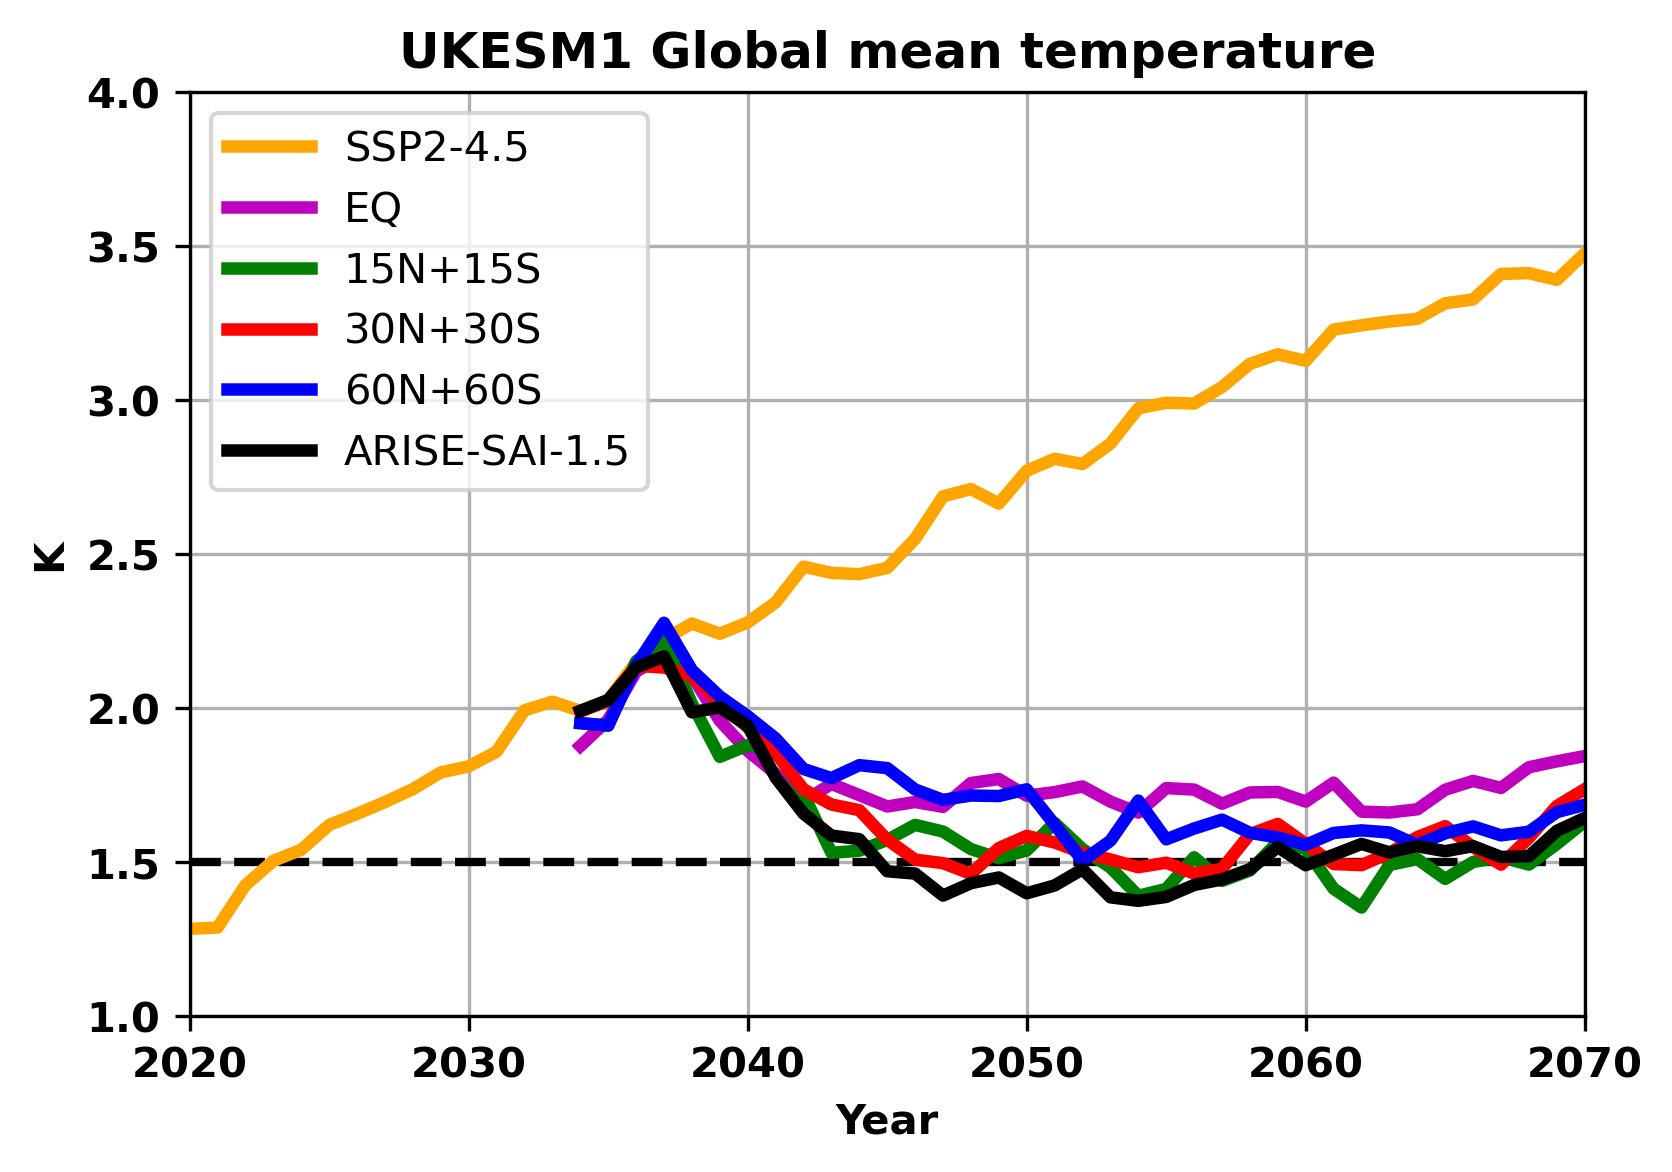

In [7]:
plt.figure(figsize=(6,4),dpi=300)
plt.axhline(y=1.5, color='k', linestyle='--',lw=2)
(ukesm_ssp_ts_ave-286.56).weighted(weights_ukesm_ssp).mean(('lat','lon')).groupby('time.year').mean('time').plot(c='orange',lw=3,label='SSP2-4.5')
(ukesm_0NS_ts_ave-286.56).weighted(weights_ukesm_arise).mean(('latitude','longitude')).groupby('time.year').mean('time').plot(c='m',lw=3,label='EQ')
(ukesm_15NS_ts_ave-286.56).weighted(weights_ukesm_arise).mean(('latitude','longitude')).groupby('time.year').mean('time').plot(c='g',lw=3,label='15N+15S')
(ukesm_30NS_ts_ave-286.56).weighted(weights_ukesm_arise).mean(('latitude','longitude')).groupby('time.year').mean('time').plot(c='r',lw=3,label='30N+30S')
(ukesm_60NS_ts_ave-286.56).weighted(weights_ukesm_arise).mean(('latitude','longitude')).groupby('time.year').mean('time').plot(c='b',lw=3,label='60N+60S')
(ukesm_arise_ts_ave-286.56).weighted(weights_ukesm_arise).mean(('latitude','longitude')).groupby('time.year').mean('time').plot(c='k',lw=3,label='ARISE-SAI-1.5')
plt.title('UKESM1 Global mean temperature',fontweight='bold')
plt.ylim([1,4])
plt.ylabel('K',fontweight='bold')
plt.xlabel('Year',fontweight='bold')
plt.yticks(fontweight='bold')
plt.xticks(fontweight='bold')
plt.grid()
plt.xlim([2020,2070])
plt.legend()
plt.savefig('/data/users/mhenry/figs/fig_SAI_1.pdf')
plt.show()

In [8]:
print(ukesm_ssp_ts_ave.weighted(weights_ukesm_ssp).mean(('lat','lon')).groupby('time.year').mean('time')\
    .sel(year=slice(2060,2069)).mean('year').values-
     ukesm_arise_ts_ave.weighted(weights_ukesm_arise).mean(('latitude','longitude')).groupby('time.year').mean('time')\
    .sel(year=slice(2060,2069)).mean('year').values)

1.7553054415479323


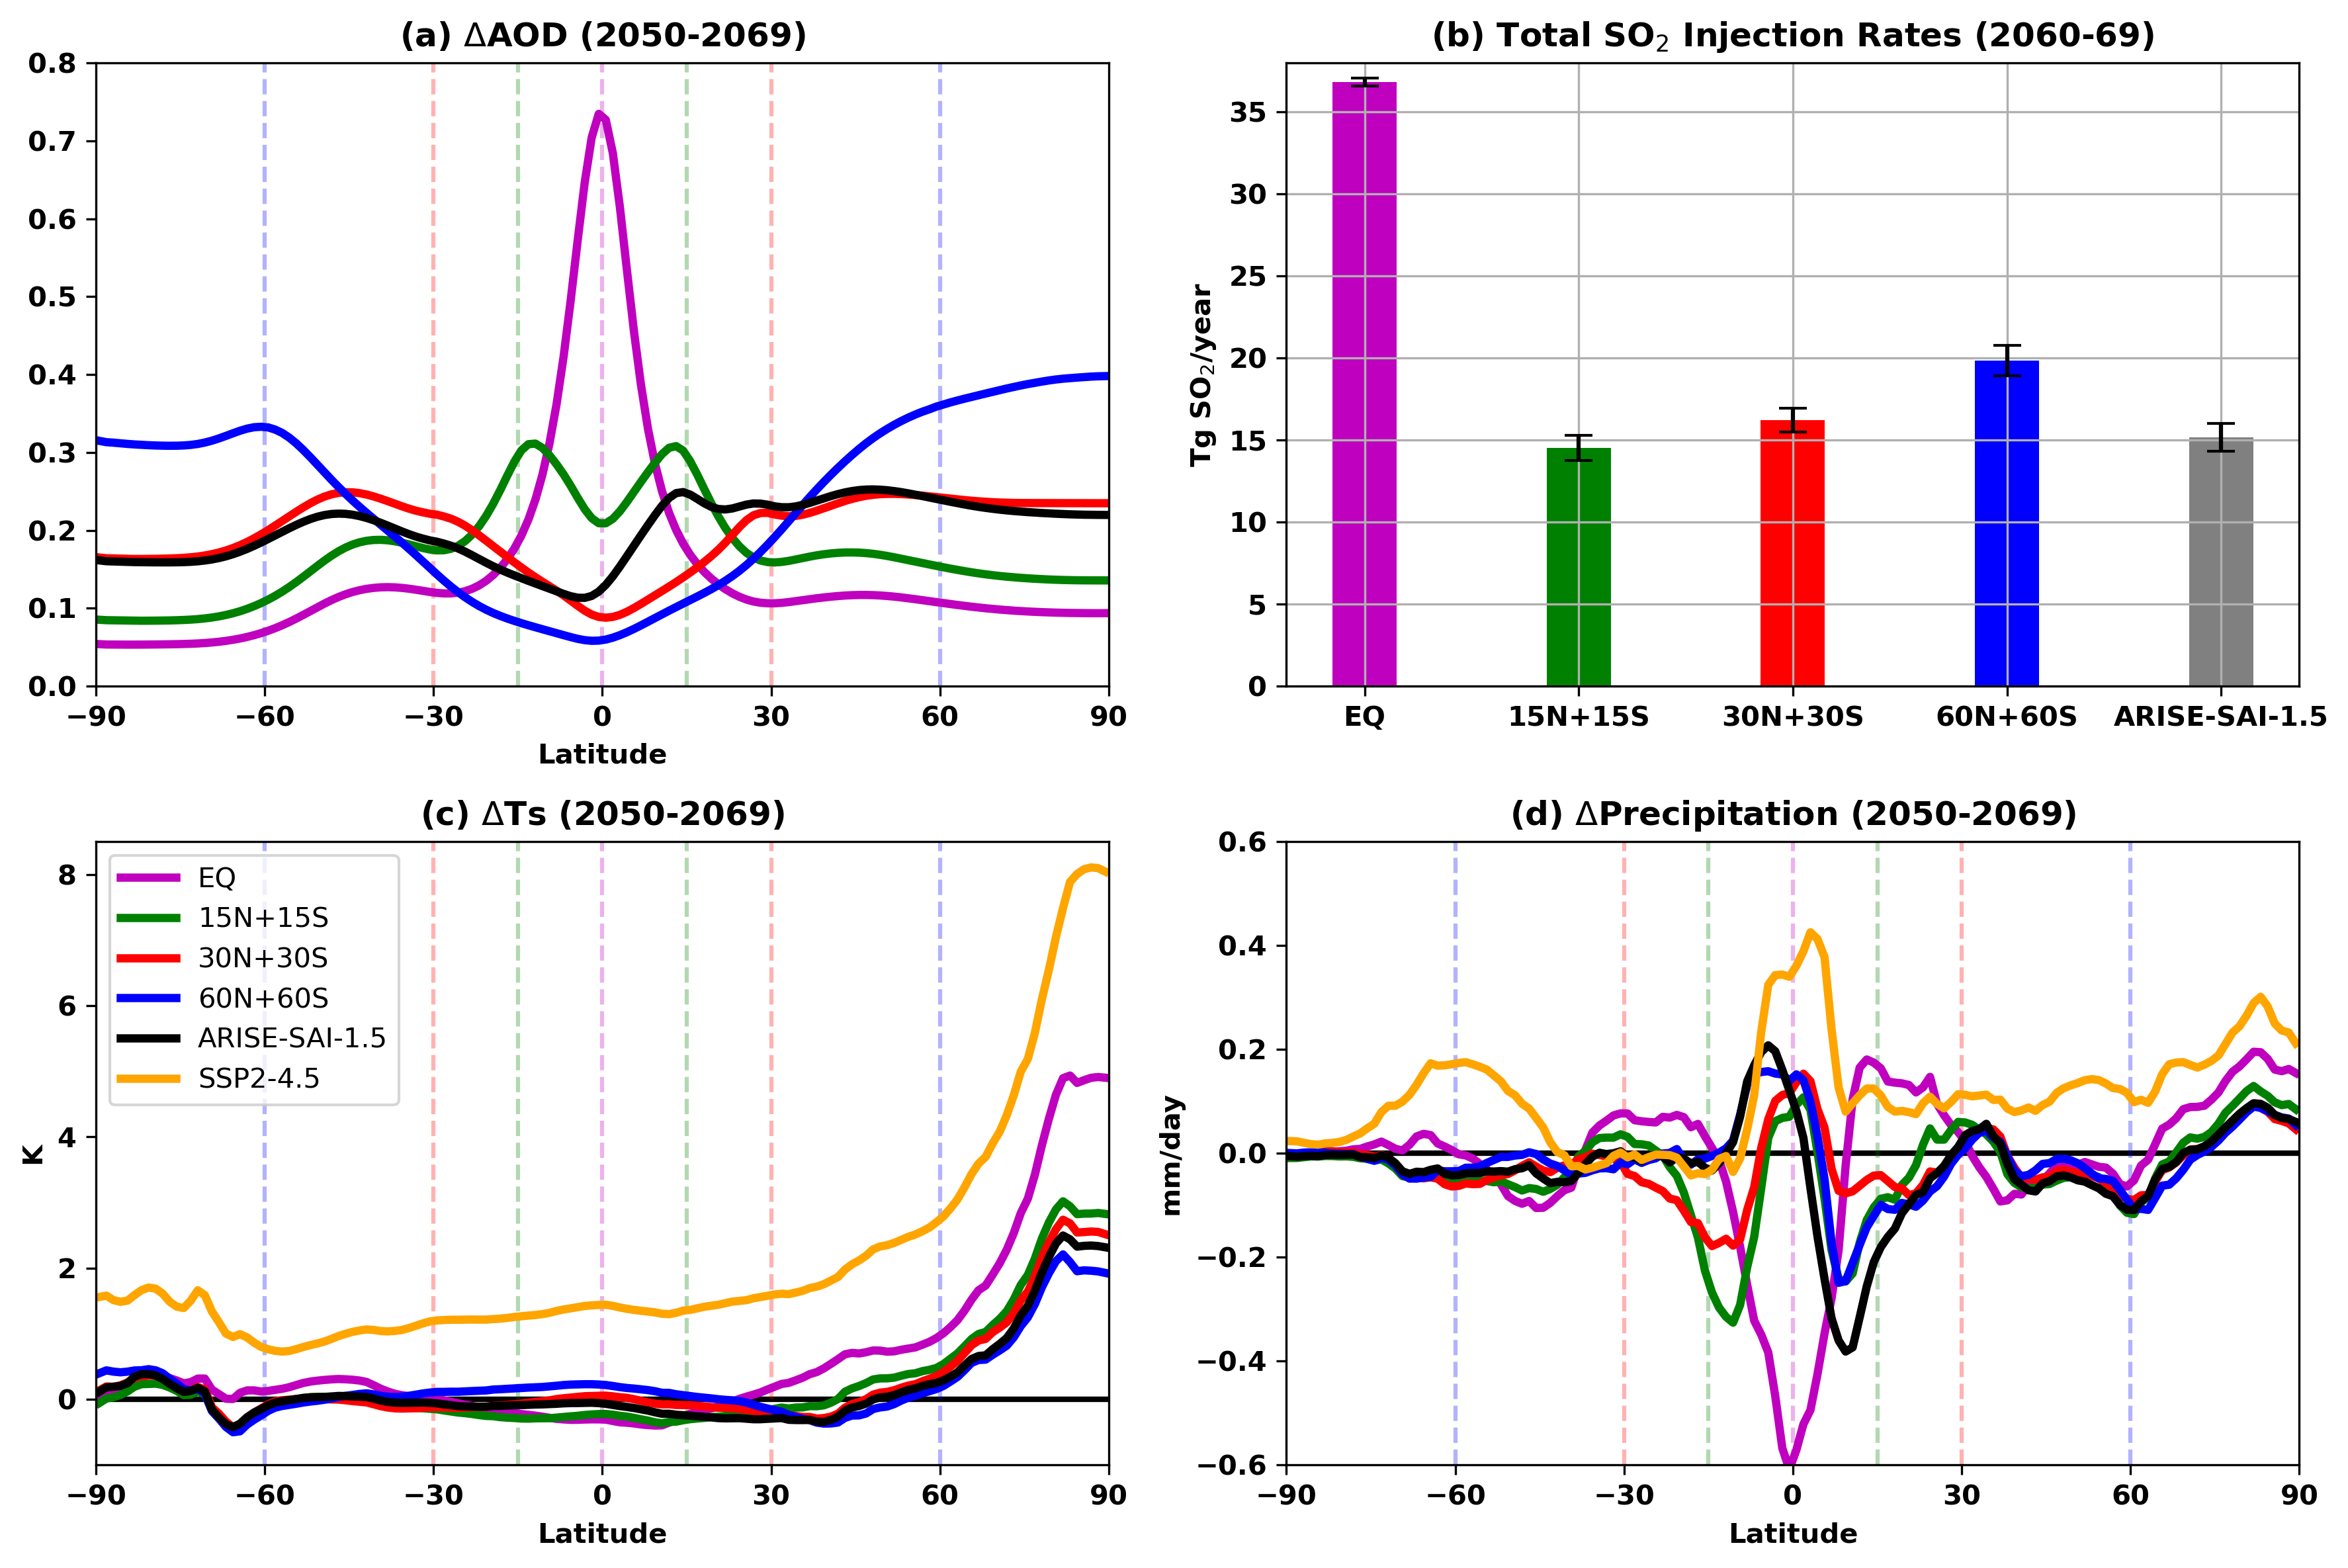

In [9]:
plt.figure(figsize=(12,8),dpi=300)
plt.subplot(221)
plt.axvline(x=0,c='m',ls='--',alpha=0.3)
plt.axvline(x=15,c='g',ls='--',alpha=0.3)
plt.axvline(x=-15,c='g',ls='--',alpha=0.3)
plt.axvline(x=30,c='r',ls='--',alpha=0.3)
plt.axvline(x=-30,c='r',ls='--',alpha=0.3)
plt.axvline(x=60,c='b',ls='--',alpha=0.3)
plt.axvline(x=-60,c='b',ls='--',alpha=0.3)
((ukesm_0NS_aod_ave.sel(time=slice('2050','2069')).mean('time') - ukesm_ssp_aod_ave.sel(time=slice('2014','2033')).mean('time'))).plot(lw=3,c='m', label='0N/S')
((ukesm_15NS_aod_ave.sel(time=slice('2050','2069')).mean('time') - ukesm_ssp_aod_ave.sel(time=slice('2014','2033')).mean('time'))).plot(lw=3,c='g', label='15N/S')
((ukesm_30NS_aod_ave.sel(time=slice('2050','2069')).mean('time') - ukesm_ssp_aod_ave.sel(time=slice('2014','2033')).mean('time'))).plot(lw=3,c='r', label='30N/S')
((ukesm_60NS_aod_ave.sel(time=slice('2050','2069')).mean('time') - ukesm_ssp_aod_ave.sel(time=slice('2014','2033')).mean('time'))).plot(lw=3,c='b', label='60N/S')
((ukesm_arise_aod_ave.sel(time=slice('2050','2069')).mean('time') - ukesm_ssp_aod_ave.sel(time=slice('2014','2033')).mean('time'))).plot(lw=3,c='k', label='ARISE-SAI-1.5')
plt.xlabel('Latitude',fontweight='bold')
# plt.ylabel('mm/day',fontweight='bold')
plt.ylim([0,0.8])
plt.xlim([-90,90])
plt.xticks(np.linspace(-90,90,7),fontweight='bold')
plt.yticks(fontweight='bold')
plt.title('(a) $\Delta$AOD (2050-2069)',fontweight='bold')
# plt.legend()
plt.subplot(223)
plt.axhline(y=0,c='k',lw=2)
plt.axvline(x=0,c='m',ls='--',alpha=0.3)
plt.axvline(x=15,c='g',ls='--',alpha=0.3)
plt.axvline(x=-15,c='g',ls='--',alpha=0.3)
plt.axvline(x=30,c='r',ls='--',alpha=0.3)
plt.axvline(x=-30,c='r',ls='--',alpha=0.3)
plt.axvline(x=60,c='b',ls='--',alpha=0.3)
plt.axvline(x=-60,c='b',ls='--',alpha=0.3)
(ukesm_0NS_ts_ave.sel(time=slice('2050','2069')).mean('time').mean('longitude').rename({'latitude':'lat'}) - ukesm_ssp_ts_ave.sel(time=slice('2014','2033')).mean('time').mean('lon')).plot(lw=3,c='m', label='EQ')
(ukesm_15NS_ts_ave.sel(time=slice('2050','2069')).mean('time').mean('longitude').rename({'latitude':'lat'}) - ukesm_ssp_ts_ave.sel(time=slice('2014','2033')).mean('time').mean('lon')).plot(lw=3,c='g', label='15N+15S')
(ukesm_30NS_ts_ave.sel(time=slice('2050','2069')).mean('time').mean('longitude').rename({'latitude':'lat'}) - ukesm_ssp_ts_ave.sel(time=slice('2014','2033')).mean('time').mean('lon')).plot(lw=3,c='r', label='30N+30S')
(ukesm_60NS_ts_ave.sel(time=slice('2050','2069')).mean('time').mean('longitude').rename({'latitude':'lat'}) - ukesm_ssp_ts_ave.sel(time=slice('2014','2033')).mean('time').mean('lon')).plot(lw=3,c='b', label='60N+60S')
(ukesm_arise_ts_ave.sel(time=slice('2050','2069')).mean('time').mean('longitude').rename({'latitude':'lat'}) - ukesm_ssp_ts_ave.sel(time=slice('2014','2033')).mean('time').mean('lon')).plot(lw=3,c='k', label='ARISE-SAI-1.5')
(ukesm_ssp_ts_ave.sel(time=slice('2050','2069')).mean('time').mean('lon')- ukesm_ssp_ts_ave.sel(time=slice('2014','2033')).mean('time').mean('lon')).plot(lw=3,c='orange', label='SSP2-4.5')
plt.xlabel('Latitude',fontweight='bold')
plt.ylabel('K',fontweight='bold')
plt.ylim([-1,8.5])
plt.xlim([-90,90])
plt.xticks(np.linspace(-90,90,7),fontweight='bold')
plt.yticks(fontweight='bold')
plt.title('(c) $\Delta$Ts (2050-2069)',fontweight='bold')
plt.legend()
plt.subplot(224)
plt.axhline(y=0,c='k',lw=2)
plt.axvline(x=0,c='m',ls='--',alpha=0.3)
plt.axvline(x=15,c='g',ls='--',alpha=0.3)
plt.axvline(x=-15,c='g',ls='--',alpha=0.3)
plt.axvline(x=30,c='r',ls='--',alpha=0.3)
plt.axvline(x=-30,c='r',ls='--',alpha=0.3)
plt.axvline(x=60,c='b',ls='--',alpha=0.3)
plt.axvline(x=-60,c='b',ls='--',alpha=0.3)
(ukesm_0NS_pr_ave.sel(time=slice('2050','2069')).mean('time').mean('longitude').rename({'latitude':'lat'})*86400 - ukesm_ssp_pr_ave.sel(time=slice('2014','2033')).mean('time').mean('lon')*86400).plot(lw=3,c='m', label='0$^\circ$')
(ukesm_15NS_pr_ave.sel(time=slice('2050','2069')).mean('time').mean('longitude').rename({'latitude':'lat'})*86400 - ukesm_ssp_pr_ave.sel(time=slice('2014','2033')).mean('time').mean('lon')*86400).plot(lw=3,c='g', label='15$^\circ$N/S')
(ukesm_30NS_pr_ave.sel(time=slice('2050','2069')).mean('time').mean('longitude').rename({'latitude':'lat'})*86400 - ukesm_ssp_pr_ave.sel(time=slice('2014','2033')).mean('time').mean('lon')*86400).plot(lw=3,c='r', label='30$^\circ$N/S')
(ukesm_60NS_pr_ave.sel(time=slice('2050','2069')).mean('time').mean('longitude').rename({'latitude':'lat'})*86400 - ukesm_ssp_pr_ave.sel(time=slice('2014','2033')).mean('time').mean('lon')*86400).plot(lw=3,c='b', label='60$^\circ$N/S')
(ukesm_arise_pr_ave.sel(time=slice('2050','2069')).mean('time').mean('lon')*86400 - ukesm_ssp_pr_ave.sel(time=slice('2014','2033')).mean('time').mean('lon')*86400).plot(lw=3,c='k', label='ARISE-SAI-1.5')
(ukesm_ssp_pr_ave.sel(time=slice('2050','2069')).mean('time').mean('lon')*86400- ukesm_ssp_pr_ave.sel(time=slice('2014','2033')).mean('time').mean('lon')*86400).plot(lw=3,c='orange', label='SSP2-4.5')
plt.xlabel('Latitude',fontweight='bold')
plt.ylabel('mm/day',fontweight='bold')
plt.ylim([-0.6,0.6])
plt.xlim([-90,90])
plt.xticks(np.linspace(-90,90,7),fontweight='bold')
plt.yticks(fontweight='bold')
plt.title('(d) $\Delta$Precipitation (2050-2069)',fontweight='bold')
plt.subplot(222)
plt.bar(x=['EQ','15N+15S','30N+30S','60N+60S','ARISE-SAI-1.5'], height=[36.83,14.53,16.21,19.84,15.16],yerr =[0.24,0.77,0.726,0.92,0.848] ,color=['m','g','r','b','grey'],width=0.3,capsize=5)
plt.ylabel('Tg SO$_2$/year',fontweight='bold')
plt.ylim([0,38])
plt.yticks(fontweight='bold')
plt.xticks(fontweight='bold')
plt.grid()
plt.title('(b) Total SO$_2$ Injection Rates (2060-69)',fontweight='bold')
plt.tight_layout()
plt.savefig('/data/users/mhenry/figs/fig_SAI_2.pdf')
plt.show()

In [10]:
print('Arctic temperature changes relative to reference period')
print('SSP2-4.5 : ',(ukesm_ssp_ts_ave.sel(time=slice('2050','2069')).mean('time').mean('lon') - ukesm_ssp_ts_ave.sel(time=slice('2014','2033')).mean('time').mean('lon')).sel(lat=slice(80,90)).weighted(weights_ukesm_ssp).mean('lat').values)
print('EQ : ',(ukesm_0NS_ts_ave.sel(time=slice('2050','2069')).mean('time').mean('longitude').rename({'latitude':'lat'}) - ukesm_ssp_ts_ave.sel(time=slice('2014','2033')).mean('time').mean('lon')).sel(lat=slice(80,90)).weighted(weights_ukesm_ssp).mean('lat').values)
print('30NS : ', (ukesm_30NS_ts_ave.sel(time=slice('2050','2069')).mean('time').mean('longitude').rename({'latitude':'lat'}) - ukesm_ssp_ts_ave.sel(time=slice('2014','2033')).mean('time').mean('lon')).sel(lat=slice(80,90)).weighted(weights_ukesm_ssp).mean('lat').values)
print('60NS : ', (ukesm_60NS_ts_ave.sel(time=slice('2050','2069')).mean('time').mean('longitude').rename({'latitude':'lat'}) - ukesm_ssp_ts_ave.sel(time=slice('2014','2033')).mean('time').mean('lon')).sel(lat=slice(80,90)).weighted(weights_ukesm_ssp).mean('lat').values)
print('ARISE : ',(ukesm_arise_ts_ave.sel(time=slice('2050','2069')).mean('time').mean('longitude').rename({'latitude':'lat'}) - ukesm_ssp_ts_ave.sel(time=slice('2014','2033')).mean('time').mean('lon')).sel(lat=slice(80,90)).weighted(weights_ukesm_ssp).mean('lat').values)

Arctic temperature changes relative to reference period
SSP2-4.5 :  7.6755317464153565
EQ :  4.829747835587153
30NS :  2.618943699499958
60NS :  2.065017086494451
ARISE :  2.3941362301597295


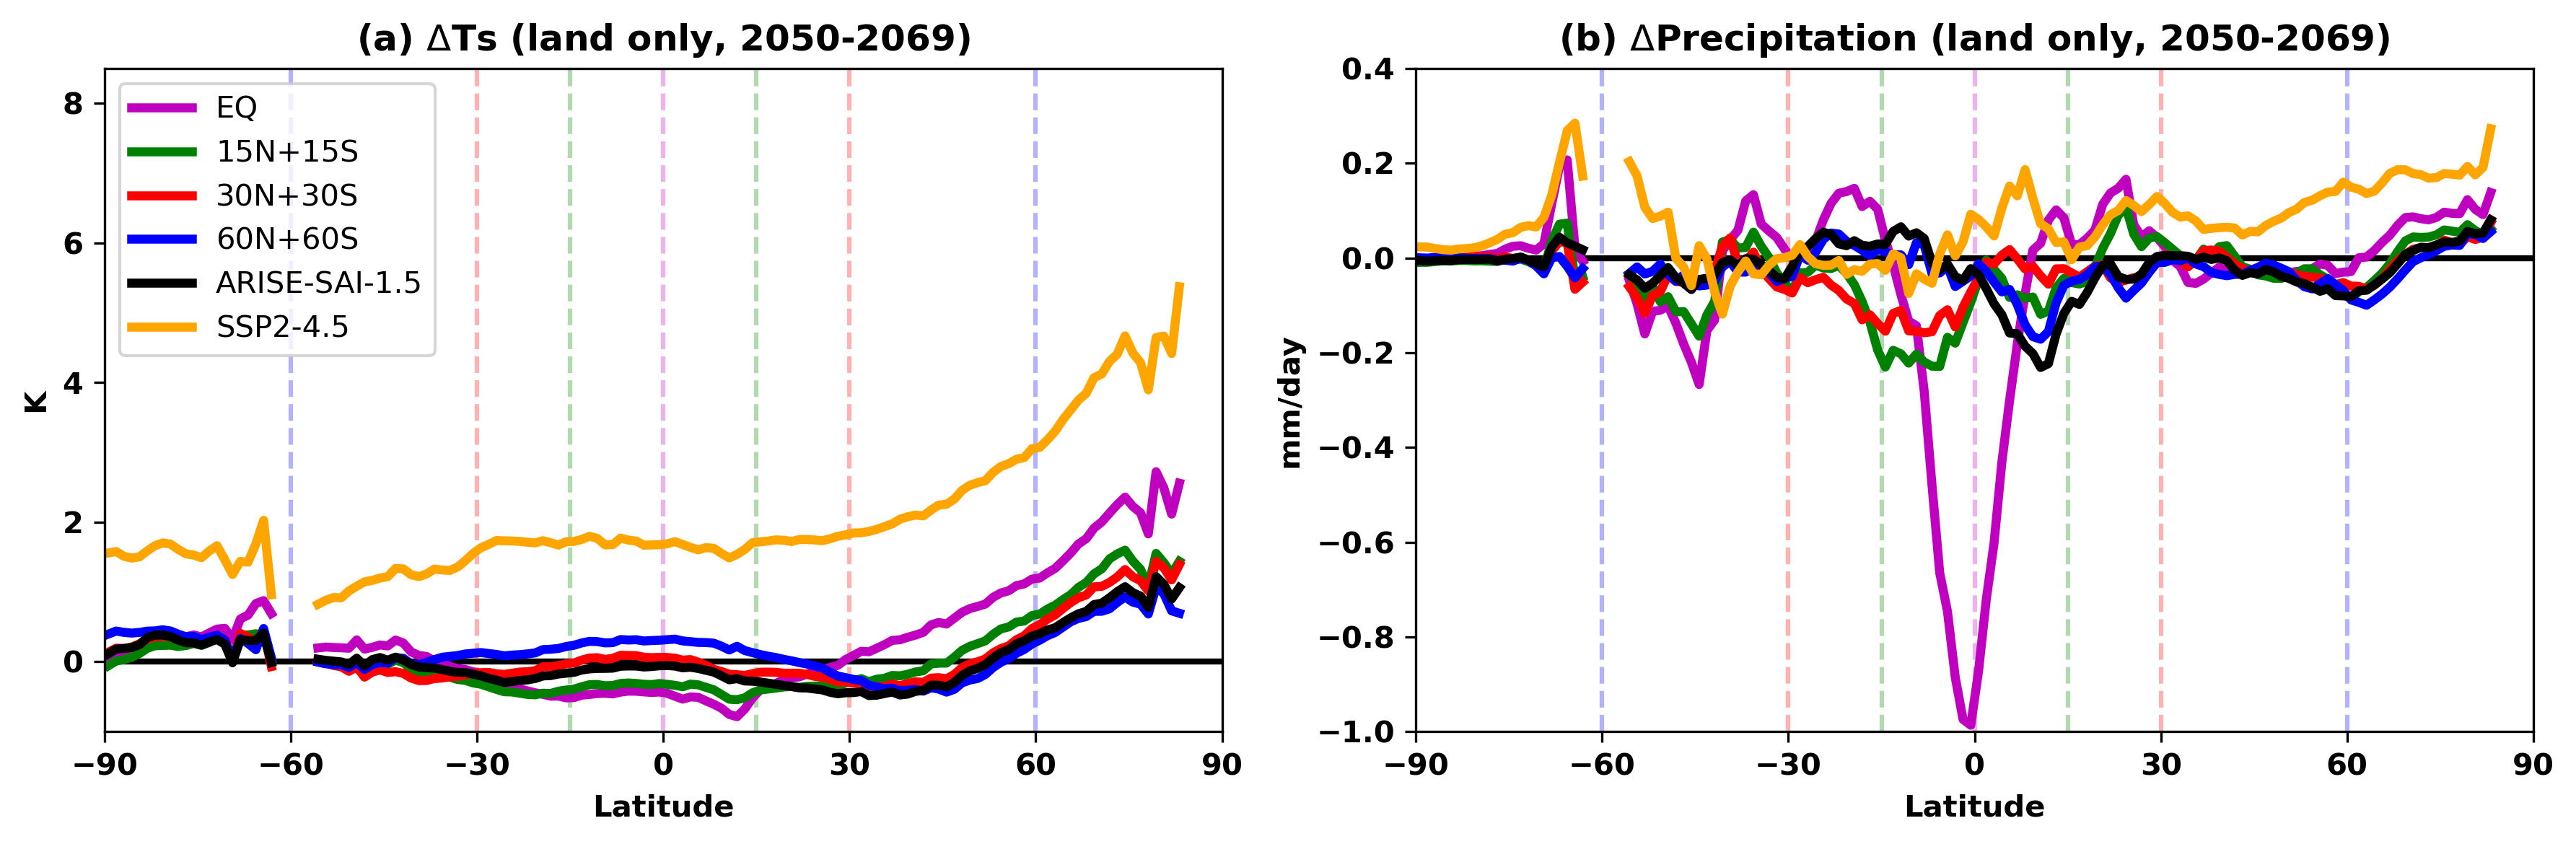

In [11]:
plt.figure(figsize=(12,4),dpi=300)
plt.subplot(121)
plt.axhline(y=0,c='k',lw=2)
plt.axvline(x=0,c='m',ls='--',alpha=0.3)
plt.axvline(x=15,c='g',ls='--',alpha=0.3)
plt.axvline(x=-15,c='g',ls='--',alpha=0.3)
plt.axvline(x=30,c='r',ls='--',alpha=0.3)
plt.axvline(x=-30,c='r',ls='--',alpha=0.3)
plt.axvline(x=60,c='b',ls='--',alpha=0.3)
plt.axvline(x=-60,c='b',ls='--',alpha=0.3)
(ukesm_0NS_ts_ave.sel(time=slice('2050','2069')).mean('time').where(land_long).mean('longitude').rename({'latitude':'lat'}) - ukesm_ssp_ts_ave.sel(time=slice('2014','2033')).mean('time').where(land).mean('lon')).plot(lw=3,c='m', label='EQ')
(ukesm_15NS_ts_ave.sel(time=slice('2050','2069')).mean('time').where(land_long).mean('longitude').rename({'latitude':'lat'}) - ukesm_ssp_ts_ave.sel(time=slice('2014','2033')).mean('time').where(land).mean('lon')).plot(lw=3,c='g', label='15N+15S')
(ukesm_30NS_ts_ave.sel(time=slice('2050','2069')).mean('time').where(land_long).mean('longitude').rename({'latitude':'lat'}) - ukesm_ssp_ts_ave.sel(time=slice('2014','2033')).mean('time').where(land).mean('lon')).plot(lw=3,c='r', label='30N+30S')
(ukesm_60NS_ts_ave.sel(time=slice('2050','2069')).mean('time').where(land_long).mean('longitude').rename({'latitude':'lat'}) - ukesm_ssp_ts_ave.sel(time=slice('2014','2033')).mean('time').where(land).mean('lon')).plot(lw=3,c='b', label='60N+60S')
(ukesm_arise_ts_ave.sel(time=slice('2050','2069')).mean('time').where(land_long).mean('longitude').rename({'latitude':'lat'}) - ukesm_ssp_ts_ave.sel(time=slice('2014','2033')).mean('time').where(land).mean('lon')).plot(lw=3,c='k', label='ARISE-SAI-1.5')
(ukesm_ssp_ts_ave.sel(time=slice('2050','2069')).mean('time').where(land).mean('lon')- ukesm_ssp_ts_ave.sel(time=slice('2014','2033')).mean('time').where(land).mean('lon')).plot(lw=3,c='orange', label='SSP2-4.5')
plt.xlabel('Latitude',fontweight='bold')
plt.ylabel('K',fontweight='bold')
plt.ylim([-1,8.5])
plt.xlim([-90,90])
plt.xticks(np.linspace(-90,90,7),fontweight='bold')
plt.yticks(fontweight='bold')
plt.title('(a) $\Delta$Ts (land only, 2050-2069)',fontweight='bold')
plt.legend()
plt.subplot(122)
plt.axhline(y=0,c='k',lw=2)
plt.axvline(x=0,c='m',ls='--',alpha=0.3)
plt.axvline(x=15,c='g',ls='--',alpha=0.3)
plt.axvline(x=-15,c='g',ls='--',alpha=0.3)
plt.axvline(x=30,c='r',ls='--',alpha=0.3)
plt.axvline(x=-30,c='r',ls='--',alpha=0.3)
plt.axvline(x=60,c='b',ls='--',alpha=0.3)
plt.axvline(x=-60,c='b',ls='--',alpha=0.3)
(ukesm_0NS_pr_ave.sel(time=slice('2050','2069')).mean('time').where(land_long).mean('longitude').rename({'latitude':'lat'})*86400 - ukesm_ssp_pr_ave.sel(time=slice('2014','2033')).mean('time').where(land).mean('lon')*86400).plot(lw=3,c='m', label='0$^\circ$')
(ukesm_15NS_pr_ave.sel(time=slice('2050','2069')).mean('time').where(land_long).mean('longitude').rename({'latitude':'lat'})*86400 - ukesm_ssp_pr_ave.sel(time=slice('2014','2033')).mean('time').where(land).mean('lon')*86400).plot(lw=3,c='g', label='15$^\circ$N/S')
(ukesm_30NS_pr_ave.sel(time=slice('2050','2069')).mean('time').where(land_long).mean('longitude').rename({'latitude':'lat'})*86400 - ukesm_ssp_pr_ave.sel(time=slice('2014','2033')).mean('time').where(land).mean('lon')*86400).plot(lw=3,c='r', label='30$^\circ$N/S')
(ukesm_60NS_pr_ave.sel(time=slice('2050','2069')).mean('time').where(land_long).mean('longitude').rename({'latitude':'lat'})*86400 - ukesm_ssp_pr_ave.sel(time=slice('2014','2033')).mean('time').where(land).mean('lon')*86400).plot(lw=3,c='b', label='60$^\circ$N/S')
(ukesm_arise_pr_ave.sel(time=slice('2050','2069')).mean('time').where(land).mean('lon')*86400 - ukesm_ssp_pr_ave.sel(time=slice('2014','2033')).mean('time').where(land).mean('lon')*86400).plot(lw=3,c='k', label='ARISE-SAI-1.5')
(ukesm_ssp_pr_ave.sel(time=slice('2050','2069')).mean('time').where(land).mean('lon')*86400- ukesm_ssp_pr_ave.sel(time=slice('2014','2033')).mean('time').where(land).mean('lon')*86400).plot(lw=3,c='orange', label='SSP2-4.5')
plt.xlabel('Latitude',fontweight='bold')
plt.ylabel('mm/day',fontweight='bold')
plt.ylim([-1,0.4])
plt.xlim([-90,90])
plt.xticks(np.linspace(-90,90,7),fontweight='bold')
plt.yticks(fontweight='bold')
plt.title('(b) $\Delta$Precipitation (land only, 2050-2069)',fontweight='bold')
plt.tight_layout()
plt.savefig('/data/users/mhenry/figs/fig_SAI_S5.pdf')
plt.show()

In [12]:
T1_arr_arr = []
sim_arr = ukesm_ssp_ts_arr
T1_arr = []
for sim in sim_arr:
    T1_arr.append((sim*np.sin(sim.lat*np.pi/180)).weighted(weights_ukesm_ssp).mean(('lat','lon')).groupby('time.year').mean('time'))
T1_arr_arr.append(T1_arr)
for sim_arr in [ukesm_arise_ts_arr,ukesm_0NS_ts_arr,ukesm_15NS_ts_arr,ukesm_30NS_ts_arr,ukesm_60NS_ts_arr]:
    T1_arr = []
    for sim in sim_arr:
        T1_arr.append((sim*np.sin(sim.latitude*np.pi/180)).weighted(weights_ukesm_arise).mean(('latitude','longitude')).groupby('time.year').mean('time'))
    T1_arr_arr.append(T1_arr)

In [13]:
T1_ssp_ref = [T1_arr_arr[0][0].sel(year=slice(2014,2033)).mean('year').values,
              T1_arr_arr[0][1].sel(year=slice(2014,2033)).mean('year').values,
              T1_arr_arr[0][2].sel(year=slice(2014,2033)).mean('year').values,
              T1_arr_arr[0][3].sel(year=slice(2014,2033)).mean('year').values,
              T1_arr_arr[0][4].sel(year=slice(2014,2033)).mean('year').values]
T1_ssp_end = [T1_arr_arr[0][0].sel(year=slice(2050,2069)).mean('year').values,
              T1_arr_arr[0][1].sel(year=slice(2050,2069)).mean('year').values,
              T1_arr_arr[0][2].sel(year=slice(2050,2069)).mean('year').values,
              T1_arr_arr[0][3].sel(year=slice(2050,2069)).mean('year').values,
              T1_arr_arr[0][4].sel(year=slice(2050,2069)).mean('year').values]
T1_arise = [T1_arr_arr[1][0].sel(year=slice(2050,2069)).mean('year').values,
              T1_arr_arr[1][1].sel(year=slice(2050,2069)).mean('year').values,
              T1_arr_arr[1][2].sel(year=slice(2050,2069)).mean('year').values,
              T1_arr_arr[1][3].sel(year=slice(2050,2069)).mean('year').values,
              T1_arr_arr[1][4].sel(year=slice(2050,2069)).mean('year').values]
T1_EQ = [T1_arr_arr[2][0].sel(year=slice(2050,2069)).mean('year').values,
             T1_arr_arr[2][1].sel(year=slice(2050,2069)).mean('year').values,
             T1_arr_arr[2][2].sel(year=slice(2050,2069)).mean('year').values]
T1_15NS = [T1_arr_arr[3][0].sel(year=slice(2050,2069)).mean('year').values,
              T1_arr_arr[3][1].sel(year=slice(2050,2069)).mean('year').values,
              T1_arr_arr[3][2].sel(year=slice(2050,2069)).mean('year').values]
T1_30NS = [T1_arr_arr[4][0].sel(year=slice(2050,2069)).mean('year').values,
              T1_arr_arr[4][1].sel(year=slice(2050,2069)).mean('year').values,
              T1_arr_arr[4][2].sel(year=slice(2050,2069)).mean('year').values,
              T1_arr_arr[4][3].sel(year=slice(2050,2069)).mean('year').values,
              T1_arr_arr[4][4].sel(year=slice(2050,2069)).mean('year').values]
T1_60NS = [T1_arr_arr[5][0].sel(year=slice(2050,2069)).mean('year').values,
              T1_arr_arr[5][1].sel(year=slice(2050,2069)).mean('year').values,
              T1_arr_arr[5][2].sel(year=slice(2050,2069)).mean('year').values]

In [14]:
itcz_ssp_hist=np.load('./data/itcz/itcz_ssp_hist.npy')
itcz_ssp=np.load('./data/itcz/itcz_ssp.npy')
itcz_arise=np.load('./data/itcz/itcz_arise.npy')
itcz_0NS=np.load('./data/itcz/itcz_0NS.npy')
itcz_15NS=np.load('./data/itcz/itcz_15NS.npy')
itcz_30NS=np.load('./data/itcz/itcz_30NS.npy')
itcz_60NS=np.load('./data/itcz/itcz_60NS.npy')

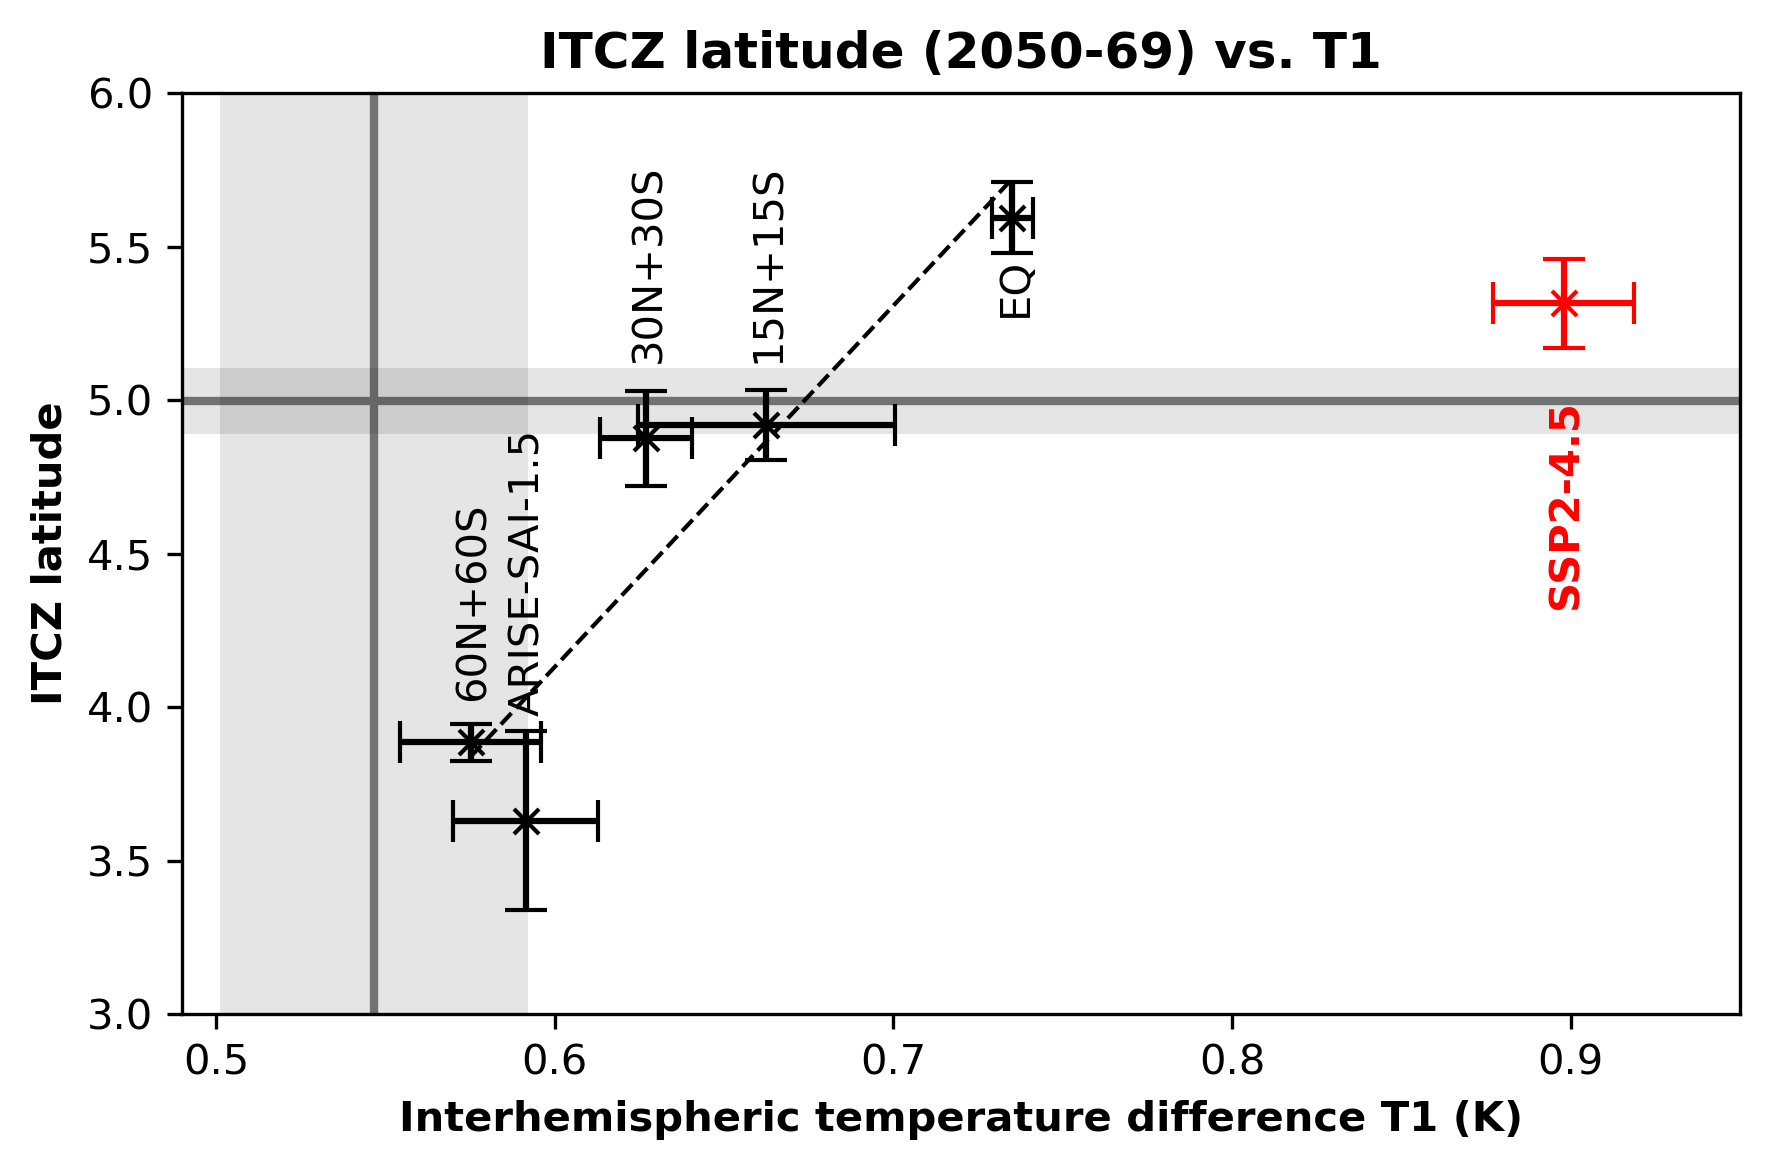

In [15]:
x = [np.mean(T1_arise),np.mean(T1_EQ),np.mean(T1_15NS),np.mean(T1_30NS),np.mean(T1_60NS)]
y= [np.mean(itcz_arise),np.mean(itcz_0NS),np.mean(itcz_15NS),np.mean(itcz_30NS),np.mean(itcz_60NS)]
from matplotlib.collections import PatchCollection
fig = plt.figure(figsize=(6, 4),dpi=300)
ax = fig.add_subplot(1, 1, 1)
plt.errorbar([np.mean(T1_arise),np.mean(T1_EQ),np.mean(T1_15NS),np.mean(T1_30NS),np.mean(T1_60NS)],\
             [np.mean(itcz_arise),np.mean(itcz_0NS),np.mean(itcz_15NS),np.mean(itcz_30NS),np.mean(itcz_60NS)],\
             xerr=[np.std(T1_arise),np.std(T1_EQ),np.std(T1_15NS),np.std(T1_30NS),np.std(T1_60NS)],\
             yerr=[np.std(itcz_arise),np.std(itcz_0NS),np.std(itcz_15NS),np.std(itcz_30NS),np.std(itcz_60NS)],fmt='x',c='k',capsize=5)
plt.errorbar([np.mean(T1_ssp_end)],[np.mean(itcz_ssp)],\
             xerr=[np.std(T1_ssp_end)],yerr=[np.std(itcz_ssp)],fmt='x',c='r',capsize=5)
plt.text(np.mean(T1_arise)-0.005,4,'ARISE-SAI-1.5',rotation='vertical')
plt.text(np.mean(T1_EQ)-0.005,5.3,'EQ',rotation='vertical')
plt.text(np.mean(T1_15NS)-0.005,5.15,'15N+15S',rotation='vertical')
plt.text(np.mean(T1_30NS)-0.005,5.15,'30N+30S',rotation='vertical')
plt.text(np.mean(T1_60NS)-0.005,4.05,'60N+60S',rotation='vertical')
plt.text(np.mean(T1_ssp_end)-0.005,4.35,'SSP2-4.5',rotation='vertical',c='r',fontweight='bold')
rect = plt.Rectangle(xy=(0.45,np.mean(itcz_ssp_hist) - np.std(itcz_ssp_hist)),
                     width=0.5,height=2*np.std(itcz_ssp_hist),
                     facecolor='k',alpha=0.1, zorder=2)
ax.add_patch(rect)
plt.axhline(y=np.mean(itcz_ssp_hist),c='grey',lw=2,zorder=0)
rect2 = plt.Rectangle(xy=(np.mean(T1_ssp_ref)-np.std(T1_ssp_ref),3),
                     width=np.std(T1_ssp_ref)*2,height=3,
                     facecolor='k',alpha=0.1, zorder=2)
ax.add_patch(rect2)
plt.axvline(x=np.mean(T1_ssp_ref),c='grey',lw=2,zorder=0)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),lw=1,ls='--',c='k')
plt.xlim([0.49,0.95])
plt.ylim([3,6])
plt.xlabel('Interhemispheric temperature difference T1 (K)',fontweight='bold')
plt.ylabel('ITCZ latitude',fontweight='bold')
plt.title('ITCZ latitude (2050-69) vs. T1',fontweight='bold')
plt.tight_layout()
plt.savefig('/data/users/mhenry/figs/fig_SAI_3.pdf')
plt.show()

In [16]:
lati = 90
print('Hemispheric temperature differences')
print('SSP hist : ',ukesm_ssp_ts_ave.sel(time=slice('2014','2033')).mean(('time','lon')).sel(lat=slice(0,lati)).weighted(weights_ukesm_ssp).mean('lat').values-\
      ukesm_ssp_ts_ave.sel(time=slice('2014','2033')).mean(('time','lon')).sel(lat=slice(-lati,0)).weighted(weights_ukesm_ssp).mean('lat').values)
print('SSP end : ',ukesm_ssp_ts_ave.sel(time=slice('2050','2069')).mean(('time','lon')).sel(lat=slice(0,lati)).weighted(weights_ukesm_ssp).mean('lat').values-\
      ukesm_ssp_ts_ave.sel(time=slice('2050','2069')).mean(('time','lon')).sel(lat=slice(-lati,0)).weighted(weights_ukesm_ssp).mean('lat').values)
print('ARISE : ',ukesm_arise_ts_ave.sel(time=slice('2050','2069')).mean(('time','longitude')).sel(latitude=slice(0,lati)).weighted(weights_ukesm_arise).mean('latitude').values-\
      ukesm_arise_ts_ave.sel(time=slice('2050','2069')).mean(('time','longitude')).sel(latitude=slice(-lati,0)).weighted(weights_ukesm_arise).mean('latitude').values)
print('EQ : ',ukesm_0NS_ts_ave.sel(time=slice('2050','2069')).mean(('time','longitude')).sel(latitude=slice(0,lati)).weighted(weights_ukesm_arise).mean('latitude').values-\
      ukesm_0NS_ts_ave.sel(time=slice('2050','2069')).mean(('time','longitude')).sel(latitude=slice(-lati,0)).weighted(weights_ukesm_arise).mean('latitude').values)
print('15N+15S : ',ukesm_15NS_ts_ave.sel(time=slice('2050','2069')).mean(('time','longitude')).sel(latitude=slice(0,lati)).weighted(weights_ukesm_arise).mean('latitude').values-\
      ukesm_15NS_ts_ave.sel(time=slice('2050','2069')).mean(('time','longitude')).sel(latitude=slice(-lati,0)).weighted(weights_ukesm_arise).mean('latitude').values)
print('30N+30S : ',ukesm_30NS_ts_ave.sel(time=slice('2050','2069')).mean(('time','longitude')).sel(latitude=slice(0,lati)).weighted(weights_ukesm_arise).mean('latitude').values-\
      ukesm_30NS_ts_ave.sel(time=slice('2050','2069')).mean(('time','longitude')).sel(latitude=slice(-lati,0)).weighted(weights_ukesm_arise).mean('latitude').values)
print('60N+60S : ',ukesm_60NS_ts_ave.sel(time=slice('2050','2069')).mean(('time','longitude')).sel(latitude=slice(0,lati)).weighted(weights_ukesm_arise).mean('latitude').values-\
      ukesm_60NS_ts_ave.sel(time=slice('2050','2069')).mean(('time','longitude')).sel(latitude=slice(-lati,0)).weighted(weights_ukesm_arise).mean('latitude').values)

Hemispheric temperature differences
SSP hist :  1.5027838032278282
SSP end :  2.366934836089797
ARISE :  1.5313416
EQ :  1.9256287
15N+15S :  1.7478943
30N+30S :  1.6565552
60N+60S :  1.4995422


In [17]:
ssp_hist_dT = []
for sim in ukesm_ssp_ts_arr:
    ssp_hist_dT.append(sim.sel(time=slice('2014','2033')).mean(('time','lon')).sel(lat=slice(0,lati)).weighted(weights_ukesm_ssp).mean('lat').values-\
      sim.sel(time=slice('2014','2033')).mean(('time','lon')).sel(lat=slice(-lati,0)).weighted(weights_ukesm_ssp).mean('lat').values)

In [18]:
print(np.mean(ssp_hist_dT),np.std(ssp_hist_dT))

1.5027862837055976 0.1196487290795392


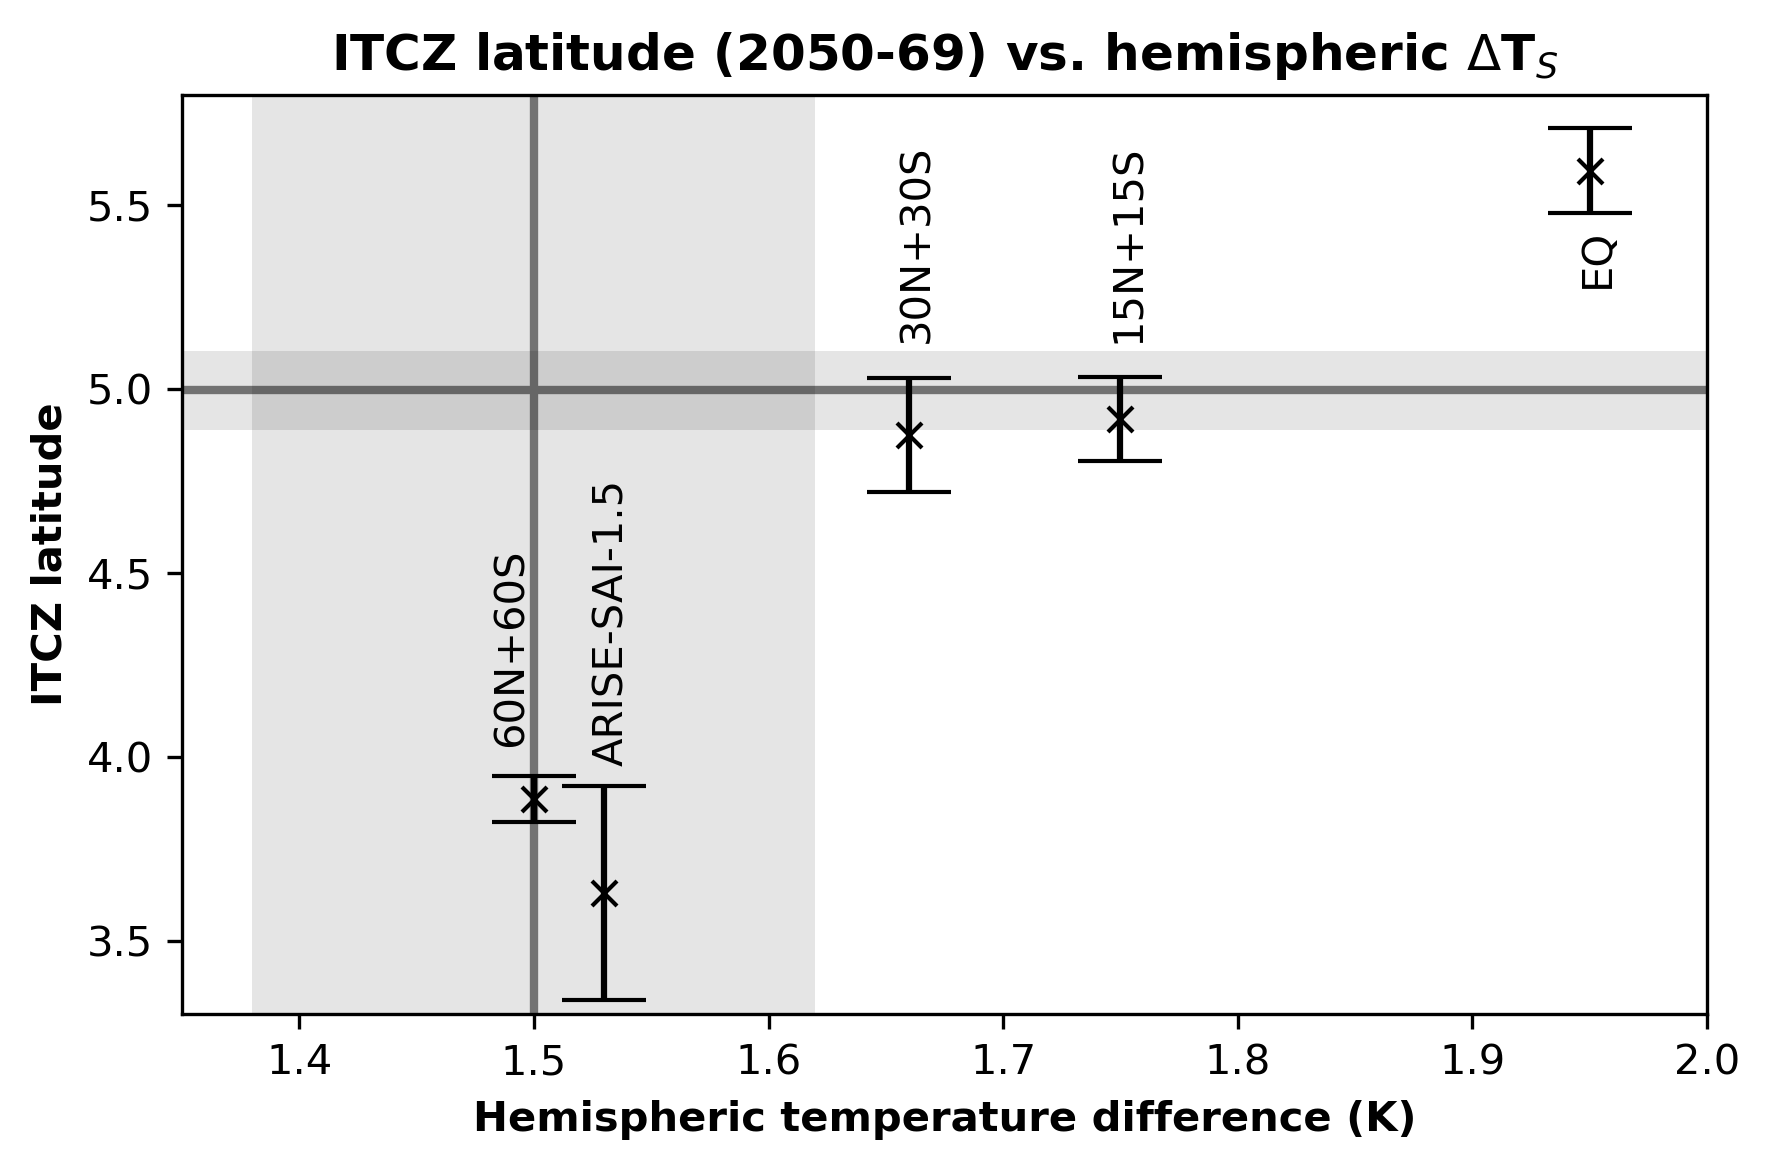

In [19]:
from matplotlib.collections import PatchCollection
fig = plt.figure(figsize=(6, 4),dpi=300)
# ax = fig.add_subplot(1, 1, 1)
# plt.errorbar(np.arange(6),[np.mean(itcz_ssp),np.mean(itcz_arise),np.mean(itcz_0NS),np.mean(itcz_15NS),np.mean(itcz_30NS),np.mean(itcz_60NS)],\
#              yerr=[np.std(itcz_ssp),np.std(itcz_arise),np.std(itcz_0NS),np.std(itcz_15NS),np.std(itcz_30NS),np.std(itcz_60NS)],fmt='x',c='k',capsize=10)
# plt.axhline(y=np.mean(itcz_ssp_hist),c='grey',lw=2,zorder=0)
# rect = plt.Rectangle(xy=(-1,np.mean(itcz_ssp_hist) - np.std(itcz_ssp_hist)),
#                      width=7,height=2*np.std(itcz_ssp_hist),
#                      facecolor='k',alpha=0.3, zorder=2)
# ax.add_patch(rect)
# plt.xticks(np.arange(6),['SSP2-4.5','ARISE','EQ','15N+15S','30N+30S','60N+60S'])
# plt.xlim([-0.5,5.5])
# plt.xlabel('Simulation type',fontweight='bold')
# plt.ylabel('ITCZ latitude',fontweight='bold')
# plt.title('(a) ITCZ latitude (2050-69)',fontweight='bold')

ax = fig.add_subplot(1, 1, 1)
plt.errorbar([1.53,1.95,1.75,1.66,1.50],[np.mean(itcz_arise),np.mean(itcz_0NS),np.mean(itcz_15NS),np.mean(itcz_30NS),np.mean(itcz_60NS)],\
             yerr=[np.std(itcz_arise),np.std(itcz_0NS),np.std(itcz_15NS),np.std(itcz_30NS),np.std(itcz_60NS)],fmt='x',c='k',capsize=10)
plt.text(1.53-0.005,4,'ARISE-SAI-1.5',rotation='vertical')
plt.text(1.95-0.005,5.3,'EQ',rotation='vertical')
plt.text(1.75-0.005,5.15,'15N+15S',rotation='vertical')
plt.text(1.66-0.005,5.15,'30N+30S',rotation='vertical')
plt.text(1.50-0.018,4.05,'60N+60S',rotation='vertical')
# # plt.text(2.37-0.005,5.2,'SSP2-4.5',rotation='vertical')
rect = plt.Rectangle(xy=(1.3,np.mean(itcz_ssp_hist) - np.std(itcz_ssp_hist)),
                     width=0.7,height=2*np.std(itcz_ssp_hist),
                     facecolor='k',alpha=0.1, zorder=2)
ax.add_patch(rect)
plt.axhline(y=np.mean(itcz_ssp_hist),c='grey',lw=2,zorder=0)
rect2 = plt.Rectangle(xy=(1.5-0.12,3),
                     width=0.12*2,height=3,
                     facecolor='k',alpha=0.1, zorder=2)
ax.add_patch(rect2)
plt.axvline(x=1.5,c='grey',lw=2,zorder=0)
plt.xlim([1.35,2.0])
plt.ylim([3.3,5.8])
plt.xlabel('Hemispheric temperature difference (K)',fontweight='bold')
plt.ylabel('ITCZ latitude',fontweight='bold')
plt.title('ITCZ latitude (2050-69) vs. hemispheric $\Delta$T$_S$',fontweight='bold')
plt.tight_layout()
plt.savefig('/data/users/mhenry/figs/fig_SAI_3.pdf')
plt.show()

In [20]:
ukesm_ssp_u_1 = xr.open_dataarray('/data/users/mhenry/SSP245/proc_data/ukesm_ssp245_u_u-be537.nc')
ukesm_ssp_u_2 = xr.open_dataarray('/data/users/mhenry/SSP245/proc_data/ukesm_ssp245_u_u-be394.nc')
ukesm_ssp_u_3 = xr.open_dataarray('/data/users/mhenry/SSP245/proc_data/ukesm_ssp245_u_u-be398.nc')
ukesm_ssp_u_4 = xr.open_dataarray('/data/users/mhenry/SSP245/proc_data/ukesm_ssp245_u_u-be606.nc')
ukesm_ssp_u_5 = xr.open_dataarray('/data/users/mhenry/SSP245/proc_data/ukesm_ssp245_u_u-be683.nc')
ukesm_ssp_u = (ukesm_ssp_u_1+ukesm_ssp_u_2+ukesm_ssp_u_3+ukesm_ssp_u_4+ukesm_ssp_u_5)/5

In [21]:
u_ARISE_1 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_u_u-cl322.nc')
u_ARISE_2 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_u_u-cl458.nc')
u_ARISE_3 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_u_u-cl459.nc')
u_ARISE_4 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_u_u-cl460.nc')
u_ARISE_5 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_u_u-cl461.nc')
u_ARISE = (u_ARISE_1 + u_ARISE_2 + u_ARISE_3 + u_ARISE_4 + u_ARISE_5)/5

In [22]:
u_30NS_1 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_u_u-cr991.nc')
u_30NS_2 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_u_u-cs992.nc')
u_30NS_3 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_u_u-cs993.nc')
u_30NS_4 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_u_u-cs994.nc')
u_30NS_5 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_u_u-cs995.nc')
u_30NS = (u_30NS_1+u_30NS_2+u_30NS_3+u_30NS_4+u_30NS_5)/5

In [23]:
u_0NS_1 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_u_u-ct785.nc')
u_0NS_2 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_u_u-de029.nc')
u_0NS_3 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_u_u-de034.nc')
u_0NS = (u_0NS_1+u_0NS_2+u_0NS_3)/3
u_15NS_1 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_u_u-cu743.nc')
u_15NS_2 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_u_u-cy806.nc')
u_15NS_3 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_u_u-cy807.nc')
u_15NS = (u_15NS_1+u_15NS_2+u_15NS_3)/3
u_60NS_1 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_u_u-ct762.nc')
u_60NS_2 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_u_u-cy808.nc')
u_60NS_3 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_u_u-cy809.nc')
u_60NS = (u_60NS_1+u_60NS_2+u_60NS_3)/3

In [24]:
r_ssp = xr.concat([ukesm_ssp_u_1.sel(time=slice("2050","2069")).groupby('time.year').mean(('time')),
                   ukesm_ssp_u_2.sel(time=slice("2050","2069")).groupby('time.year').mean(('time','longitude')),
                   ukesm_ssp_u_3.sel(time=slice("2050","2069")).groupby('time.year').mean(('time','longitude')),
                   ukesm_ssp_u_4.sel(time=slice("2050","2069")).groupby('time.year').mean(('time','longitude')),
                   ukesm_ssp_u_5.sel(time=slice("2050","2069")).groupby('time.year').mean(('time','longitude'))
                  ],dim='year')

r_ARISE = xr.concat([u_ARISE_1.sel(time=slice("2050","2069")).groupby('time.year').mean('time'),
                     u_ARISE_2.sel(time=slice("2050","2069")).groupby('time.year').mean('time'),
                     u_ARISE_3.sel(time=slice("2050","2069")).groupby('time.year').mean('time'),
                     u_ARISE_4.sel(time=slice("2050","2069")).groupby('time.year').mean('time'),
                     u_ARISE_5.sel(time=slice("2050","2069")).groupby('time.year').mean('time')]
                    ,dim='year')

r_30NS = xr.concat([u_30NS_1.sel(time=slice("2050","2069")).groupby('time.year').mean('time'),
                     u_30NS_2.sel(time=slice("2050","2069")).groupby('time.year').mean(('time','longitude')),
                     u_30NS_3.sel(time=slice("2050","2069")).groupby('time.year').mean(('time','longitude')),
                     u_30NS_4.sel(time=slice("2050","2069")).groupby('time.year').mean(('time','longitude')),
                     u_30NS_5.sel(time=slice("2050","2069")).groupby('time.year').mean(('time','longitude'))]
                    ,dim='year')

r_0NS = xr.concat([u_0NS_1.sel(time=slice("2050","2069")).groupby('time.year').mean('time'),
                   u_0NS_2.sel(time=slice("2050","2069")).groupby('time.year').mean(('time','longitude')),
                   u_0NS_3.sel(time=slice("2050","2069")).groupby('time.year').mean(('time','longitude'))]
                   ,dim='year')

r_15NS = xr.concat([u_15NS_1.sel(time=slice("2050","2069")).groupby('time.year').mean('time'),
                   u_15NS_2.sel(time=slice("2050","2069")).groupby('time.year').mean('time'),
                   u_15NS_3.sel(time=slice("2050","2069")).groupby('time.year').mean('time')]
                   ,dim='year')

r_60NS = xr.concat([u_60NS_1.sel(time=slice("2050","2069")).groupby('time.year').mean('time'),
                   u_60NS_2.sel(time=slice("2050","2069")).groupby('time.year').mean('time'),
                   u_60NS_3.sel(time=slice("2050","2069")).groupby('time.year').mean('time')]
                   ,dim='year')

In [25]:
stat, pval = stats.ttest_ind(r_ssp, r_ARISE)
pval_ARISE = xr.DataArray(
    data=pval,
    dims=["level_height","lat"],
    coords=dict(
        level_height=(["level_height"],r_ssp.level_height.values),
        lat=(["lat"], r_ssp.latitude.values),
    ),
)

stat, pval = stats.ttest_ind(r_ssp, r_0NS)
pval_0NS = xr.DataArray(
    data=pval,
    dims=["level_height","lat"],
    coords=dict(
        level_height=(["level_height"],r_ssp.level_height.values),
        lat=(["lat"], r_ssp.latitude.values),
    ),
)

stat, pval = stats.ttest_ind(r_ssp, r_15NS)
pval_15NS = xr.DataArray(
    data=pval,
    dims=["level_height","lat"],
    coords=dict(
        level_height=(["level_height"],r_ssp.level_height.values),
        lat=(["lat"], r_ssp.latitude.values),
    ),
)

stat, pval = stats.ttest_ind(r_ssp, r_30NS)
pval_30NS = xr.DataArray(
    data=pval,
    dims=["level_height","lat"],
    coords=dict(
        level_height=(["level_height"],r_ssp.level_height.values),
        lat=(["lat"], r_ssp.latitude.values),
    ),
)

stat, pval = stats.ttest_ind(r_ssp, r_60NS)
pval_60NS = xr.DataArray(
    data=pval,
    dims=["level_height","lat"],
    coords=dict(
        level_height=(["level_height"],r_ssp.level_height.values),
        lat=(["lat"], r_ssp.latitude.values),
    ),
)

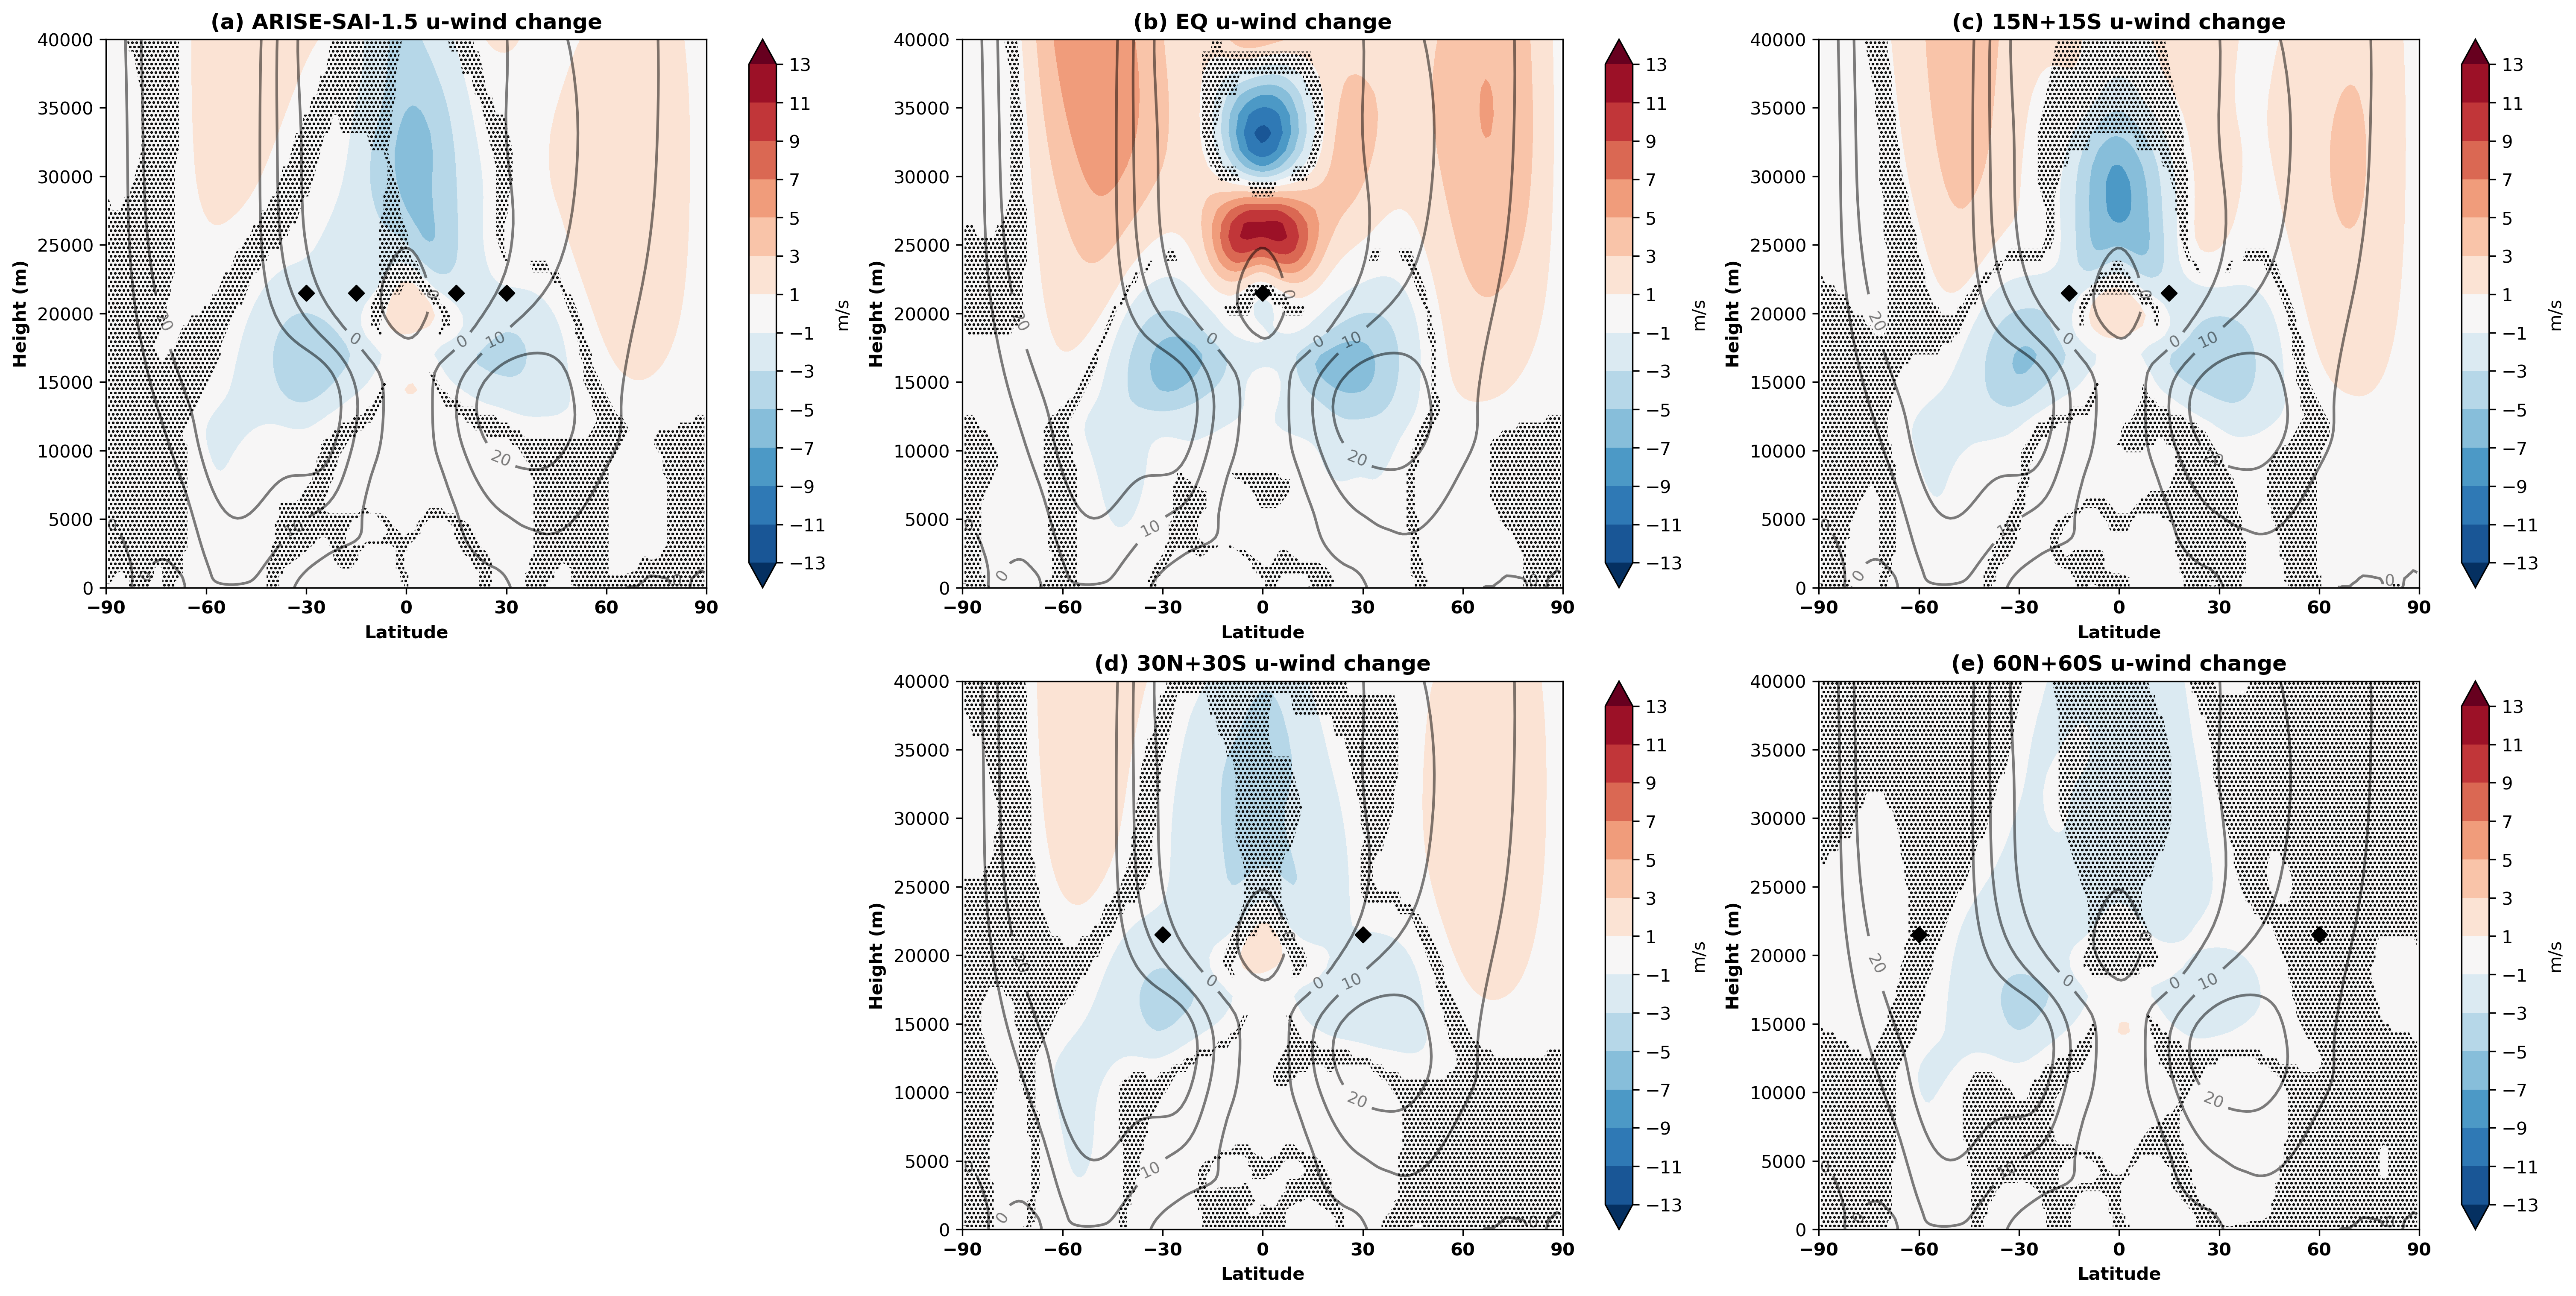

In [26]:
col_levels=[-13,-11,-9,-7,-5,-3,-1,1,3,5,7,9,11,13]

base_data = (ukesm_ssp_u.sel(time=slice('2050','2069')).mean(('time','longitude')))

fig= plt.figure(constrained_layout=True,figsize=(20,10),dpi=300)
ax1 = fig.add_subplot(2,3, 1)
future_data = (u_ARISE.sel(time=slice('2050','2069')).mean('time'))
((future_data-base_data)).plot.contourf(y='level_height',cmap='RdBu_r',levels=col_levels,extend='both',cbar_kwargs={"label":"m/s","ticks":col_levels})
cs = base_data.plot.contour(colors='k',y='level_height',levels=[0,10,20],alpha=0.5)
plt.clabel(cs, fontsize=9, inline=True)
plt.scatter([-30,-15,15,30],[21500,21500,21500,21500],marker='D',c='k')
pval_ARISE.where(pval_ARISE>0.05).plot.contourf(levels=[0,1], colors='none', hatches=['.....'],add_colorbar=False)
# plt.yscale('log')
plt.ylim([0,40000])
plt.xlabel('Latitude',fontweight='bold')
plt.ylabel('Height (m)',fontweight='bold')
# plt.yticks([10000,20000,30000,40000,50000],[10,20,30,40,50],fontweight='bold')
plt.xticks(np.linspace(-90,90,7),fontweight='bold')
plt.title('(a) ARISE-SAI-1.5 u-wind change',fontweight='bold')
ax1.minorticks_off()

ax1 = fig.add_subplot(2,3, 2)
future_data = u_0NS.sel(time=slice('2050','2069')).mean(('time','longitude'))
((future_data-base_data)).plot.contourf(y='level_height',cmap='RdBu_r',levels=col_levels,extend='both',cbar_kwargs={"label":"m/s","ticks":col_levels})
cs = base_data.plot.contour(colors='k',y='level_height',levels=[0,10,20],alpha=0.5)
plt.clabel(cs, fontsize=9, inline=True)
plt.scatter([0],[21500],marker='D',c='k')
pval_0NS.where(pval_0NS>0.05).plot.contourf(levels=[0,1], colors='none', hatches=['.....'],add_colorbar=False)
# plt.yscale('log')
plt.ylim([0,40000])
plt.xlabel('Latitude',fontweight='bold')
plt.ylabel('Height (m)',fontweight='bold')
# plt.yticks([10000,20000,30000,40000,50000],[10,20,30,40,50],fontweight='bold')
plt.xticks(np.linspace(-90,90,7),fontweight='bold')
plt.title('(b) EQ u-wind change',fontweight='bold')
ax1.minorticks_off()

ax1 = fig.add_subplot(2,3, 3)
future_data = u_15NS.sel(time=slice('2050','2069')).mean('time')
((future_data-base_data)).plot.contourf(y='level_height',cmap='RdBu_r',levels=col_levels,extend='both',cbar_kwargs={"label":"m/s","ticks":col_levels})
cs = base_data.plot.contour(colors='k',y='level_height',levels=[0,10,20],alpha=0.5)
plt.clabel(cs, fontsize=9, inline=True)
plt.scatter([-15,15],[21500,21500],marker='D',c='k')
pval_15NS.where(pval_15NS>0.05).plot.contourf(levels=[0,1], colors='none', hatches=['.....'],add_colorbar=False)
# plt.yscale('log')
plt.ylim([0,40000])
plt.xlabel('Latitude',fontweight='bold')
plt.ylabel('Height (m)',fontweight='bold')
# plt.yticks([10000,20000,30000,40000,50000],[10,20,30,40,50],fontweight='bold')
plt.xticks(np.linspace(-90,90,7),fontweight='bold')
plt.title('(c) 15N+15S u-wind change',fontweight='bold')
ax1.minorticks_off()

ax1 = fig.add_subplot(2,3, 5)
future_data = u_30NS.sel(time=slice('2050','2069')).mean(('time','longitude'))
((future_data-base_data)).plot.contourf(y='level_height',cmap='RdBu_r',levels=col_levels,extend='both',cbar_kwargs={"label":"m/s","ticks":col_levels})
cs = base_data.plot.contour(colors='k',y='level_height',levels=[0,10,20],alpha=0.5)
plt.clabel(cs, fontsize=9, inline=True)
plt.scatter([-30,30],[21500,21500],marker='D',c='k')
pval_30NS.where(pval_30NS>0.05).plot.contourf(levels=[0,1], colors='none', hatches=['.....'],add_colorbar=False)
# plt.yscale('log')
plt.ylim([0,40000])
plt.xlabel('Latitude',fontweight='bold')
plt.ylabel('Height (m)',fontweight='bold')
# plt.yticks([10000,20000,30000,40000,50000],[10,20,30,40,50],fontweight='bold')
plt.xticks(np.linspace(-90,90,7),fontweight='bold')
plt.title('(d) 30N+30S u-wind change',fontweight='bold')
ax1.minorticks_off()

ax1 = fig.add_subplot(2,3, 6)
future_data = u_60NS.sel(time=slice('2050','2069')).mean(('time'))
((future_data-base_data)).plot.contourf(y='level_height',cmap='RdBu_r',levels=col_levels,extend='both',cbar_kwargs={"label":"m/s","ticks":col_levels})
cs = base_data.plot.contour(colors='k',y='level_height',levels=[0,10,20],alpha=0.5)
plt.clabel(cs, fontsize=9, inline=True)
plt.scatter([-60,60],[21500,21500],marker='D',c='k')
pval_60NS.where(pval_60NS>0.05).plot.contourf(levels=[0,1], colors='none', hatches=['.....'],add_colorbar=False)
# plt.yscale('log')
plt.ylim([0,40000])
plt.xlabel('Latitude',fontweight='bold')
plt.ylabel('Height (m)',fontweight='bold')
# plt.yticks([10000,20000,30000,40000,50000],[10,20,30,40,50],fontweight='bold')
plt.xticks(np.linspace(-90,90,7),fontweight='bold')
plt.title('(e) 60N+60S u-wind change',fontweight='bold')
ax1.minorticks_off()
# plt.tight_layout()
plt.savefig('/data/users/mhenry/figs/fig_SAI_4.pdf')
plt.show()

In [27]:
ageofair_SSP_1 = xr.open_dataarray('/data/users/mhenry/SSP245/proc_data/ukesm_arise_ageofair_u-be394.nc').mean('longitude')
ageofair_SSP_2 = xr.open_dataarray('/data/users/mhenry/SSP245/proc_data/ukesm_arise_ageofair_u-be398.nc').mean('longitude')
ageofair_SSP_3 = xr.open_dataarray('/data/users/mhenry/SSP245/proc_data/ukesm_arise_ageofair_u-be537.nc').mean('longitude')
ageofair_SSP_4 = xr.open_dataarray('/data/users/mhenry/SSP245/proc_data/ukesm_arise_ageofair_u-be606.nc').mean('longitude')
ageofair_SSP_5 = xr.open_dataarray('/data/users/mhenry/SSP245/proc_data/ukesm_arise_ageofair_u-be683.nc').mean('longitude')
ageofair_SSP = (ageofair_SSP_1+ageofair_SSP_2+ageofair_SSP_3+ageofair_SSP_4+ageofair_SSP_5)/5
ageofair_ARISE_1 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_ageofair_u-cl322.nc').mean('longitude')
ageofair_ARISE_2 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_ageofair_u-cl458.nc').mean('longitude')
ageofair_ARISE_3 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_ageofair_u-cl459.nc').mean('longitude')
ageofair_ARISE_4 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_ageofair_u-cl460.nc').mean('longitude')
ageofair_ARISE_5 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_ageofair_u-cl461.nc').mean('longitude')
ageofair_ARISE = (ageofair_ARISE_1+ageofair_ARISE_2+ageofair_ARISE_3+ageofair_ARISE_4+ageofair_ARISE_5)/5
ageofair_0NS_1 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_ageofair_u-ct785.nc').mean('longitude')
ageofair_0NS_2 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_ageofair_u-de029.nc').mean('longitude')
ageofair_0NS_3 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_ageofair_u-de034.nc').mean('longitude')
ageofair_0NS = (ageofair_0NS_1+ageofair_0NS_2+ageofair_0NS_3)/3
ageofair_15NS_1 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_ageofair_u-cu743.nc').mean('longitude')
ageofair_15NS_2 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_ageofair_u-cy806.nc').mean('longitude')
ageofair_15NS_3 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_ageofair_u-cy807.nc').mean('longitude')
ageofair_15NS = (ageofair_15NS_1+ageofair_15NS_2+ageofair_15NS_3)/3
ageofair_30NS_1 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_ageofair_u-cr991.nc').mean('longitude')
ageofair_30NS_2 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_ageofair_u-cs992.nc').mean('longitude')
ageofair_30NS_3 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_ageofair_u-cs993.nc').mean('longitude')
ageofair_30NS_4 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_ageofair_u-cs994.nc').mean('longitude')
ageofair_30NS_5 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_ageofair_u-cs995.nc').mean('longitude')
ageofair_30NS = (ageofair_30NS_1+ageofair_30NS_2+ageofair_30NS_3+ageofair_30NS_4+ageofair_30NS_5)/5
ageofair_60NS_1 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_ageofair_u-ct762.nc').mean('longitude')
ageofair_60NS_2 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_ageofair_u-cy808.nc').mean('longitude')
ageofair_60NS_3 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_ageofair_u-cy809.nc').mean('longitude')
ageofair_60NS = (ageofair_60NS_1+ageofair_60NS_2+ageofair_60NS_3)/3

In [28]:
trop_SSP_1 = xr.open_dataarray('/data/users/mhenry/SSP245/proc_data/ukesm_arise_trop_u-be394.nc')
trop_SSP_2 = xr.open_dataarray('/data/users/mhenry/SSP245/proc_data/ukesm_arise_trop_u-be398.nc')
trop_SSP_3 = xr.open_dataarray('/data/users/mhenry/SSP245/proc_data/ukesm_arise_trop_u-be537.nc')
trop_SSP_4 = xr.open_dataarray('/data/users/mhenry/SSP245/proc_data/ukesm_arise_trop_u-be606.nc')
trop_SSP_5 = xr.open_dataarray('/data/users/mhenry/SSP245/proc_data/ukesm_arise_trop_u-be683.nc')
trop_SSP = (trop_SSP_1+trop_SSP_2+trop_SSP_3+trop_SSP_4+trop_SSP_5)/5
trop_ARISE_1 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_trop_u-cl322.nc')
trop_ARISE_2 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_trop_u-cl458.nc')
trop_ARISE_3 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_trop_u-cl459.nc')
trop_ARISE_4 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_trop_u-cl460.nc')
trop_ARISE_5 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_trop_u-cl461.nc')
trop_ARISE = (trop_ARISE_1+trop_ARISE_2+trop_ARISE_3+trop_ARISE_4+trop_ARISE_5)/5
trop_0NS_1 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_trop_u-ct785.nc')
trop_0NS_2 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_trop_u-de029.nc').mean('longitude')
trop_0NS_3 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_trop_u-de034.nc').mean('longitude')
trop_0NS = (trop_0NS_1+trop_0NS_2+trop_0NS_3)/3
trop_15NS_1 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_trop_u-cu743.nc')
trop_15NS_2 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_trop_u-cy806.nc')
trop_15NS_3 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_trop_u-cy807.nc')
trop_15NS = (trop_15NS_1+trop_15NS_2+trop_15NS_3)/3
trop_30NS_1 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_trop_u-cr991.nc')
trop_30NS_2 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_trop_u-cs992.nc')
trop_30NS_3 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_trop_u-cs993.nc')
trop_30NS_4 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_trop_u-cs994.nc')
trop_30NS_5 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_trop_u-cs995.nc')
trop_30NS = (trop_30NS_1+trop_30NS_2+trop_30NS_3+trop_30NS_4+trop_30NS_5)/5
trop_60NS_1 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_trop_u-ct762.nc')
trop_60NS_2 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_trop_u-cy808.nc')
trop_60NS_3 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_trop_u-cy809.nc')
trop_60NS = (trop_60NS_1+trop_60NS_2+trop_60NS_3)/3

In [29]:
r_ssp = xr.concat([ageofair_SSP_1.sel(time=slice("2050","2069")).groupby('time.year').mean('time'),
                   ageofair_SSP_2.sel(time=slice("2050","2069")).groupby('time.year').mean('time'),
                   ageofair_SSP_3.sel(time=slice("2050","2069")).groupby('time.year').mean('time'),
                   ageofair_SSP_4.sel(time=slice("2050","2069")).groupby('time.year').mean('time'),
                   ageofair_SSP_5.sel(time=slice("2050","2069")).groupby('time.year').mean('time')
                  ],dim='year')

r_ARISE = xr.concat([ageofair_ARISE_1.sel(time=slice("2050","2069")).groupby('time.year').mean('time'),
                     ageofair_ARISE_2.sel(time=slice("2050","2069")).groupby('time.year').mean('time'),
                     ageofair_ARISE_3.sel(time=slice("2050","2069")).groupby('time.year').mean('time'),
                     ageofair_ARISE_4.sel(time=slice("2050","2069")).groupby('time.year').mean('time'),
                     ageofair_ARISE_5.sel(time=slice("2050","2069")).groupby('time.year').mean('time')]
                    ,dim='year')

r_30NS = xr.concat([ageofair_30NS_1.sel(time=slice("2050","2069")).groupby('time.year').mean('time'),
                    ageofair_30NS_2.sel(time=slice("2050","2069")).groupby('time.year').mean('time'),
                    ageofair_30NS_3.sel(time=slice("2050","2069")).groupby('time.year').mean('time'),
                    ageofair_30NS_4.sel(time=slice("2050","2069")).groupby('time.year').mean('time'),
                    ageofair_30NS_5.sel(time=slice("2050","2069")).groupby('time.year').mean('time')]
                    ,dim='year')

r_0NS = xr.concat([ageofair_0NS_1.sel(time=slice("2050","2069")).groupby('time.year').mean('time'),
                   ageofair_0NS_2.sel(time=slice("2050","2069")).groupby('time.year').mean(('time')),
                   ageofair_0NS_3.sel(time=slice("2050","2069")).groupby('time.year').mean(('time'))]
                   ,dim='year')

r_15NS = xr.concat([ageofair_15NS_1.sel(time=slice("2050","2069")).groupby('time.year').mean('time'),
                   ageofair_15NS_2.sel(time=slice("2050","2069")).groupby('time.year').mean('time'),
                   ageofair_15NS_3.sel(time=slice("2050","2069")).groupby('time.year').mean('time')]
                   ,dim='year')

r_60NS = xr.concat([ageofair_60NS_1.sel(time=slice("2050","2069")).groupby('time.year').mean('time'),
                   ageofair_60NS_2.sel(time=slice("2050","2069")).groupby('time.year').mean('time'),
                   ageofair_60NS_3.sel(time=slice("2050","2069")).groupby('time.year').mean('time')]
                   ,dim='year')

In [30]:
stat, pval = stats.ttest_ind(r_ssp, r_ARISE)
pval_ARISE = xr.DataArray(
    data=pval,
    dims=["pressure","lat"],
    coords=dict(
        pressure=(["pressure"],r_ssp.pressure.values),
        lat=(["lat"], r_ssp.latitude.values),
    ),
)

stat, pval = stats.ttest_ind(r_ssp, r_0NS)
pval_0NS = xr.DataArray(
    data=pval,
    dims=["pressure","lat"],
    coords=dict(
        pressure=(["pressure"],r_ssp.pressure.values),
        lat=(["lat"], r_ssp.latitude.values),
    ),
)

stat, pval = stats.ttest_ind(r_ssp, r_15NS)
pval_15NS = xr.DataArray(
    data=pval,
    dims=["pressure","lat"],
    coords=dict(
        pressure=(["pressure"],r_ssp.pressure.values),
        lat=(["lat"], r_ssp.latitude.values),
    ),
)

stat, pval = stats.ttest_ind(r_ssp, r_30NS)
pval_30NS = xr.DataArray(
    data=pval,
    dims=["pressure","lat"],
    coords=dict(
        pressure=(["pressure"],r_ssp.pressure.values),
        lat=(["lat"], r_ssp.latitude.values),
    ),
)

stat, pval = stats.ttest_ind(r_ssp, r_60NS)
pval_60NS = xr.DataArray(
    data=pval,
    dims=["pressure","lat"],
    coords=dict(
        pressure=(["pressure"],r_ssp.pressure.values),
        lat=(["lat"], r_ssp.latitude.values),
    ),
)

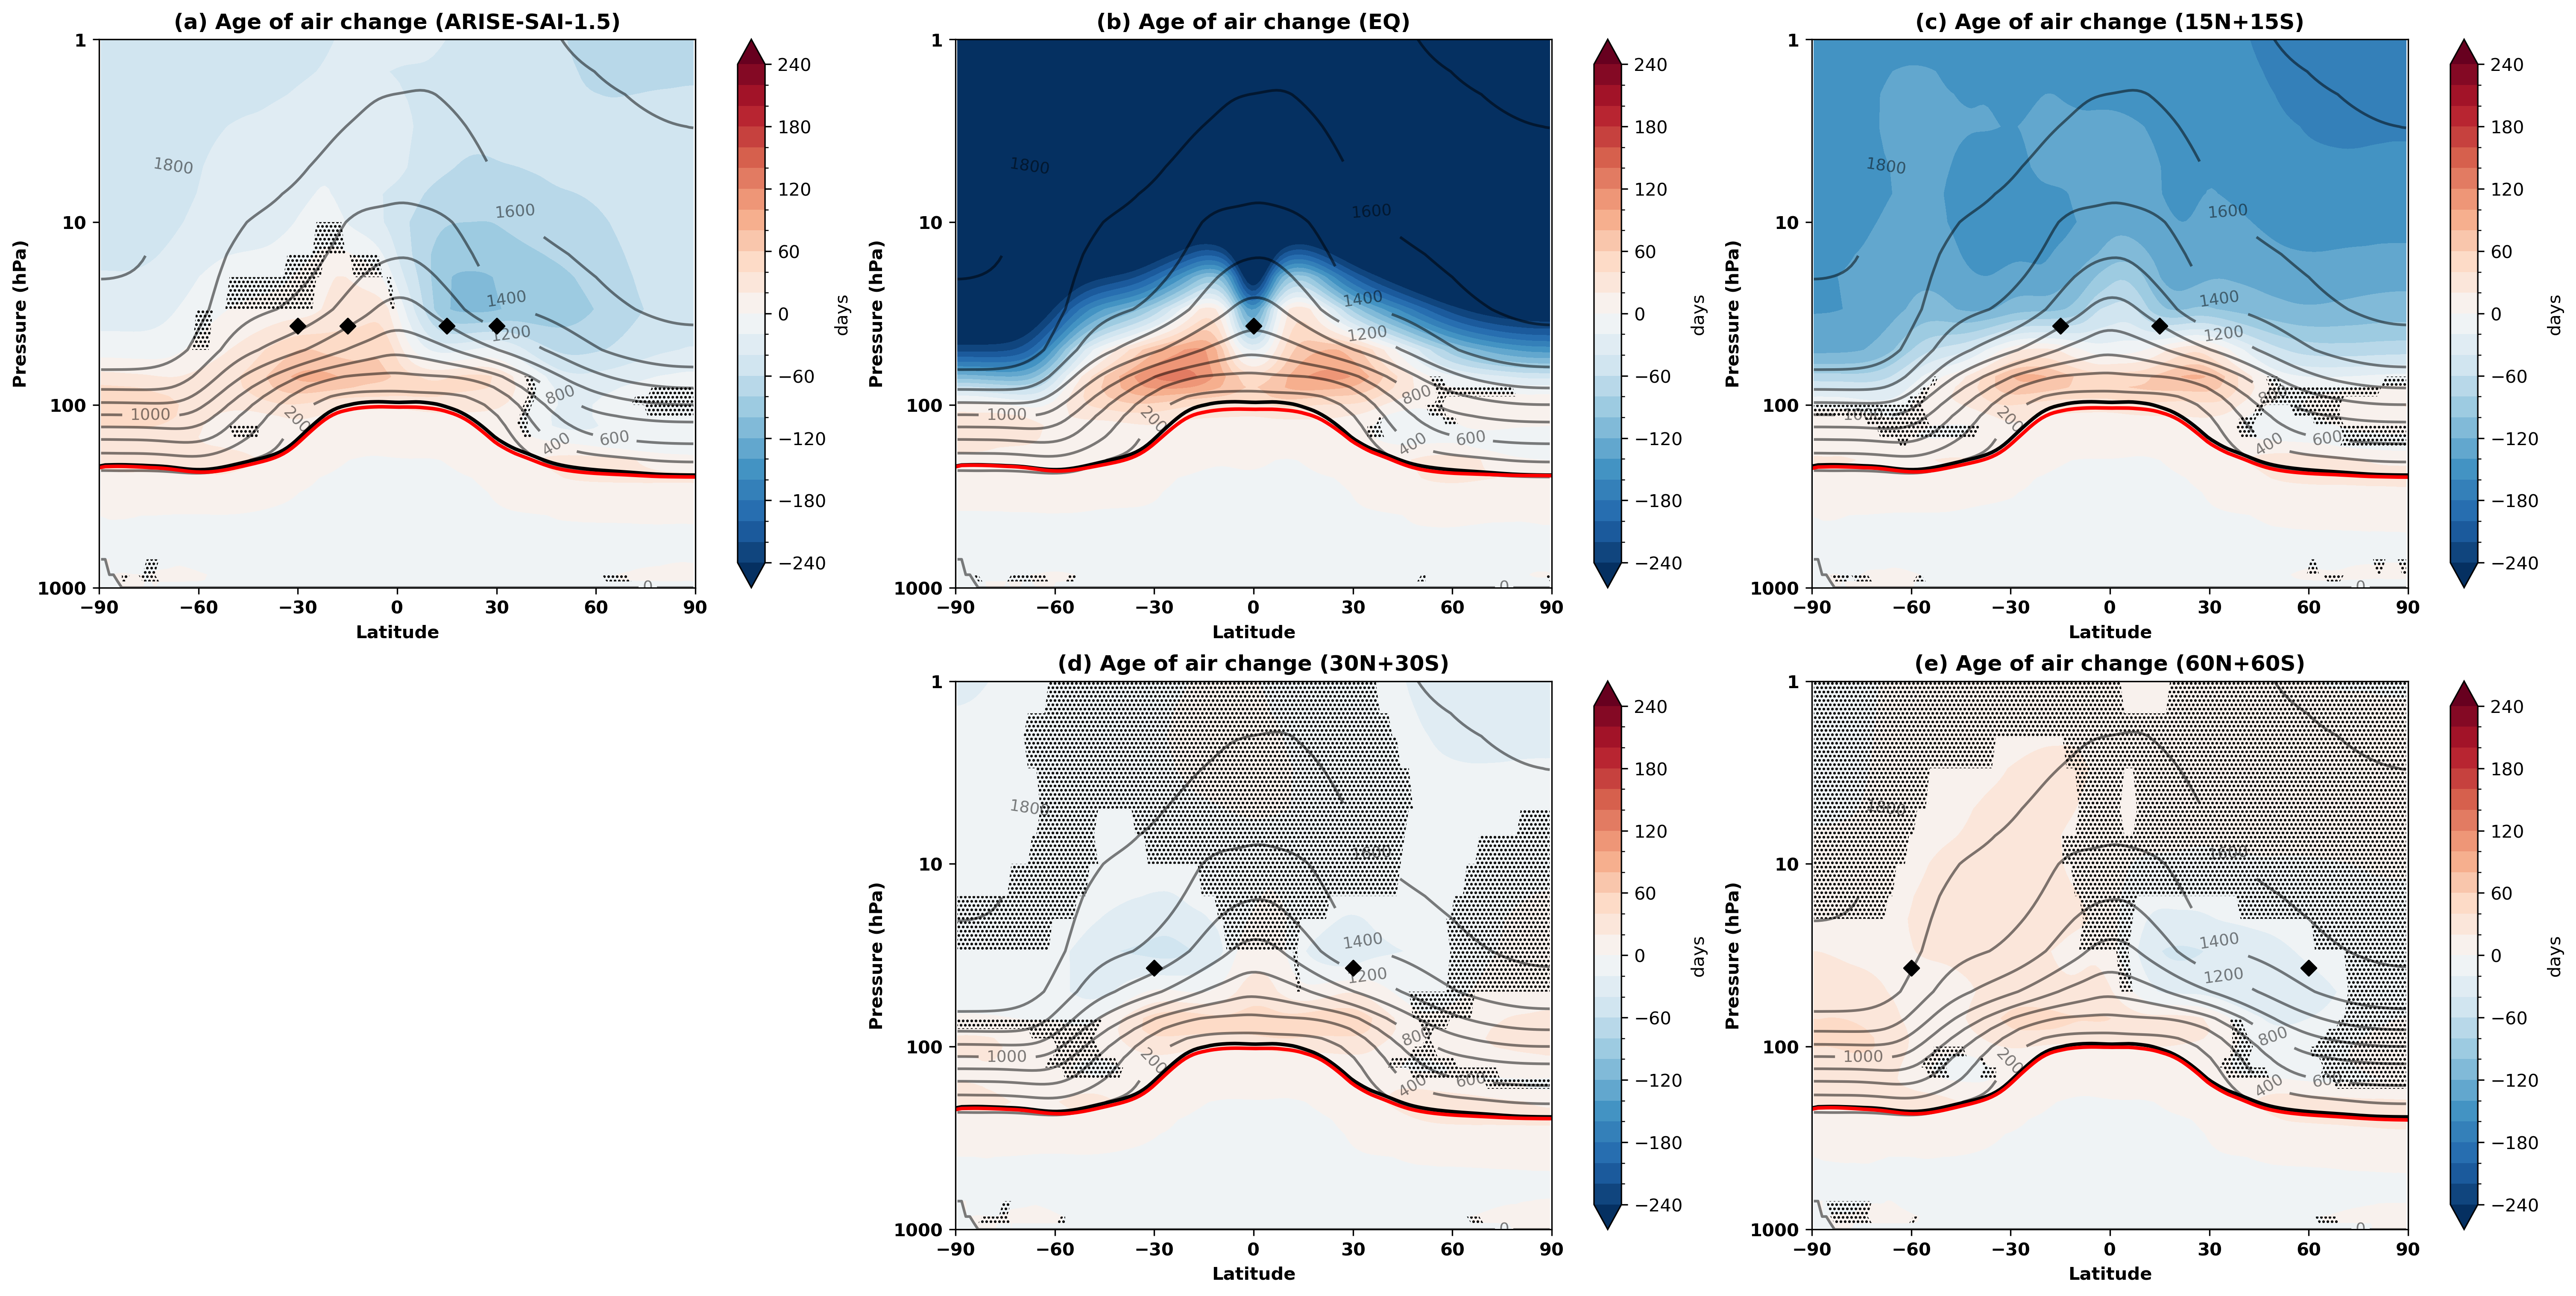

In [31]:
col_levels=np.linspace(-240,240,25)

base_data = ageofair_SSP.sel(time=slice('2050','2069')).mean(('time'))/3600/24

fig= plt.figure(constrained_layout=True,figsize=(20,10),dpi=300)
ax1 = fig.add_subplot(2,3, 1)
future_data = ageofair_ARISE.sel(time=slice('2050','2069')).mean(('time'))/3600/24
(future_data-base_data).plot.contourf(levels=col_levels,cmap='RdBu_r',extend = "both",cbar_kwargs={"label":"days"})
cs = base_data.plot.contour(colors='k',y='pressure',levels=np.linspace(0,2000,11),alpha=0.5)
(trop_SSP/100).sel(time=slice('2050','2069')).mean('time').plot(c='k',lw=2)
(trop_ARISE/100).sel(time=slice('2050','2069')).mean('time').plot(c='r',lw=2)
plt.clabel(cs, fontsize=9, inline=True)
plt.scatter([-30,-15,15,30],[37,37,37,37],marker='D',c='k')
pval_ARISE.where(pval_ARISE>0.05).plot.contourf(levels=[0,1], colors='none', hatches=['.....'],add_colorbar=False)
plt.yscale('log')
plt.ylim([1000,1])
plt.yticks([1000,100,10,1],[1000,100,10,1],fontweight='bold')
plt.xlabel('Latitude',fontweight='bold')
plt.ylabel('Pressure (hPa)',fontweight='bold')
plt.xticks(np.linspace(-90,90,7),fontweight='bold')
plt.title('(a) Age of air change (ARISE-SAI-1.5)',fontweight='bold')
ax1.minorticks_off()

ax1 = fig.add_subplot(2,3, 2)
future_data = ageofair_0NS.sel(time=slice('2050','2069')).mean(('time'))/3600/24
(future_data-base_data).plot.contourf(levels=col_levels,cmap='RdBu_r',extend = "both",cbar_kwargs={"label":"days"})
cs = base_data.plot.contour(colors='k',y='pressure',levels=np.linspace(0,2000,11),alpha=0.5)
plt.clabel(cs, fontsize=9, inline=True)
(trop_SSP/100).sel(time=slice('2050','2069')).mean('time').plot(c='k',lw=2)
(trop_0NS/100).sel(time=slice('2050','2069')).mean('time').plot(c='r',lw=2)
plt.scatter([0],[37],marker='D',c='k')
pval_0NS.where(pval_0NS>0.05).plot.contourf(levels=[0,1], colors='none', hatches=['.....'],add_colorbar=False)
plt.yscale('log')
plt.ylim([1000,1])
plt.yticks([1000,100,10,1],[1000,100,10,1],fontweight='bold')
plt.xlabel('Latitude',fontweight='bold')
plt.ylabel('Pressure (hPa)',fontweight='bold')
plt.xticks(np.linspace(-90,90,7),fontweight='bold')
plt.title('(b) Age of air change (EQ)',fontweight='bold')
ax1.minorticks_off()

ax1 = fig.add_subplot(2,3, 3)
future_data = ageofair_15NS.sel(time=slice('2050','2069')).mean(('time'))/3600/24
(future_data-base_data).plot.contourf(levels=col_levels,cmap='RdBu_r',extend = "both",cbar_kwargs={"label":"days"})
cs = base_data.plot.contour(colors='k',y='pressure',levels=np.linspace(0,2000,11),alpha=0.5)
plt.clabel(cs, fontsize=9, inline=True)
(trop_SSP/100).sel(time=slice('2050','2069')).mean('time').plot(c='k',lw=2)
(trop_15NS/100).sel(time=slice('2050','2069')).mean('time').plot(c='r',lw=2)
plt.scatter([-15,15],[37,37],marker='D',c='k')
pval_15NS.where(pval_15NS>0.05).plot.contourf(levels=[0,1], colors='none', hatches=['.....'],add_colorbar=False)
plt.yscale('log')
plt.ylim([1000,1])
plt.yticks([1000,100,10,1],[1000,100,10,1],fontweight='bold')
plt.xlabel('Latitude',fontweight='bold')
plt.ylabel('Pressure (hPa)',fontweight='bold')
plt.xticks(np.linspace(-90,90,7),fontweight='bold')
plt.title('(c) Age of air change (15N+15S)',fontweight='bold')
ax1.minorticks_off()

ax1 = fig.add_subplot(2,3, 5)
future_data = ageofair_30NS.sel(time=slice('2050','2069')).mean(('time'))/3600/24
(future_data-base_data).plot.contourf(levels=col_levels,cmap='RdBu_r',extend = "both",cbar_kwargs={"label":"days"})
cs = base_data.plot.contour(colors='k',y='pressure',levels=np.linspace(0,2000,11),alpha=0.5)
(trop_SSP/100).sel(time=slice('2050','2069')).mean('time').plot(c='k',lw=2)
(trop_30NS/100).sel(time=slice('2050','2069')).mean('time').plot(c='r',lw=2)
plt.clabel(cs, fontsize=9, inline=True)
plt.scatter([-30,30],[37,37],marker='D',c='k')
pval_30NS.where(pval_30NS>0.05).plot.contourf(levels=[0,1], colors='none', hatches=['.....'],add_colorbar=False)
plt.yscale('log')
plt.ylim([1000,1])
plt.yticks([1000,100,10,1],[1000,100,10,1],fontweight='bold')
plt.xlabel('Latitude',fontweight='bold')
plt.ylabel('Pressure (hPa)',fontweight='bold')
plt.xticks(np.linspace(-90,90,7),fontweight='bold')
plt.title('(d) Age of air change (30N+30S)',fontweight='bold')
ax1.minorticks_off()

ax1 = fig.add_subplot(2,3, 6)
future_data = ageofair_60NS.sel(time=slice('2050','2069')).mean(('time'))/3600/24
(future_data-base_data).plot.contourf(levels=col_levels,cmap='RdBu_r',extend = "both",cbar_kwargs={"label":"days"})
cs = base_data.plot.contour(colors='k',y='pressure',levels=np.linspace(0,2000,11),alpha=0.5)
(trop_SSP/100).sel(time=slice('2050','2069')).mean('time').plot(c='k',lw=2)
(trop_60NS/100).sel(time=slice('2050','2069')).mean('time').plot(c='r',lw=2)
plt.clabel(cs, fontsize=9, inline=True)
plt.scatter([-60,60],[37,37],marker='D',c='k')
pval_60NS.where(pval_60NS>0.05).plot.contourf(levels=[0,1], colors='none', hatches=['.....'],add_colorbar=False)
plt.yscale('log')
plt.ylim([1000,1])
plt.yticks([1000,100,10,1],[1000,100,10,1],fontweight='bold')
plt.xlabel('Latitude',fontweight='bold')
plt.ylabel('Pressure (hPa)',fontweight='bold')
plt.xticks(np.linspace(-90,90,7),fontweight='bold')
plt.title('(e) Age of air change (60N+60S)',fontweight='bold')
ax1.minorticks_off()
# plt.tight_layout()
plt.savefig('/data/users/mhenry/figs/fig_SAI_5.pdf',bbox_inches='tight')
plt.show()

In [32]:
ukesm_ssp_o3_1 = xr.open_dataarray('/data/users/mhenry/SSP245/proc_data/ukesm_ssp245_O3_u-be537.nc')*(1e6/1.657)
ukesm_ssp_o3_2 = xr.open_dataarray('/data/users/mhenry/SSP245/proc_data/ukesm_ssp_o3_u-be606.nc')*(1e6/1.657)
ukesm_ssp_o3_3 = xr.open_dataarray('/data/users/mhenry/SSP245/proc_data/ukesm_ssp_o3_u-be683.nc')*(1e6/1.657)
ukesm_ssp_o3_4 = xr.open_dataarray('/data/users/mhenry/SSP245/proc_data/ukesm_ssp_o3_u-be394.nc')*(1e6/1.657)
ukesm_ssp_o3_5 = xr.open_dataarray('/data/users/mhenry/SSP245/proc_data/ukesm_ssp_o3_u-be398.nc')*(1e6/1.657)
ukesm_ssp_o3_arr = [ukesm_ssp_o3_1,ukesm_ssp_o3_2,ukesm_ssp_o3_3,ukesm_ssp_o3_4,ukesm_ssp_o3_5]
ukesm_ssp_o3_ave = (ukesm_ssp_o3_1+ukesm_ssp_o3_2+ukesm_ssp_o3_3+ukesm_ssp_o3_4+ukesm_ssp_o3_5)/5

O3_ARISE_1 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_O3_u-cl322.nc')*(1e6/1.657)
O3_ARISE_2 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_o3_u-cl458.nc')*(1e6/1.657)
O3_ARISE_3 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_o3_u-cl459.nc')*(1e6/1.657)
O3_ARISE_4 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_o3_u-cl460.nc')*(1e6/1.657)
O3_ARISE_5 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_o3_u-cl461.nc')*(1e6/1.657)
O3_ARISE = (O3_ARISE_1+O3_ARISE_2+O3_ARISE_3+O3_ARISE_4+O3_ARISE_5)/5

O3_30NS_1 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_O3_u-cr991.nc')*(1e6/1.657)
O3_30NS_2 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_o3_u-cs992.nc')*(1e6/1.657)
O3_30NS_3 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_o3_u-cs993.nc')*(1e6/1.657)
O3_30NS_4 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_o3_u-cs994.nc')*(1e6/1.657)
O3_30NS_5 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_o3_u-cs995.nc')*(1e6/1.657)
O3_30NS = (O3_30NS_1+O3_30NS_2+O3_30NS_3+O3_30NS_4+O3_30NS_5)/5

O3_0NS_1 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_o3_u-de029.nc').mean('longitude')*(1e6/1.657)
O3_0NS_2 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_o3_u-de034.nc').mean('longitude')*(1e6/1.657)
O3_0NS_3 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_O3_u-cy805.nc')*(1e6/1.657)
O3_0NS = (O3_0NS_1+O3_0NS_2+O3_0NS_3)/3

O3_15NS_1 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_O3_u-cu743.nc')*(1e6/1.657)
O3_15NS_2 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_o3_u-cy806.nc')*(1e6/1.657)
O3_15NS_3 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_o3_u-cy807.nc')*(1e6/1.657)
O3_15NS = (O3_15NS_1+O3_15NS_2+O3_15NS_3)/3

O3_60NS_1 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_O3_u-ct762.nc')*(1e6/1.657)
O3_60NS_2 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_o3_u-cy808.nc')*(1e6/1.657)
O3_60NS_3 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_o3_u-cy809.nc')*(1e6/1.657)
O3_60NS = (O3_60NS_1+O3_60NS_2+O3_60NS_3)/3

In [33]:
r_ssp = xr.concat([ukesm_ssp_o3_1.sel(time=slice("2050","2069")).groupby('time.year').mean('time'),
                   ukesm_ssp_o3_2.sel(time=slice("2050","2069")).groupby('time.year').mean('time'),
                   ukesm_ssp_o3_3.sel(time=slice("2050","2069")).groupby('time.year').mean('time'),
                   ukesm_ssp_o3_4.sel(time=slice("2050","2069")).groupby('time.year').mean('time'),
                   ukesm_ssp_o3_5.sel(time=slice("2050","2069")).groupby('time.year').mean('time')
                  ],dim='year')

r_ARISE = xr.concat([O3_ARISE_1.sel(time=slice("2050","2069")).groupby('time.year').mean('time'),
                     O3_ARISE_2.sel(time=slice("2050","2069")).groupby('time.year').mean('time'),
                     O3_ARISE_3.sel(time=slice("2050","2069")).groupby('time.year').mean('time'),
                     O3_ARISE_4.sel(time=slice("2050","2069")).groupby('time.year').mean('time'),
                     O3_ARISE_5.sel(time=slice("2050","2069")).groupby('time.year').mean('time')]
                    ,dim='year')

r_30NS = xr.concat([O3_30NS_1.sel(time=slice("2050","2069")).groupby('time.year').mean('time'),
                    O3_30NS_2.sel(time=slice("2050","2069")).groupby('time.year').mean('time'),
                    O3_30NS_3.sel(time=slice("2050","2069")).groupby('time.year').mean('time'),
                    O3_30NS_4.sel(time=slice("2050","2069")).groupby('time.year').mean('time'),
                    O3_30NS_5.sel(time=slice("2050","2069")).groupby('time.year').mean('time')]
                    ,dim='year')

r_0NS = xr.concat([O3_0NS_1.sel(time=slice("2050","2069")).groupby('time.year').mean('time'),
                   O3_0NS_2.sel(time=slice("2050","2069")).groupby('time.year').mean(('time')),
                   O3_0NS_3.sel(time=slice("2050","2069")).groupby('time.year').mean(('time'))]
                   ,dim='year')

r_15NS = xr.concat([O3_15NS_1.sel(time=slice("2050","2069")).groupby('time.year').mean('time'),
                   O3_15NS_2.sel(time=slice("2050","2069")).groupby('time.year').mean('time'),
                   O3_15NS_3.sel(time=slice("2050","2069")).groupby('time.year').mean('time')]
                   ,dim='year')

r_60NS = xr.concat([O3_60NS_1.sel(time=slice("2050","2069")).groupby('time.year').mean('time'),
                   O3_60NS_2.sel(time=slice("2050","2069")).groupby('time.year').mean('time'),
                   O3_60NS_3.sel(time=slice("2050","2069")).groupby('time.year').mean('time')]
                   ,dim='year')

In [34]:
stat, pval = stats.ttest_ind(r_ssp, r_ARISE)
pval_ARISE = xr.DataArray(
    data=pval,
    dims=["level_height","lat"],
    coords=dict(
        level_height=(["level_height"],r_ssp.level_height.values),
        lat=(["lat"], r_ssp.latitude.values),
    ),
)

stat, pval = stats.ttest_ind(r_ssp, r_0NS)
pval_0NS = xr.DataArray(
    data=pval,
    dims=["level_height","lat"],
    coords=dict(
        level_height=(["level_height"],r_ssp.level_height.values),
        lat=(["lat"], r_ssp.latitude.values),
    ),
)

stat, pval = stats.ttest_ind(r_ssp, r_15NS)
pval_15NS = xr.DataArray(
    data=pval,
    dims=["level_height","lat"],
    coords=dict(
        level_height=(["level_height"],r_ssp.level_height.values),
        lat=(["lat"], r_ssp.latitude.values),
    ),
)

stat, pval = stats.ttest_ind(r_ssp, r_30NS)
pval_30NS = xr.DataArray(
    data=pval,
    dims=["level_height","lat"],
    coords=dict(
        level_height=(["level_height"],r_ssp.level_height.values),
        lat=(["lat"], r_ssp.latitude.values),
    ),
)

stat, pval = stats.ttest_ind(r_ssp, r_60NS)
pval_60NS = xr.DataArray(
    data=pval,
    dims=["level_height","lat"],
    coords=dict(
        level_height=(["level_height"],r_ssp.level_height.values),
        lat=(["lat"], r_ssp.latitude.values),
    ),
)

In [35]:
o3du_SSP_1 = xr.open_dataarray('/data/users/mhenry/SSP245/proc_data/ukesm_arise_o3du_u-be394.nc')
o3du_SSP_2 = xr.open_dataarray('/data/users/mhenry/SSP245/proc_data/ukesm_arise_o3du_u-be398.nc')
o3du_SSP_3 = xr.open_dataarray('/data/users/mhenry/SSP245/proc_data/ukesm_arise_o3du_u-be537.nc')
o3du_SSP_4 = xr.open_dataarray('/data/users/mhenry/SSP245/proc_data/ukesm_arise_o3du_u-be606.nc')
o3du_SSP_5 = xr.open_dataarray('/data/users/mhenry/SSP245/proc_data/ukesm_arise_o3du_u-be683.nc')
o3du_SSP = (o3du_SSP_1+o3du_SSP_2+o3du_SSP_3+o3du_SSP_4+o3du_SSP_5)/5
o3du_ARISE_1 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_o3du_u-cl322.nc')
o3du_ARISE_2 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_o3du_u-cl458.nc')
o3du_ARISE_3 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_o3du_u-cl459.nc')
o3du_ARISE_4 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_o3du_u-cl460.nc')
o3du_ARISE_5 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_o3du_u-cl461.nc')
o3du_ARISE = (o3du_ARISE_1+o3du_ARISE_2+o3du_ARISE_3+o3du_ARISE_4+o3du_ARISE_5)/5
o3du_0NS_1 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_o3du_u-de029.nc')
o3du_0NS_2 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_o3du_u-de034.nc')
o3du_0NS_3 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_o3du_u-cy805.nc')
o3du_0NS = (o3du_0NS_1+o3du_0NS_2+o3du_0NS_3)/3
o3du_15NS_1 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_o3du_u-cu743.nc')
o3du_15NS_2 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_o3du_u-cy806.nc')
o3du_15NS_3 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_o3du_u-cy807.nc')
o3du_15NS = (o3du_15NS_1+o3du_15NS_2+o3du_15NS_3)/3
o3du_30NS_1 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_o3du_u-cr991.nc')
o3du_30NS_2 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_o3du_u-cs992.nc')
o3du_30NS_3 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_o3du_u-cs993.nc')
o3du_30NS_4 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_o3du_u-cs994.nc')
o3du_30NS_5 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_o3du_u-cs995.nc')
o3du_30NS = (o3du_30NS_1+o3du_30NS_2+o3du_30NS_3+o3du_30NS_4+o3du_30NS_5)/5
o3du_60NS_1 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_o3du_u-ct762.nc')
o3du_60NS_2 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_o3du_u-cy808.nc')
o3du_60NS_3 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_o3du_u-cy809.nc')
o3du_60NS = (o3du_60NS_1+o3du_60NS_2+o3du_60NS_3)/3

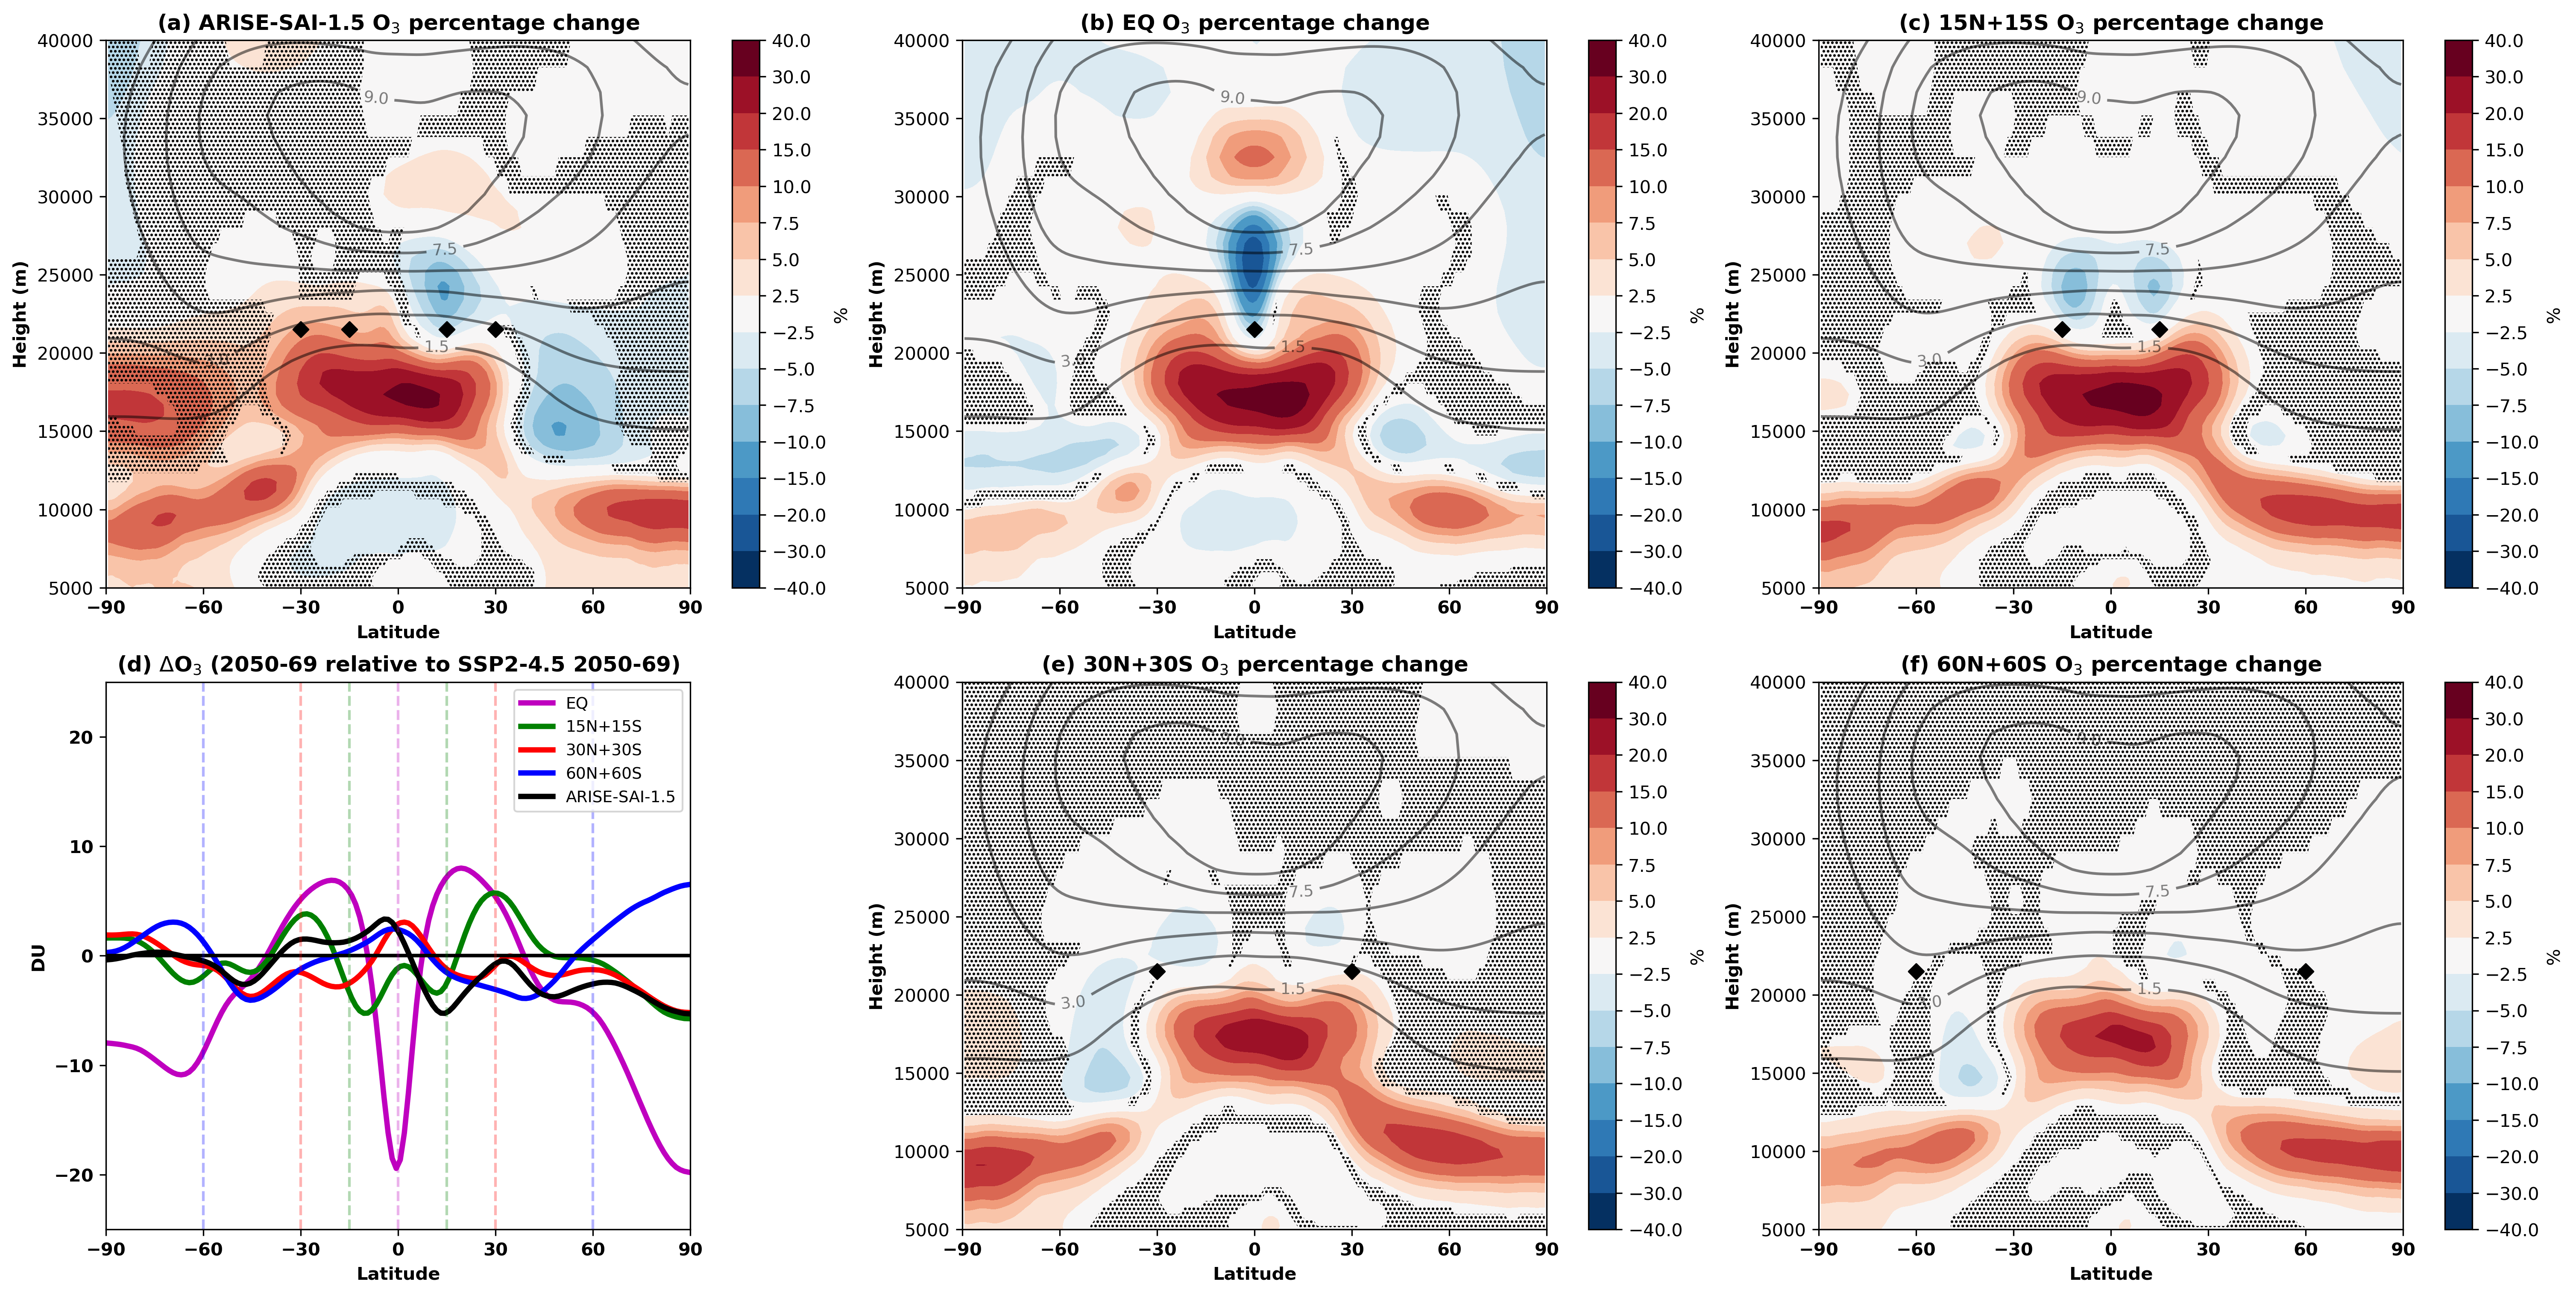

In [41]:
col_levels=[-40,-30,-20,-15,-10,-7.5,-5,-2.5,2.5,5,7.5,10,15,20,30,40]

base_data = (ukesm_ssp_o3_ave.sel(time=slice('2050','2069')).mean('time'))

fig= plt.figure(constrained_layout=True,figsize=(20,10),dpi=300)
ax1 = fig.add_subplot(2,3, 1)
future_data = (O3_ARISE.sel(time=slice('2050','2069')).mean('time'))
((future_data-base_data)/base_data*100).plot.contourf(y='level_height',cmap='RdBu_r',levels=col_levels,cbar_kwargs={"label":"%","extend":"neither",
    "ticks":col_levels})
cs = base_data.plot.contour(colors='k',y='level_height',levels=8,alpha=0.5)
plt.clabel(cs, fontsize=9, inline=True)
plt.scatter([-30,-15,15,30],[21500,21500,21500,21500],marker='D',c='k')
pval_ARISE.where(pval_ARISE>0.05).plot.contourf(levels=[0,1], colors='none', hatches=['.....'],add_colorbar=False)
# plt.yscale('log')
plt.ylim([5000,40000])
plt.xlabel('Latitude',fontweight='bold')
plt.ylabel('Height (m)',fontweight='bold')
# plt.yticks([10000,20000,30000,40000,50000],[10,20,30,40,50],fontweight='bold')
plt.xticks(np.linspace(-90,90,7),fontweight='bold')
plt.title('(a) ARISE-SAI-1.5 O$_3$ percentage change',fontweight='bold')
ax1.minorticks_off()

ax1 = fig.add_subplot(2,3, 2)
future_data = O3_0NS.sel(time=slice('2050','2069')).mean('time')
((future_data-base_data)/base_data*100).plot.contourf(y='level_height',cmap='RdBu_r',levels=col_levels,cbar_kwargs={"label":"%","extend":"neither",
    "ticks":col_levels})
cs = base_data.plot.contour(colors='k',y='level_height',levels=8,alpha=0.5)
plt.clabel(cs, fontsize=9, inline=True)
plt.scatter([0],[21500],marker='D',c='k')
pval_0NS.where(pval_0NS>0.05).plot.contourf(levels=[0,1], colors='none', hatches=['.....'],add_colorbar=False)
# plt.yscale('log')
plt.ylim([5000,40000])
plt.xlabel('Latitude',fontweight='bold')
plt.ylabel('Height (m)',fontweight='bold')
# plt.yticks([10000,20000,30000,40000,50000],[10,20,30,40,50],fontweight='bold')
plt.xticks(np.linspace(-90,90,7),fontweight='bold')
plt.title('(b) EQ O$_3$ percentage change',fontweight='bold')
ax1.minorticks_off()

ax1 = fig.add_subplot(2,3, 3)
future_data = O3_15NS.sel(time=slice('2050','2069')).mean('time')
((future_data-base_data)/base_data*100).plot.contourf(y='level_height',cmap='RdBu_r',levels=col_levels,cbar_kwargs={"label":"%","extend":"neither",
    "ticks":col_levels})
cs = base_data.plot.contour(colors='k',y='level_height',levels=8,alpha=0.5)
plt.clabel(cs, fontsize=9, inline=True)
plt.scatter([-15,15],[21500,21500],marker='D',c='k')
pval_15NS.where(pval_15NS>0.05).plot.contourf(levels=[0,1], colors='none', hatches=['.....'],add_colorbar=False)
# plt.yscale('log')
plt.ylim([5000,40000])
plt.xlabel('Latitude',fontweight='bold')
plt.ylabel('Height (m)',fontweight='bold')
# plt.yticks([10000,20000,30000,40000,50000],[10,20,30,40,50],fontweight='bold')
plt.xticks(np.linspace(-90,90,7),fontweight='bold')
plt.title('(c) 15N+15S O$_3$ percentage change',fontweight='bold')
ax1.minorticks_off()

ax1 = fig.add_subplot(2,3, 4)
base_data = o3du_SSP.isel(model_level_number=0).sel(time=slice('2050','2069')).mean('time')
future_data = o3du_0NS.isel(model_level_number=0).sel(time=slice('2050','2069')).mean('time')
(future_data-base_data).plot(lw=3,c='m', label='EQ')
future_data = o3du_15NS.isel(model_level_number=0).sel(time=slice('2050','2069')).mean('time')
(future_data-base_data).plot(lw=3,c='g', label='15N+15S')
future_data = o3du_30NS.isel(model_level_number=0).sel(time=slice('2050','2069')).mean('time')
(future_data-base_data).plot(lw=3,c='r', label='30N+30S')
future_data = o3du_60NS.isel(model_level_number=0).sel(time=slice('2050','2069')).mean('time')
(future_data-base_data).plot(lw=3,c='b', label='60N+60S')
future_data = o3du_ARISE.isel(model_level_number=0).sel(time=slice('2050','2069')).mean('time')
(future_data-base_data).plot(lw=3,c='k', label='ARISE-SAI-1.5')
# future_data = o3du_SSP.isel(model_level_number=0).mean('longitude').sel(time=slice('2050','2069')).mean('time')
# (future_data-base_data).plot(lw=3,c='orange', label='SSP2-4.5')
plt.axhline(y=0,c='k',lw=2)
plt.axvline(x=0,c='m',ls='--',alpha=0.3)
plt.axvline(x=15,c='g',ls='--',alpha=0.3)
plt.axvline(x=-15,c='g',ls='--',alpha=0.3)
plt.axvline(x=30,c='r',ls='--',alpha=0.3)
plt.axvline(x=-30,c='r',ls='--',alpha=0.3)
plt.axvline(x=60,c='b',ls='--',alpha=0.3)
plt.axvline(x=-60,c='b',ls='--',alpha=0.3)
plt.xlabel('Latitude',fontweight='bold')
plt.ylabel('DU',fontweight='bold')
plt.ylim([-25,25])
plt.xlim([-90,90])
plt.xticks(np.linspace(-90,90,7),fontweight='bold')
plt.yticks(fontweight='bold')
plt.title('(d) $\Delta$O$_3$ (2050-69 relative to SSP2-4.5 2050-69)',fontweight='bold')
plt.legend(fontsize=9)

ax1 = fig.add_subplot(2,3, 5)
base_data = (ukesm_ssp_o3_ave.sel(time=slice('2050','2069')).mean('time'))
future_data = O3_30NS.sel(time=slice('2050','2069')).mean('time')
((future_data-base_data)/base_data*100).plot.contourf(y='level_height',cmap='RdBu_r',levels=col_levels,cbar_kwargs={"label":"%","extend":"neither",
    "ticks":col_levels})
cs = base_data.plot.contour(colors='k',y='level_height',levels=8,alpha=0.5)
plt.clabel(cs, fontsize=9, inline=True)
pval_30NS.where(pval_30NS>0.05).plot.contourf(levels=[0,1], colors='none', hatches=['.....'],add_colorbar=False)
plt.scatter([-30,30],[21500,21500],marker='D',c='k')
# plt.yscale('log')
plt.ylim([5000,40000])
plt.xlabel('Latitude',fontweight='bold')
plt.ylabel('Height (m)',fontweight='bold')
# plt.yticks([10000,20000,30000,40000,50000],[10,20,30,40,50],fontweight='bold')
plt.xticks(np.linspace(-90,90,7),fontweight='bold')
plt.title('(e) 30N+30S O$_3$ percentage change',fontweight='bold')
ax1.minorticks_off()

ax1 = fig.add_subplot(2,3, 6)
future_data = O3_60NS.sel(time=slice('2050','2069')).mean('time')
((future_data-base_data)/base_data*100).plot.contourf(y='level_height',cmap='RdBu_r',levels=col_levels,cbar_kwargs={"label":"%","extend":"neither",
    "ticks":col_levels})
cs = base_data.plot.contour(colors='k',y='level_height',levels=8,alpha=0.5)
plt.clabel(cs, fontsize=9, inline=True)
plt.scatter([-60,60],[21500,21500],marker='D',c='k')
pval_60NS.where(pval_60NS>0.05).plot.contourf(levels=[0,1], colors='none', hatches=['.....'],add_colorbar=False)
# plt.yscale('log')
plt.ylim([5000,40000])
plt.xlabel('Latitude',fontweight='bold')
plt.ylabel('Height (m)',fontweight='bold')
# plt.yticks([10000,20000,30000,40000,50000],[10,20,30,40,50],fontweight='bold')
plt.xticks(np.linspace(-90,90,7),fontweight='bold')
plt.title('(f) 60N+60S O$_3$ percentage change',fontweight='bold')
ax1.minorticks_off()
# plt.tight_layout()
plt.savefig('/data/users/mhenry/figs/fig_SAI_6.pdf')
plt.show()

In [42]:
vp_SSP_1 = xr.open_dataarray('/data/users/mhenry/SSP245/proc_data/ukesm_arise_vpgrid_u-be394.nc')
vp_SSP_2 = xr.open_dataarray('/data/users/mhenry/SSP245/proc_data/ukesm_arise_vpgrid_u-be398.nc')
vp_SSP_3 = xr.open_dataarray('/data/users/mhenry/SSP245/proc_data/ukesm_arise_vpgrid_u-be537.nc')
vp_SSP_4 = xr.open_dataarray('/data/users/mhenry/SSP245/proc_data/ukesm_arise_vpgrid_u-be606.nc')
vp_SSP_5 = xr.open_dataarray('/data/users/mhenry/SSP245/proc_data/ukesm_arise_vpgrid_u-be683.nc')
vp_SSP = (vp_SSP_1+vp_SSP_2+vp_SSP_3+vp_SSP_4+vp_SSP_5)/5
vp_ARISE_1 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_vpgrid_u-cl322.nc')
vp_ARISE_2 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_vpgrid_u-cl458.nc')
vp_ARISE_3 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_vpgrid_u-cl459.nc')
vp_ARISE_4 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_vpgrid_u-cl460.nc')
vp_ARISE_5 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_vpgrid_u-cl461.nc')
vp_ARISE = (vp_ARISE_1+vp_ARISE_2+vp_ARISE_3+vp_ARISE_4+vp_ARISE_5)/5
vp_30NS_1 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_vpgrid_u-cr991.nc')
vp_30NS_2 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_vpgrid_u-cs992.nc')
vp_30NS_3 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_vpgrid_u-cs993.nc')
vp_30NS_4 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_vpgrid_u-cs994.nc')
vp_30NS_5 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_vpgrid_u-cs995.nc')
vp_30NS = (vp_30NS_1+vp_30NS_2+vp_30NS_3+vp_30NS_4+vp_30NS_5)/5
vp_0NS_1 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_vpgrid_u-de029.nc')
vp_0NS_2 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_vpgrid_u-de034.nc')
vp_0NS_3 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_vpgrid_u-cy805.nc')
vp_0NS = (vp_0NS_1+vp_0NS_2+vp_0NS_3)/3
vp_15NS_1 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_vpgrid_u-cu743.nc')
vp_15NS_2 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_vpgrid_u-cy806.nc')
vp_15NS_3 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_vpgrid_u-cy807.nc')
vp_15NS = (vp_15NS_1+vp_15NS_2+vp_15NS_3)/3
vp_60NS_1 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_vpgrid_u-ct762.nc')
vp_60NS_2 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_vpgrid_u-cy808.nc')
vp_60NS_3 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_vpgrid_u-cy809.nc')
vp_60NS = (vp_60NS_1+vp_60NS_2+vp_60NS_3)/3

In [43]:
def stream_function(da):
    a = 6378000  # m
    g = 9.8  # m/s2
    lat_rad = np.deg2rad(da['latitude'])
    c = 2 * np.pi * a * np.cos(lat_rad)
    # Create weighting
    p = da['pressure']
    dp = p.copy(data=np.diff(p, axis=p.get_axis_num("pressure"), prepend=0))
    da_dp = da * dp
    # integrate and calculate stream function
    integral = da_dp.cumsum(dim='pressure') * 1e2
    new_da = (c / g) * integral * 1e-10
    return new_da

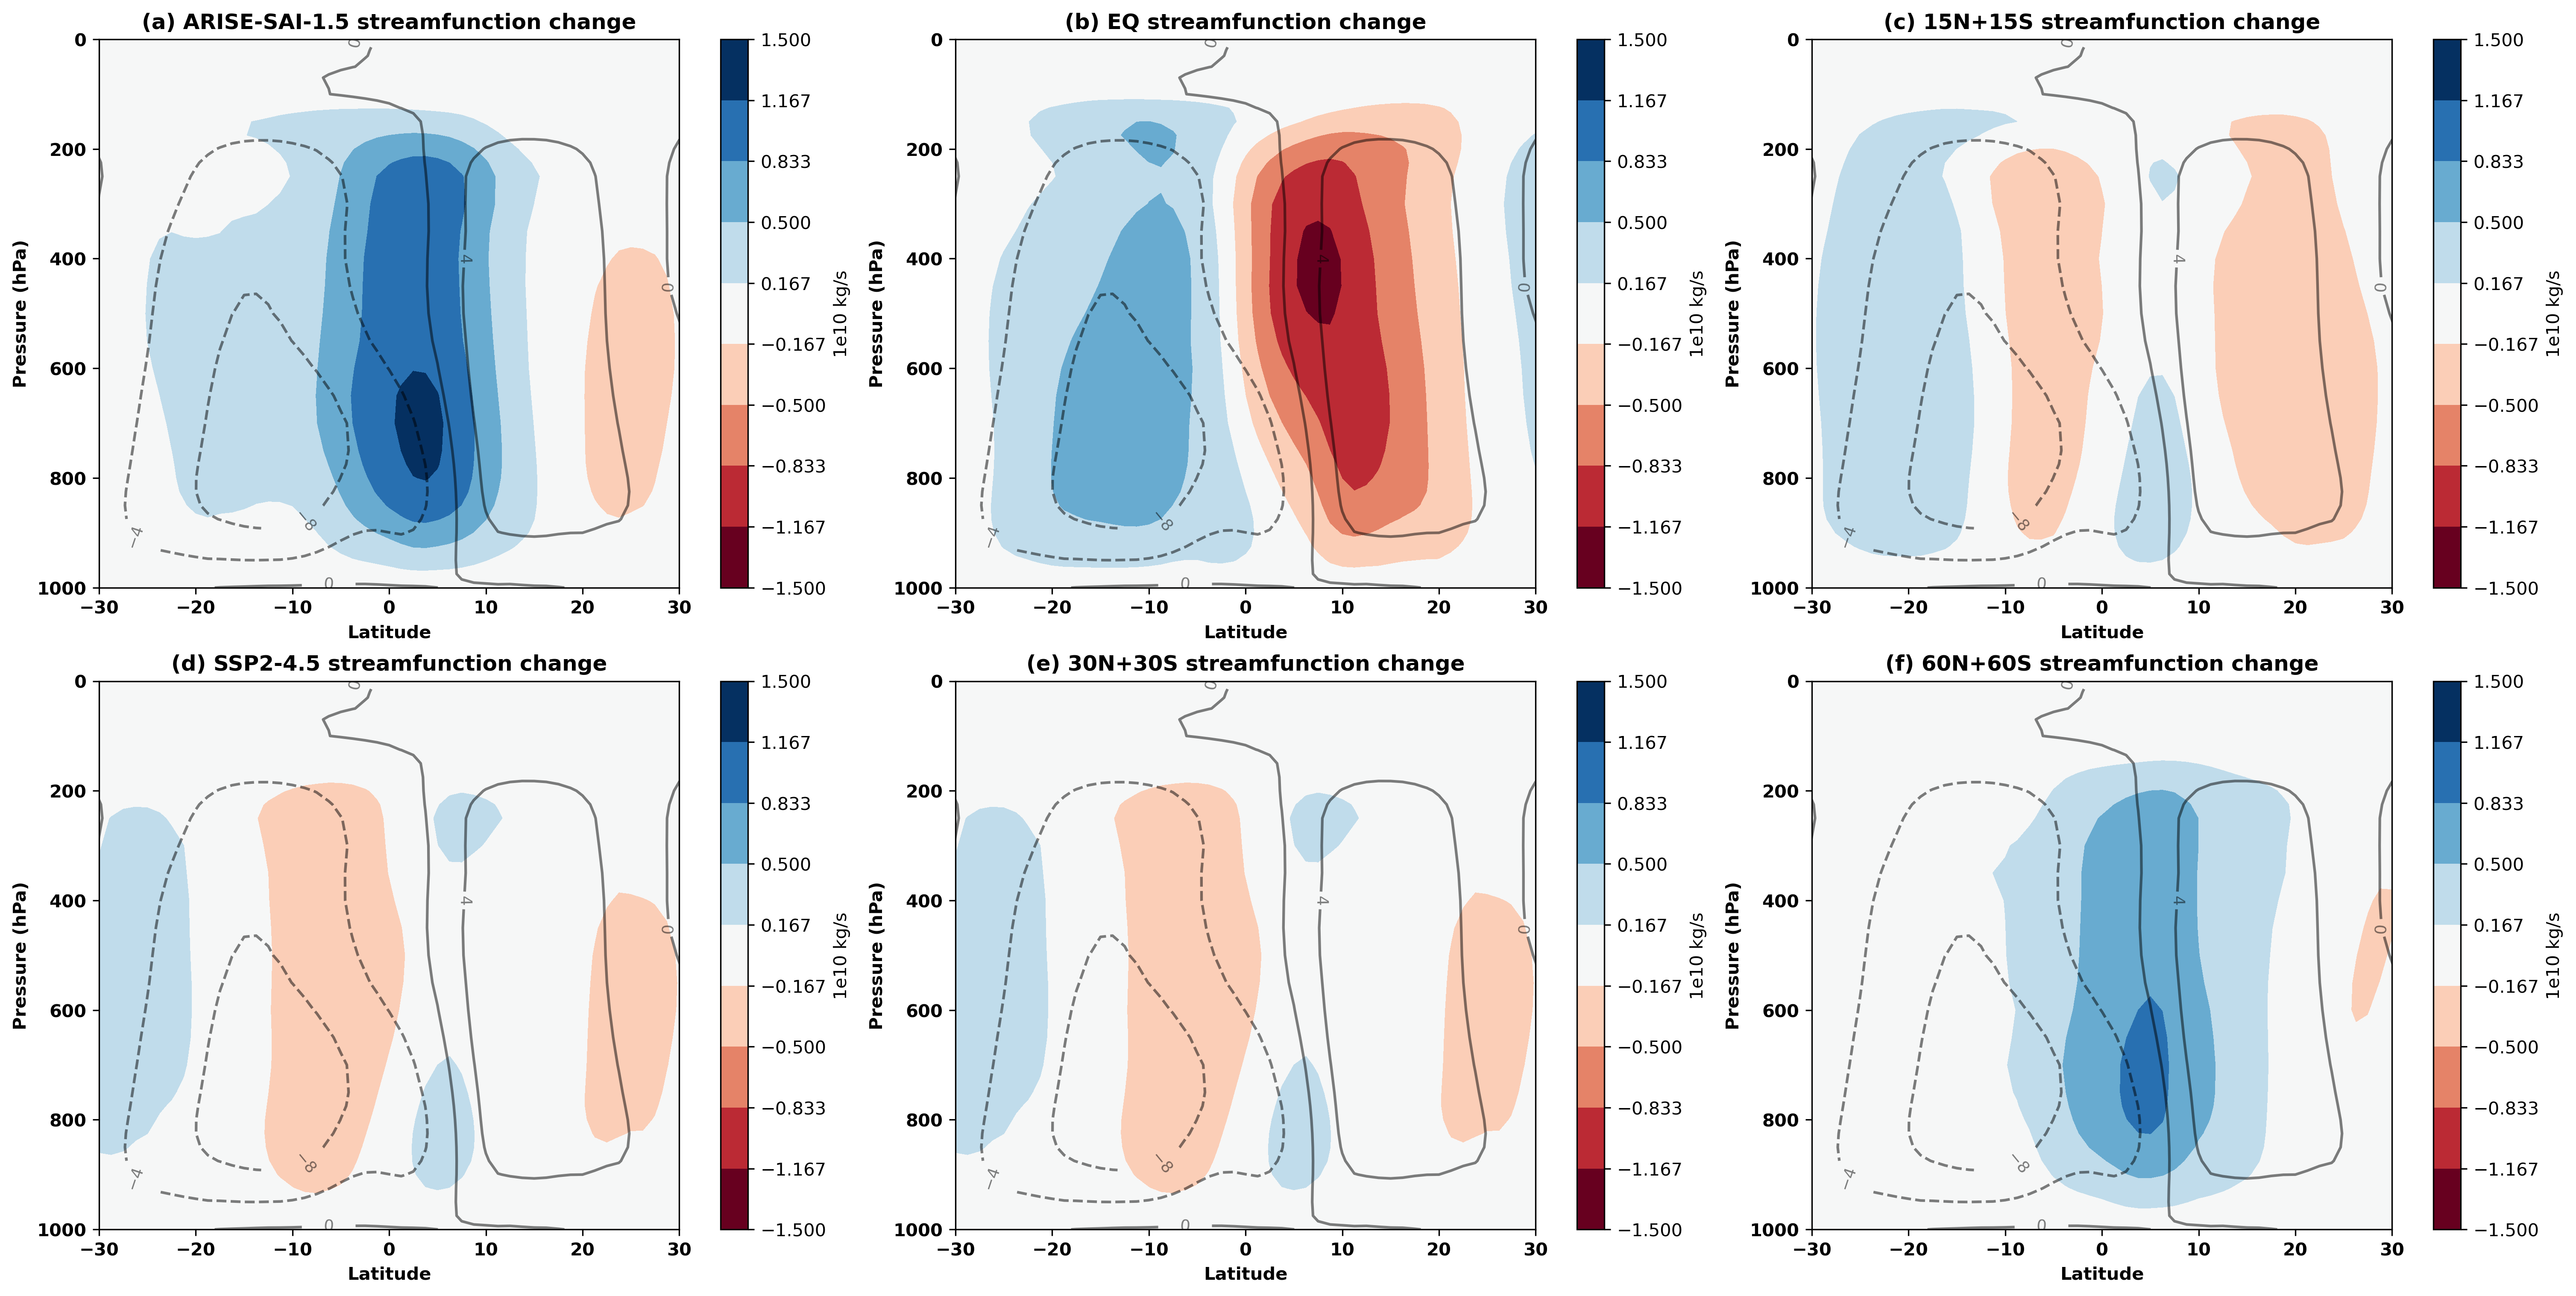

In [44]:
base_data = stream_function(vp_SSP.mean('longitude').sel(time=slice('2014','2033')).mean('time'))

fig= plt.figure(constrained_layout=True,figsize=(20,10),dpi=300)
ax1 = fig.add_subplot(2,3, 1)
future_data = stream_function(vp_ARISE.mean('longitude').sel(time=slice('2050','2069')).mean('time'))
((future_data-base_data)).sel(latitude=slice(-30,30)).plot.contourf(y='pressure',vmin=-1.5,vmax=1.5,levels=10,cmap='RdBu',cbar_kwargs={"label":"1e10 kg/s"})
cs = base_data.plot.contour(colors='k',y='pressure',alpha=0.5)
plt.clabel(cs, fontsize=9, inline=True)
plt.ylim([1000,0])
plt.xlim([-30,30])
plt.xlabel('Latitude',fontweight='bold')
plt.ylabel('Pressure (hPa)',fontweight='bold')
plt.yticks(fontweight='bold')
plt.xticks(np.linspace(-30,30,7),fontweight='bold')
plt.title('(a) ARISE-SAI-1.5 streamfunction change',fontweight='bold')
ax1.minorticks_off()
ax1 = fig.add_subplot(2,3, 2)
future_data = stream_function(vp_0NS.mean('longitude').sel(time=slice('2050','2069')).mean('time'))
((future_data-base_data)).sel(latitude=slice(-30,30)).plot.contourf(y='pressure',vmin=-1.5,vmax=1.5,levels=10,cmap='RdBu',cbar_kwargs={"label":"1e10 kg/s"})
cs = base_data.plot.contour(colors='k',y='pressure',alpha=0.5)
plt.clabel(cs, fontsize=9, inline=True)
plt.ylim([1000,0])
plt.xlim([-30,30])
plt.xlabel('Latitude',fontweight='bold')
plt.ylabel('Pressure (hPa)',fontweight='bold')
plt.yticks(fontweight='bold')
plt.xticks(np.linspace(-30,30,7),fontweight='bold')
plt.title('(b) EQ streamfunction change',fontweight='bold')
ax1.minorticks_off()
ax1 = fig.add_subplot(2,3, 3)
future_data = stream_function(vp_15NS.mean('longitude').sel(time=slice('2050','2069')).mean('time'))
((future_data-base_data)).sel(latitude=slice(-30,30)).plot.contourf(y='pressure',vmin=-1.5,vmax=1.5,levels=10,cmap='RdBu',cbar_kwargs={"label":"1e10 kg/s"})
cs = base_data.plot.contour(colors='k',y='pressure',alpha=0.5)
plt.clabel(cs, fontsize=9, inline=True)
plt.ylim([1000,0])
plt.xlim([-30,30])
plt.xlabel('Latitude',fontweight='bold')
plt.ylabel('Pressure (hPa)',fontweight='bold')
plt.yticks(fontweight='bold')
plt.xticks(np.linspace(-30,30,7),fontweight='bold')
plt.title('(c) 15N+15S streamfunction change',fontweight='bold')
ax1.minorticks_off()
ax1 = fig.add_subplot(2,3, 4)
future_data = stream_function(vp_30NS.mean('longitude').sel(time=slice('2050','2069')).mean('time'))
((future_data-base_data)).sel(latitude=slice(-30,30)).plot.contourf(y='pressure',vmin=-1.5,vmax=1.5,levels=10,cmap='RdBu',cbar_kwargs={"label":"1e10 kg/s"})
cs = base_data.plot.contour(colors='k',y='pressure',alpha=0.5)
plt.clabel(cs, fontsize=9, inline=True)
plt.ylim([1000,0])
plt.xlim([-30,30])
plt.xlabel('Latitude',fontweight='bold')
plt.ylabel('Pressure (hPa)',fontweight='bold')
plt.yticks(fontweight='bold')
plt.xticks(np.linspace(-30,30,7),fontweight='bold')
plt.title('(d) SSP2-4.5 streamfunction change',fontweight='bold')
ax1.minorticks_off()
ax1 = fig.add_subplot(2,3, 5)
future_data = stream_function(vp_30NS.mean('longitude').sel(time=slice('2050','2069')).mean('time'))
((future_data-base_data)).sel(latitude=slice(-30,30)).plot.contourf(y='pressure',vmin=-1.5,vmax=1.5,levels=10,cmap='RdBu',cbar_kwargs={"label":"1e10 kg/s"})
cs = base_data.plot.contour(colors='k',y='pressure',alpha=0.5)
plt.clabel(cs, fontsize=9, inline=True)
plt.ylim([1000,0])
plt.xlim([-30,30])
plt.xlabel('Latitude',fontweight='bold')
plt.ylabel('Pressure (hPa)',fontweight='bold')
plt.yticks(fontweight='bold')
plt.xticks(np.linspace(-30,30,7),fontweight='bold')
plt.title('(e) 30N+30S streamfunction change',fontweight='bold')
ax1.minorticks_off()
ax1 = fig.add_subplot(2,3, 6)
future_data = stream_function(vp_60NS.mean('longitude').sel(time=slice('2050','2069')).mean('time'))
((future_data-base_data)).sel(latitude=slice(-30,30)).plot.contourf(y='pressure',vmin=-1.5,vmax=1.5,levels=10,cmap='RdBu',cbar_kwargs={"label":"1e10 kg/s"})
cs = base_data.plot.contour(colors='k',y='pressure',alpha=0.5)
plt.clabel(cs, fontsize=9, inline=True)
plt.ylim([1000,0])
plt.xlabel('Latitude',fontweight='bold')
plt.ylabel('Pressure (hPa)',fontweight='bold')
plt.yticks(fontweight='bold')
plt.xticks(np.linspace(-30,30,7),fontweight='bold')
plt.xlim([-30,30])
plt.title('(f) 60N+60S streamfunction change',fontweight='bold')
ax1.minorticks_off()
# plt.tight_layout()
plt.savefig('/data/users/mhenry/figs/fig_SAI_S1.pdf')
plt.show()

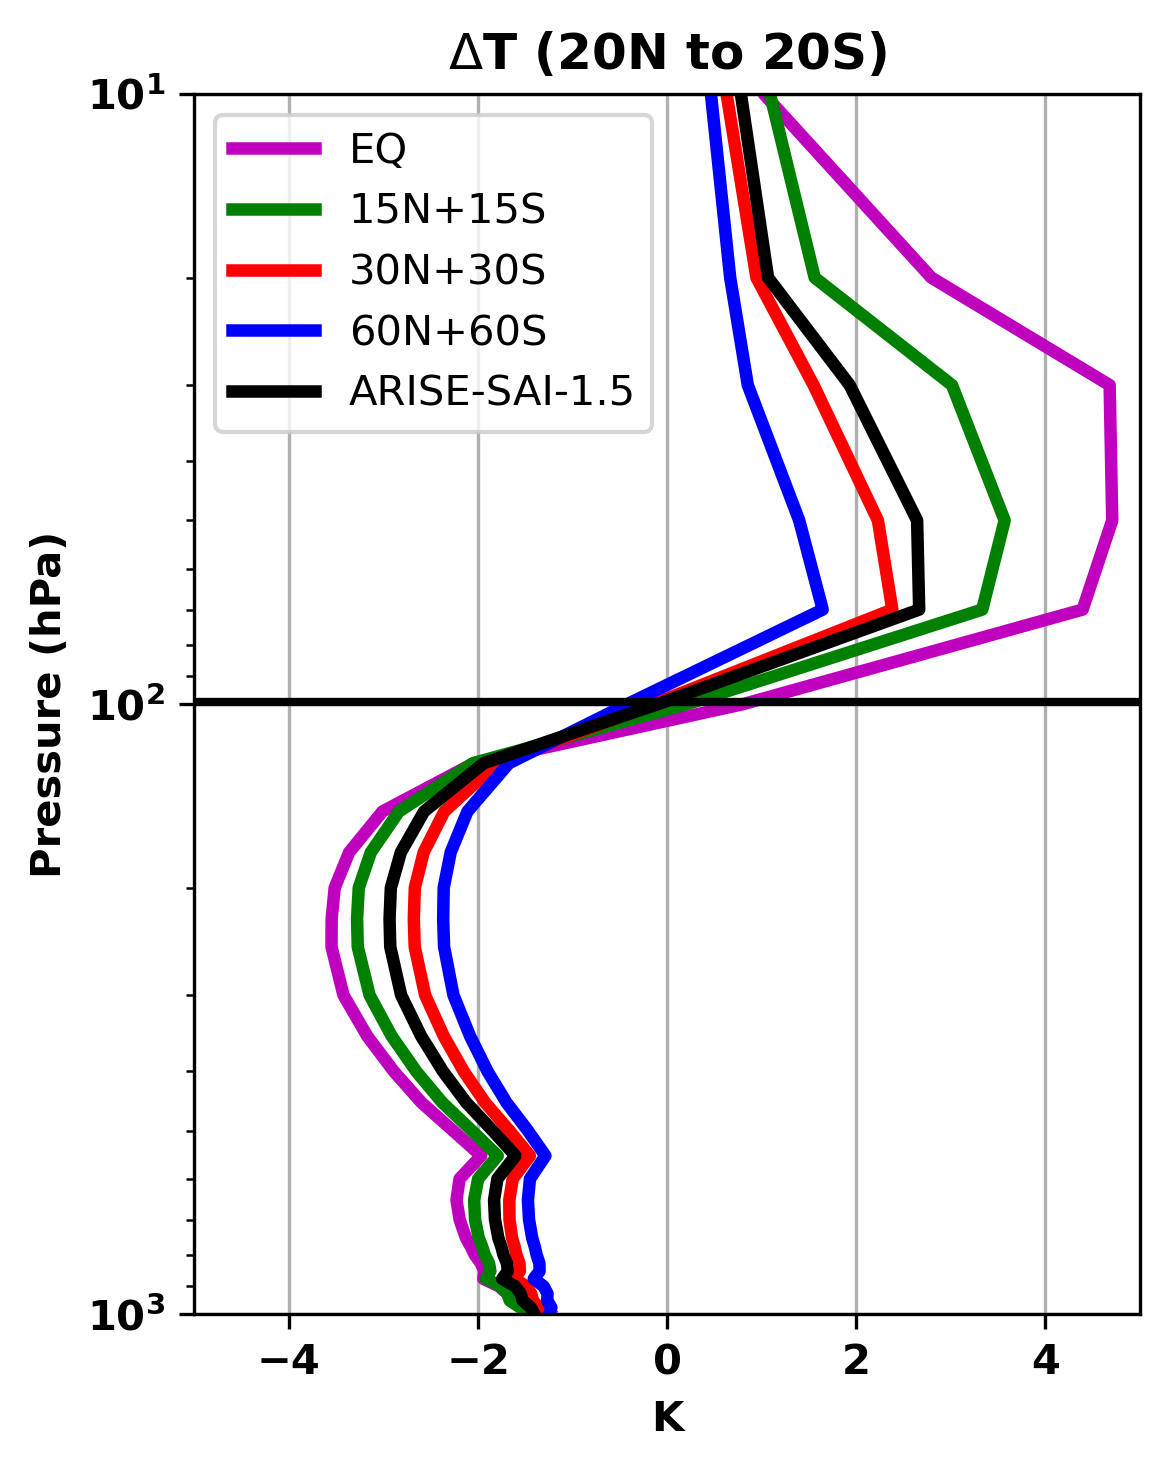

In [45]:
ta_SSP_1 = xr.open_dataarray('/data/users/mhenry/SSP245/proc_data/ukesm_arise_ta_u-be394_lon.nc')
ta_SSP_2 = xr.open_dataarray('/data/users/mhenry/SSP245/proc_data/ukesm_arise_ta_u-be398_lon.nc')
ta_SSP_3 = xr.open_dataarray('/data/users/mhenry/SSP245/proc_data/ukesm_arise_ta_u-be537_lon.nc')
ta_SSP_4 = xr.open_dataarray('/data/users/mhenry/SSP245/proc_data/ukesm_arise_ta_u-be606_lon.nc')
ta_SSP_5 = xr.open_dataarray('/data/users/mhenry/SSP245/proc_data/ukesm_arise_ta_u-be683_lon.nc')
ta_SSP = (ta_SSP_1+ta_SSP_2+ta_SSP_3+ta_SSP_4+ta_SSP_5)/5
ta_ARISE_1 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_ta_u-cl322_lon.nc')
ta_ARISE_2 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_ta_u-cl458_lon.nc')
ta_ARISE_3 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_ta_u-cl459_lon.nc')
ta_ARISE_4 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_ta_u-cl460_lon.nc')
ta_ARISE_5 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_ta_u-cl461_lon.nc')
ta_ARISE = (ta_ARISE_1+ta_ARISE_2+ta_ARISE_3+ta_ARISE_4+ta_ARISE_5)/5
ta_0NS_1 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_ta_u-de029.nc').mean('longitude')
ta_0NS_2 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_ta_u-de034.nc').mean('longitude')
ta_0NS_3 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_ta_u-cy805.nc').mean('longitude')
ta_0NS = (ta_0NS_1+ta_0NS_2+ta_0NS_3)/3
ta_15NS_1 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_ta_u-cu743_lon.nc')
ta_15NS_2 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_ta_u-cy806_lon.nc')
ta_15NS_3 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_ta_u-cy807_lon.nc')
ta_15NS = (ta_15NS_1+ta_15NS_2+ta_15NS_3)/3
ta_30NS_1 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_ta_u-cr991_lon.nc')
ta_30NS_2 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_ta_u-cs992_lon.nc')
ta_30NS_3 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_ta_u-cs993_lon.nc')
ta_30NS_4 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_ta_u-cs994_lon.nc')
ta_30NS_5 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_ta_u-cs995_lon.nc')
ta_30NS = (ta_30NS_1+ta_30NS_2+ta_30NS_3+ta_30NS_4+ta_30NS_5)/5
ta_60NS_1 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_ta_u-ct762_lon.nc')
ta_60NS_2 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_ta_u-cy808_lon.nc')
ta_60NS_3 = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_ta_u-cy809_lon.nc')
ta_60NS = (ta_60NS_1+ta_60NS_2+ta_60NS_3)/3

fig= plt.figure(figsize=(4,5),dpi=300)
(ta_0NS_1-ta_SSP).sel(time=slice('2050','2069')).sel(latitude=slice(-20,20)).weighted(weights_ukesm_arise).mean(('time',
    'latitude')).plot(y='pressure',lw=3,label='EQ',c='m')
(ta_15NS-ta_SSP).sel(time=slice('2050','2069')).sel(latitude=slice(-20,20)).weighted(weights_ukesm_arise).mean(('time',
    'latitude')).plot(y='pressure',lw=3,label='15N+15S',c='g')
(ta_30NS-ta_SSP).sel(time=slice('2050','2069')).sel(latitude=slice(-20,20)).weighted(weights_ukesm_arise).mean(('time',
    'latitude')).plot(y='pressure',lw=3,label='30N+30S',c='r')
(ta_60NS-ta_SSP).sel(time=slice('2050','2069')).sel(latitude=slice(-20,20)).weighted(weights_ukesm_arise).mean(('time',
    'latitude')).plot(y='pressure',lw=3,label='60N+60S',c='b')
(ta_ARISE-ta_SSP).sel(time=slice('2050','2069')).sel(latitude=slice(-20,20)).weighted(weights_ukesm_arise).mean(('time',
    'latitude')).plot(y='pressure',lw=3,label='ARISE-SAI-1.5',c='k')
plt.ylim([1000,10])
plt.xlim([-5,5])
plt.axhline(y=(trop_SSP/100).sel(time=slice('2050','2069')).sel(latitude=slice(-20,20)).weighted(weights_ukesm_arise).mean(('time','latitude')).values,c='k',lw=2)
plt.grid()
plt.yscale('log')
plt.legend()
plt.xlabel('K',fontweight='bold')
plt.ylabel('Pressure (hPa)',fontweight='bold')
plt.yticks(fontweight='bold')
plt.xticks(fontweight='bold')
plt.title('$\Delta$T (20N to 20S)',fontweight='bold')
plt.legend()
plt.tight_layout()
plt.savefig('/data/users/mhenry/figs/fig_SAI_S2.pdf')
plt.show()

In [46]:
print('EQ: ',(ta_0NS-ta_SSP).sel(time=slice('2050','2069')).sel(latitude=slice(-20,20)).weighted(weights_ukesm_arise).mean(('time','latitude'))\
      .sel(pressure=slice(30,60)).mean('pressure').values)
print('15NS: ',(ta_15NS-ta_SSP).sel(time=slice('2050','2069')).sel(latitude=slice(-20,20)).weighted(weights_ukesm_arise).mean(('time','latitude'))\
      .sel(pressure=slice(30,60)).mean('pressure').values)
print('30NS: ',(ta_30NS-ta_SSP).sel(time=slice('2050','2069')).sel(latitude=slice(-20,20)).weighted(weights_ukesm_arise).mean(('time','latitude'))\
      .sel(pressure=slice(30,60)).mean('pressure').values)
print('60NS: ',(ta_60NS-ta_SSP).sel(time=slice('2050','2069')).sel(latitude=slice(-20,20)).weighted(weights_ukesm_arise).mean(('time','latitude'))\
      .sel(pressure=slice(30,60)).mean('pressure').values)

EQ:  4.7870216
15NS:  3.2901125
30NS:  1.8879027
60NS:  1.1240112


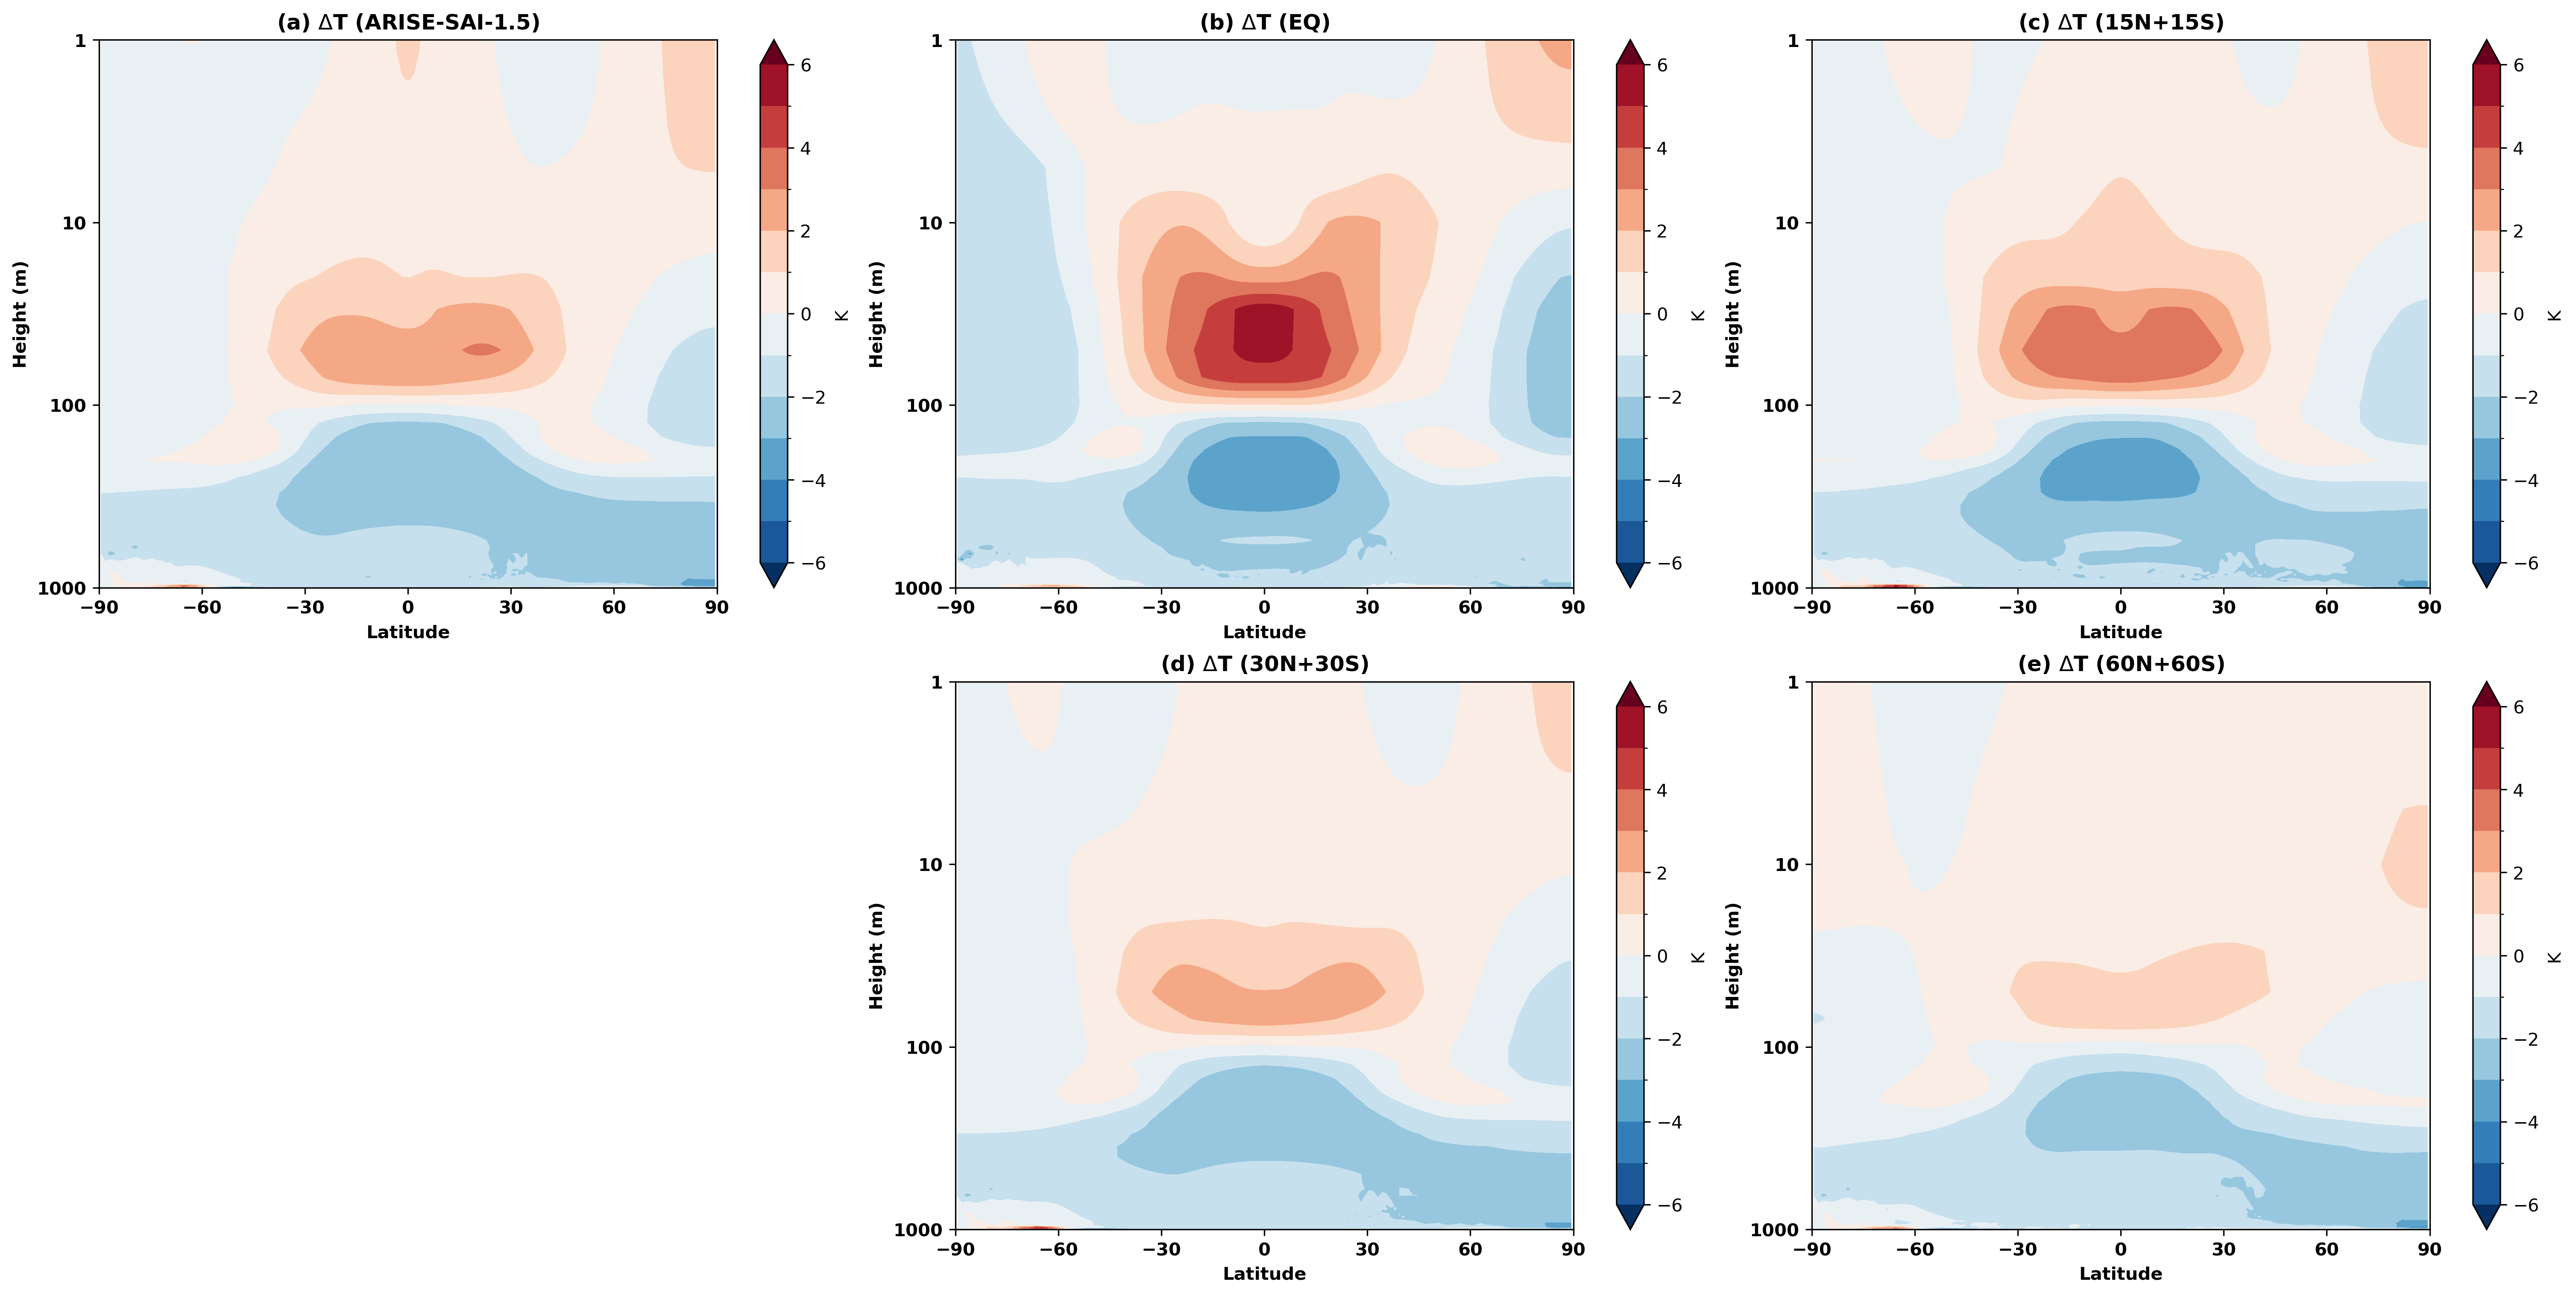

In [47]:
# col_levels = [-6.5,-6,-5.5,-5,-4.5,-4,-3.5,-3,-2.5,-2,-1.5,-1,-0.5,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5]

base_data = (ta_SSP.sel(time=slice('2050','2069')).mean('time'))

fig= plt.figure(constrained_layout=True,figsize=(20,10),dpi=300)
ax1 = fig.add_subplot(2,3, 1)
future_data = (ta_ARISE.sel(time=slice('2050','2069')).mean('time'))
((future_data-base_data)).plot.contourf(y='pressure',cmap='RdBu_r',vmin=-6,vmax=6,extend = "both",levels=13,cbar_kwargs={"label":"K"})
# cs = base_data.plot.contour(colors='k',y='level_height',levels=[0,10,20],alpha=0.5)
# plt.clabel(cs, fontsize=9, inline=True)
# plt.scatter([-30,-15,15,30],[21500,21500,21500,21500],marker='D',c='k')
plt.yscale('log')
plt.ylim([1000,1])
plt.yticks([1000,100,10,1],[1000,100,10,1],fontweight='bold')
plt.xlabel('Latitude',fontweight='bold')
plt.ylabel('Height (m)',fontweight='bold')
plt.xticks(np.linspace(-90,90,7),fontweight='bold')
plt.title('(a) $\Delta$T (ARISE-SAI-1.5)',fontweight='bold')
ax1.minorticks_off()
ax1 = fig.add_subplot(2,3, 2)
future_data = ta_0NS.sel(time=slice('2050','2069')).mean('time')
((future_data-base_data)).plot.contourf(y='pressure',cmap='RdBu_r',vmin=-6,vmax=6,extend = "both",levels=13,cbar_kwargs={"label":"K"})
# cs = base_data.plot.contour(colors='k',y='level_height',levels=[0,10,20],alpha=0.5)
# plt.clabel(cs, fontsize=9, inline=True)
# plt.scatter([0],[21500],marker='D',c='k')
plt.yscale('log')
plt.ylim([1000,1])
plt.yticks([1000,100,10,1],[1000,100,10,1],fontweight='bold')
plt.xlabel('Latitude',fontweight='bold')
plt.ylabel('Height (m)',fontweight='bold')
plt.xticks(np.linspace(-90,90,7),fontweight='bold')
plt.title('(b) $\Delta$T (EQ)',fontweight='bold')
ax1.minorticks_off()
ax1 = fig.add_subplot(2,3, 3)
future_data = ta_15NS.sel(time=slice('2050','2069')).mean('time')
((future_data-base_data)).plot.contourf(y='pressure',cmap='RdBu_r',vmin=-6,vmax=6,extend = "both",levels=13,cbar_kwargs={"label":"K"})
# cs = base_data.plot.contour(colors='k',y='level_height',levels=[0,10,20],alpha=0.5)
# plt.clabel(cs, fontsize=9, inline=True)
# plt.scatter([-15,15],[21500,21500],marker='D',c='k')
plt.yscale('log')
plt.ylim([1000,1])
plt.yticks([1000,100,10,1],[1000,100,10,1],fontweight='bold')
plt.xlabel('Latitude',fontweight='bold')
plt.ylabel('Height (m)',fontweight='bold')
plt.xticks(np.linspace(-90,90,7),fontweight='bold')
plt.title('(c) $\Delta$T (15N+15S)',fontweight='bold')
ax1.minorticks_off()
ax1 = fig.add_subplot(2,3, 5)
future_data = ta_30NS.sel(time=slice('2050','2069')).mean('time')
((future_data-base_data)).plot.contourf(y='pressure',cmap='RdBu_r',vmin=-6,vmax=6,extend = "both",levels=13,cbar_kwargs={"label":"K"})
# cs = base_data.plot.contour(colors='k',y='level_height',levels=[0,10,20],alpha=0.5)
# plt.clabel(cs, fontsize=9, inline=True)
# plt.scatter([-30,30],[21500,21500],marker='D',c='k')
plt.yscale('log')
plt.ylim([1000,1])
plt.yticks([1000,100,10,1],[1000,100,10,1],fontweight='bold')
plt.xlabel('Latitude',fontweight='bold')
plt.ylabel('Height (m)',fontweight='bold')
plt.xticks(np.linspace(-90,90,7),fontweight='bold')
plt.title('(d) $\Delta$T (30N+30S)',fontweight='bold')
ax1.minorticks_off()
ax1 = fig.add_subplot(2,3, 6)
future_data = ta_60NS.sel(time=slice('2050','2069')).mean('time')
((future_data-base_data)).plot.contourf(y='pressure',cmap='RdBu_r',vmin=-6,vmax=6,extend = "both",levels=13,cbar_kwargs={"label":"K"})
# cs = ((future_data-base_data)).plot.contour(y='pressure',c='k',alpha=0.5,levels=col_levels)
# plt.clabel(cs, fontsize=9, inline=True)
# plt.scatter([-60,60],[21500,21500],marker='D',c='k')
plt.yscale('log')
plt.ylim([1000,1])
plt.yticks([1000,100,10,1],[1000,100,10,1],fontweight='bold')
plt.xlabel('Latitude',fontweight='bold')
plt.ylabel('Height (m)',fontweight='bold')
plt.xticks(np.linspace(-90,90,7),fontweight='bold')
plt.title('(e) $\Delta$T (60N+60S)',fontweight='bold')
ax1.minorticks_off()
plt.savefig('/data/users/mhenry/figs/fig_SAI_S3.pdf')
plt.show()

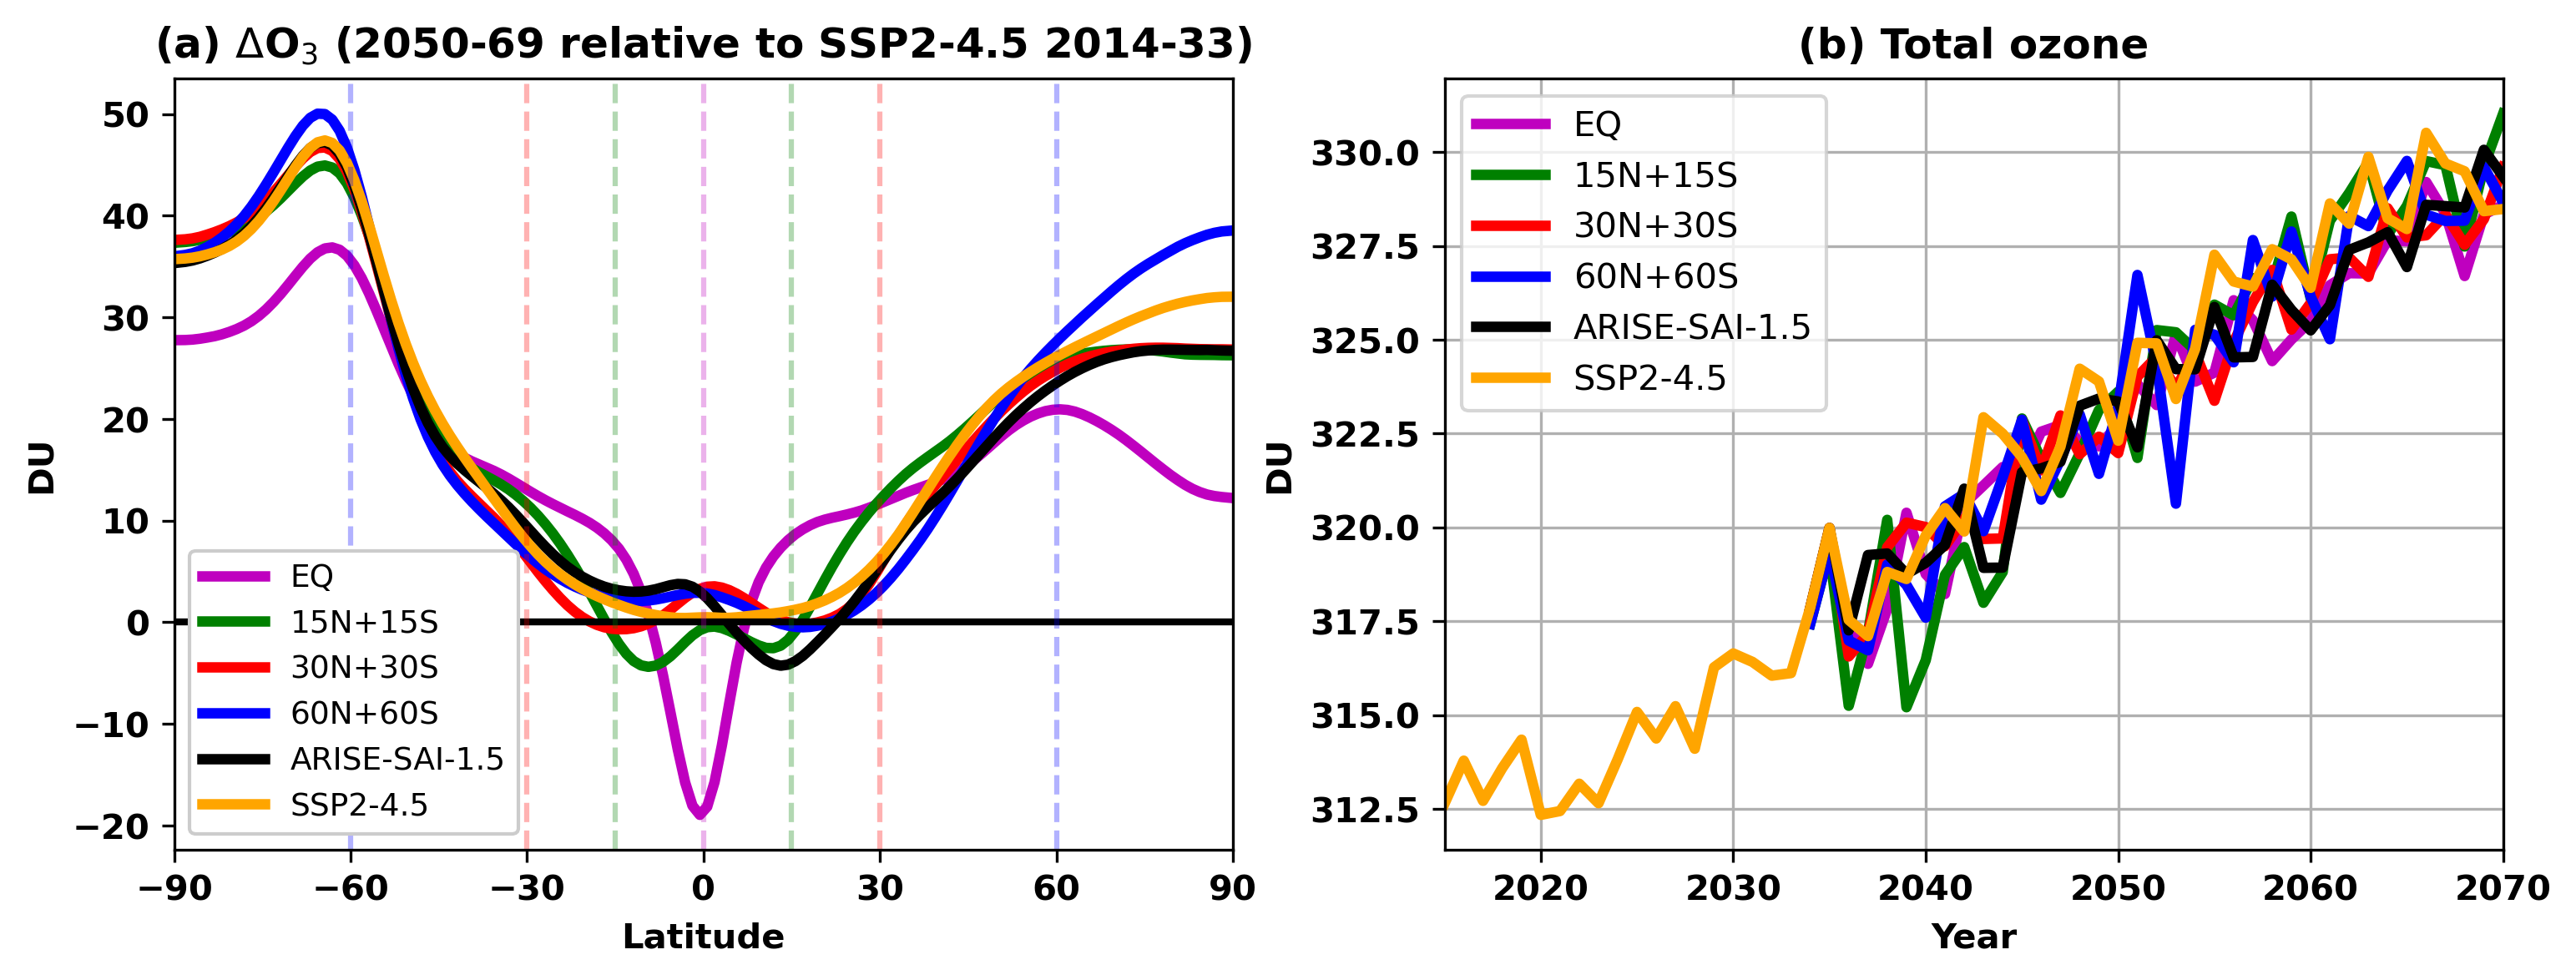

In [48]:
plt.figure(figsize=(12,4),dpi=300)
plt.subplot(121)
base_data = o3du_SSP.isel(model_level_number=0).sel(time=slice('2014','2033')).mean('time')
future_data = o3du_0NS.isel(model_level_number=0).sel(time=slice('2050','2069')).mean('time')
(future_data-base_data).plot(lw=3,c='m', label='EQ')
future_data = o3du_15NS.isel(model_level_number=0).sel(time=slice('2050','2069')).mean('time')
(future_data-base_data).plot(lw=3,c='g', label='15N+15S')
future_data = o3du_30NS.isel(model_level_number=0).sel(time=slice('2050','2069')).mean('time')
(future_data-base_data).plot(lw=3,c='r', label='30N+30S')
future_data = o3du_60NS.isel(model_level_number=0).sel(time=slice('2050','2069')).mean('time')
(future_data-base_data).plot(lw=3,c='b', label='60N+60S')
future_data = o3du_ARISE.isel(model_level_number=0).sel(time=slice('2050','2069')).mean('time')
(future_data-base_data).plot(lw=3,c='k', label='ARISE-SAI-1.5')
future_data = o3du_SSP.isel(model_level_number=0).sel(time=slice('2050','2069')).mean('time')
(future_data-base_data).plot(lw=3,c='orange', label='SSP2-4.5')
plt.axhline(y=0,c='k',lw=2)
plt.axvline(x=0,c='m',ls='--',alpha=0.3)
plt.axvline(x=15,c='g',ls='--',alpha=0.3)
plt.axvline(x=-15,c='g',ls='--',alpha=0.3)
plt.axvline(x=30,c='r',ls='--',alpha=0.3)
plt.axvline(x=-30,c='r',ls='--',alpha=0.3)
plt.axvline(x=60,c='b',ls='--',alpha=0.3)
plt.axvline(x=-60,c='b',ls='--',alpha=0.3)
plt.xlabel('Latitude',fontweight='bold')
plt.ylabel('DU',fontweight='bold')
# plt.ylim([-1,8.5])
plt.xlim([-90,90])
plt.xticks(np.linspace(-90,90,7),fontweight='bold')
plt.yticks(fontweight='bold')
plt.title('(a) $\Delta$O$_3$ (2050-69 relative to SSP2-4.5 2014-33)',fontweight='bold')
plt.legend(fontsize=9,framealpha=1)
plt.subplot(122)
o3du_0NS.isel(model_level_number=0).weighted(weights_ukesm_arise).mean(('latitude')).groupby('time.year').mean('time').plot(lw=3,label='EQ',c='m')
o3du_15NS.isel(model_level_number=0).weighted(weights_ukesm_arise).mean(('latitude')).groupby('time.year').mean('time').plot(lw=3,label='15N+15S',c='g')
o3du_30NS.isel(model_level_number=0).weighted(weights_ukesm_arise).mean(('latitude')).groupby('time.year').mean('time').plot(lw=3,label='30N+30S',c='r')
o3du_60NS.isel(model_level_number=0).weighted(weights_ukesm_arise).mean(('latitude')).groupby('time.year').mean('time').plot(lw=3,label='60N+60S',c='b')
o3du_ARISE.isel(model_level_number=0).weighted(weights_ukesm_arise).mean(('latitude')).groupby('time.year').mean('time').plot(lw=3,label='ARISE-SAI-1.5',c='k')
o3du_SSP.isel(model_level_number=0).weighted(weights_ukesm_arise).mean(('latitude')).groupby('time.year').mean('time').sel(year=slice(2015,2070)).plot(lw=3,label='SSP2-4.5',c='orange')
plt.title('(b) Total ozone',fontweight='bold')
plt.xlabel('Year',fontweight='bold')
plt.ylabel('DU',fontweight='bold')
plt.xlim([2015,2070])
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.legend()
plt.grid()
plt.savefig('/data/users/mhenry/figs/fig_SAI_S4.pdf')
plt.show()

In [49]:
aeronum_nuc_arise =  xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_aeronum_nuc_u-cl322.nc')
aeronum_aitken_arise =  xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_aeronum_aitken_u-cl322.nc')
aeronum_acc_arise =  xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_aeronum_acc_u-cl322.nc')
aeronum_coarse_arise =  xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_aeronum_coarse_u-cl322.nc')

aeronum_nuc_eq =  xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_aeronum_nuc_u-de029.nc')
aeronum_aitken_eq =  xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_aeronum_aitken_u-de029.nc')
aeronum_acc_eq =  xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_aeronum_acc_u-de029.nc')
aeronum_coarse_eq =  xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_aeronum_coarse_u-de029.nc')

aeronum_nuc_15NS =  xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_aeronum_nuc_u-cu743.nc')
aeronum_aitken_15NS =  xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_aeronum_aitken_u-cu743.nc')
aeronum_acc_15NS =  xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_aeronum_acc_u-cu743.nc')
aeronum_coarse_15NS =  xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_aeronum_coarse_u-cu743.nc')

aeronum_nuc_30NS =  xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_aeronum_nuc_u-cr991.nc')
aeronum_aitken_30NS =  xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_aeronum_aitken_u-cr991.nc')
aeronum_acc_30NS =  xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_aeronum_acc_u-cr991.nc')
aeronum_coarse_30NS =  xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_aeronum_coarse_u-cr991.nc')

aeronum_nuc_60NS =  xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_aeronum_nuc_u-ct762.nc')
aeronum_aitken_60NS =  xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_aeronum_aitken_u-ct762.nc')
aeronum_acc_60NS =  xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_aeronum_acc_u-ct762.nc')
aeronum_coarse_60NS =  xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_aeronum_coarse_u-ct762.nc')

h2so4mmr_nuc_arise = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_h2so4mmr_nuc_u-cl322.nc')
h2so4mmr_aitken_arise = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_h2so4mmr_aitken_u-cl322.nc')
h2so4mmr_acc_arise = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_h2so4mmr_acc_u-cl322.nc')
h2so4mmr_coarse_arise = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_h2so4mmr_coarse_u-cl322.nc')

h2so4mmr_nuc_eq = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_h2so4mmr_nuc_u-de029.nc')
h2so4mmr_aitken_eq = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_h2so4mmr_aitken_u-de029.nc')
h2so4mmr_acc_eq = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_h2so4mmr_acc_u-de029.nc')
h2so4mmr_coarse_eq = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_h2so4mmr_coarse_u-de029.nc')

h2so4mmr_nuc_15NS = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_h2so4mmr_nuc_u-cu743.nc')
h2so4mmr_aitken_15NS = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_h2so4mmr_aitken_u-cu743.nc')
h2so4mmr_acc_15NS = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_h2so4mmr_acc_u-cu743.nc')
h2so4mmr_coarse_15NS = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_h2so4mmr_coarse_u-cu743.nc')

h2so4mmr_nuc_30NS = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_h2so4mmr_nuc_u-cr991.nc')
h2so4mmr_aitken_30NS = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_h2so4mmr_aitken_u-cr991.nc')
h2so4mmr_acc_30NS = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_h2so4mmr_acc_u-cr991.nc')
h2so4mmr_coarse_30NS = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_h2so4mmr_coarse_u-cr991.nc')

h2so4mmr_nuc_60NS = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_h2so4mmr_nuc_u-ct762.nc')
h2so4mmr_aitken_60NS = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_h2so4mmr_aitken_u-ct762.nc')
h2so4mmr_acc_60NS = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_h2so4mmr_acc_u-ct762.nc')
h2so4mmr_coarse_60NS = xr.open_dataarray('/data/users/mhenry/ARISE/proc_data/ukesm_arise_h2so4mmr_coarse_u-ct762.nc')

In [ ]:
avogadro = 6.02214e23 #molec/mol
mass_air = 0.02897 #kg/mol
rho_sulf = 1.769e3 #kg/m3

rho_g_nuc = np.log(1.59)
rho_g_aitken = np.log(1.59)
rho_g_acc = np.log(1.4)
rho_g_coarse = np.log(2)

N_nuc_arise = aeronum_nuc_arise * avogadro / mass_air
N_aitken_arise = aeronum_aitken_arise * avogadro / mass_air
N_acc_arise = aeronum_acc_arise * avogadro / mass_air
N_coarse_arise = aeronum_coarse_arise * avogadro / mass_air

v_nuc_arise = h2so4mmr_nuc_arise / (rho_sulf * N_nuc_arise)
v_aitken_arise = h2so4mmr_aitken_arise / (rho_sulf * N_aitken_arise)
v_acc_arise = h2so4mmr_acc_arise / (rho_sulf * N_acc_arise)
v_coarse_arise = h2so4mmr_coarse_arise / (rho_sulf * N_coarse_arise)

r_nuc_arise = ((3 * v_nuc_arise) / (4*np.pi*np.exp(4.5*rho_g_nuc**2)))**(1/3)
r_aitken_arise = ((3 * v_aitken_arise) / (4*np.pi*np.exp(4.5*rho_g_aitken**2)))**(1/3)
r_acc_arise = ((3 * v_acc_arise) / (4*np.pi*np.exp(4.5*rho_g_acc**2)))**(1/3)
r_coarse_arise = ((3 * v_coarse_arise) / (4*np.pi*np.exp(4.5*rho_g_coarse**2)))**(1/3)

r_eff_arise = (N_nuc_arise*r_nuc_arise**3+N_aitken_arise*r_aitken_arise**3+N_acc_arise*r_acc_arise**3+N_coarse_arise*r_coarse_arise**3)/\
           (N_nuc_arise*r_nuc_arise**2+N_aitken_arise*r_aitken_arise**2+N_acc_arise*r_acc_arise**2+N_coarse_arise*r_coarse_arise**2)

#--------------------------------------------------------------------------------

N_nuc_eq = aeronum_nuc_eq * avogadro / mass_air
N_aitken_eq = aeronum_aitken_eq * avogadro / mass_air
N_acc_eq = aeronum_acc_eq * avogadro / mass_air
N_coarse_eq = aeronum_coarse_eq * avogadro / mass_air

v_nuc_eq = h2so4mmr_nuc_eq / (rho_sulf * N_nuc_eq)
v_aitken_eq = h2so4mmr_aitken_eq / (rho_sulf * N_aitken_eq)
v_acc_eq = h2so4mmr_acc_eq / (rho_sulf * N_acc_eq)
v_coarse_eq = h2so4mmr_coarse_eq / (rho_sulf * N_coarse_eq)

r_nuc_eq = ((3 * v_nuc_eq) / (4*np.pi*np.exp(4.5*rho_g_nuc**2)))**(1/3)
r_aitken_eq = ((3 * v_aitken_eq) / (4*np.pi*np.exp(4.5*rho_g_aitken**2)))**(1/3)
r_acc_eq = ((3 * v_acc_eq) / (4*np.pi*np.exp(4.5*rho_g_acc**2)))**(1/3)
r_coarse_eq = ((3 * v_coarse_eq) / (4*np.pi*np.exp(4.5*rho_g_coarse**2)))**(1/3)

r_eff_eq = (N_nuc_eq*r_nuc_eq**3+N_aitken_eq*r_aitken_eq**3+N_acc_eq*r_acc_eq**3+N_coarse_eq*r_coarse_eq**3)/\
           (N_nuc_eq*r_nuc_eq**2+N_aitken_eq*r_aitken_eq**2+N_acc_eq*r_acc_eq**2+N_coarse_eq*r_coarse_eq**2)

#--------------------------------------------------------------------------------

N_nuc_15NS = aeronum_nuc_15NS * avogadro / mass_air
N_aitken_15NS = aeronum_aitken_15NS * avogadro / mass_air
N_acc_15NS = aeronum_acc_15NS * avogadro / mass_air
N_coarse_15NS = aeronum_coarse_15NS * avogadro / mass_air

v_nuc_15NS = h2so4mmr_nuc_15NS / (rho_sulf * N_nuc_15NS)
v_aitken_15NS = h2so4mmr_aitken_15NS / (rho_sulf * N_aitken_15NS)
v_acc_15NS = h2so4mmr_acc_15NS / (rho_sulf * N_acc_15NS)
v_coarse_15NS = h2so4mmr_coarse_15NS / (rho_sulf * N_coarse_15NS)

r_nuc_15NS = ((3 * v_nuc_15NS) / (4*np.pi*np.exp(4.5*rho_g_nuc**2)))**(1/3)
r_aitken_15NS = ((3 * v_aitken_15NS) / (4*np.pi*np.exp(4.5*rho_g_aitken**2)))**(1/3)
r_acc_15NS = ((3 * v_acc_15NS) / (4*np.pi*np.exp(4.5*rho_g_acc**2)))**(1/3)
r_coarse_15NS = ((3 * v_coarse_15NS) / (4*np.pi*np.exp(4.5*rho_g_coarse**2)))**(1/3)

r_eff_15NS = (N_nuc_15NS*r_nuc_15NS**3+N_aitken_15NS*r_aitken_15NS**3+N_acc_15NS*r_acc_15NS**3+N_coarse_15NS*r_coarse_15NS**3)/\
             (N_nuc_15NS*r_nuc_15NS**2+N_aitken_15NS*r_aitken_15NS**2+N_acc_15NS*r_acc_15NS**2+N_coarse_15NS*r_coarse_15NS**2)

#--------------------------------------------------------------------------------

N_nuc_30NS = aeronum_nuc_30NS * avogadro / mass_air
N_aitken_30NS = aeronum_aitken_30NS * avogadro / mass_air
N_acc_30NS = aeronum_acc_30NS * avogadro / mass_air
N_coarse_30NS = aeronum_coarse_30NS * avogadro / mass_air

v_nuc_30NS = h2so4mmr_nuc_30NS / (rho_sulf * N_nuc_30NS)
v_aitken_30NS = h2so4mmr_aitken_30NS / (rho_sulf * N_aitken_30NS)
v_acc_30NS = h2so4mmr_acc_30NS / (rho_sulf * N_acc_30NS)
v_coarse_30NS = h2so4mmr_coarse_30NS / (rho_sulf * N_coarse_30NS)

r_nuc_30NS = ((3 * v_nuc_30NS) / (4*np.pi*np.exp(4.5*rho_g_nuc**2)))**(1/3)
r_aitken_30NS = ((3 * v_aitken_30NS) / (4*np.pi*np.exp(4.5*rho_g_aitken**2)))**(1/3)
r_acc_30NS = ((3 * v_acc_30NS) / (4*np.pi*np.exp(4.5*rho_g_acc**2)))**(1/3)
r_coarse_30NS = ((3 * v_coarse_30NS) / (4*np.pi*np.exp(4.5*rho_g_coarse**2)))**(1/3)

r_eff_30NS = (N_nuc_30NS*r_nuc_30NS**3+N_aitken_30NS*r_aitken_30NS**3+N_acc_30NS*r_acc_30NS**3+N_coarse_30NS*r_coarse_30NS**3)/\
             (N_nuc_30NS*r_nuc_30NS**2+N_aitken_30NS*r_aitken_30NS**2+N_acc_30NS*r_acc_30NS**2+N_coarse_30NS*r_coarse_30NS**2)

#--------------------------------------------------------------------------------

N_nuc_60NS = aeronum_nuc_60NS * avogadro / mass_air
N_aitken_60NS = aeronum_aitken_60NS * avogadro / mass_air
N_acc_60NS = aeronum_acc_60NS * avogadro / mass_air
N_coarse_60NS = aeronum_coarse_60NS * avogadro / mass_air

v_nuc_60NS = h2so4mmr_nuc_60NS / (rho_sulf * N_nuc_60NS)
v_aitken_60NS = h2so4mmr_aitken_60NS / (rho_sulf * N_aitken_60NS)
v_acc_60NS = h2so4mmr_acc_60NS / (rho_sulf * N_acc_60NS)
v_coarse_60NS = h2so4mmr_coarse_60NS / (rho_sulf * N_coarse_60NS)

r_nuc_60NS = ((3 * v_nuc_60NS) / (4*np.pi*np.exp(4.5*rho_g_nuc**2)))**(1/3)
r_aitken_60NS = ((3 * v_aitken_60NS) / (4*np.pi*np.exp(4.5*rho_g_aitken**2)))**(1/3)
r_acc_60NS = ((3 * v_acc_60NS) / (4*np.pi*np.exp(4.5*rho_g_acc**2)))**(1/3)
r_coarse_60NS = ((3 * v_coarse_60NS) / (4*np.pi*np.exp(4.5*rho_g_coarse**2)))**(1/3)

r_eff_60NS = (N_nuc_60NS*r_nuc_60NS**3+N_aitken_60NS*r_aitken_60NS**3+N_acc_60NS*r_acc_60NS**3+N_coarse_60NS*r_coarse_60NS**3)/\
             (N_nuc_60NS*r_nuc_60NS**2+N_aitken_60NS*r_aitken_60NS**2+N_acc_60NS*r_acc_60NS**2+N_coarse_60NS*r_coarse_60NS**2)

In [ ]:
fig= plt.figure(constrained_layout=True,figsize=(20,10),dpi=300)
ax1 = fig.add_subplot(2,3, 1)

(r_eff_arise/1e-6).sel(time=slice('2050','2069')).mean('time').plot.contourf(y='level_height',
                                vmin=0,vmax=0.4,levels=9,extend = "max",cbar_kwargs={"label":"10$^{-6}$m"})
plt.scatter([-30,-15,15,30],[21500,21500,21500,21500],marker='D',c='k')
plt.ylim([0,50000])
plt.yticks(np.linspace(0,50000,6),np.linspace(0,50,6),fontweight='bold')
plt.xlabel('Latitude',fontweight='bold')
plt.ylabel('Height (km)',fontweight='bold')
plt.xticks(np.linspace(-90,90,7),fontweight='bold')
plt.title('(a) Effective radius (ARISE-SAI-1.5)',fontweight='bold')
ax1.minorticks_off()

ax1 = fig.add_subplot(2,3, 2)
(r_eff_eq/1e-6).sel(time=slice('2050','2069')).mean('time').plot.contourf(y='level_height',
                                vmin=0,vmax=0.4,levels=9,extend = "max",cbar_kwargs={"label":"10$^{-6}$m"})
plt.scatter([0],[21500],marker='D',c='k')
plt.ylim([0,50000])
plt.yticks(np.linspace(0,50000,6),np.linspace(0,50,6),fontweight='bold')
plt.xlabel('Latitude',fontweight='bold')
plt.ylabel('Height (km)',fontweight='bold')
plt.xticks(np.linspace(-90,90,7),fontweight='bold')
plt.title('(b) Effective radius (EQ)',fontweight='bold')
ax1.minorticks_off()

ax1 = fig.add_subplot(2,3, 3)
(r_eff_15NS/1e-6).sel(time=slice('2050','2069')).mean('time').plot.contourf(y='level_height',
                                vmin=0,vmax=0.40,levels=9,extend = "max",cbar_kwargs={"label":"10$^{-6}$m"})
plt.scatter([-15,15],[21500,21500],marker='D',c='k')
plt.ylim([0,50000])
plt.yticks(np.linspace(0,50000,6),np.linspace(0,50,6),fontweight='bold')
plt.xlabel('Latitude',fontweight='bold')
plt.ylabel('Height (km)',fontweight='bold')
plt.xticks(np.linspace(-90,90,7),fontweight='bold')
plt.title('(c) Effective radius (15N+15S)',fontweight='bold')
ax1.minorticks_off()

ax1 = fig.add_subplot(2,3, 5)
(r_eff_30NS/1e-6).sel(time=slice('2050','2069')).mean('time').plot.contourf(y='level_height',
                                vmin=0,vmax=0.40,levels=9,extend = "max",cbar_kwargs={"label":"10$^{-6}$m"})
plt.scatter([-30,30],[21500,21500],marker='D',c='k')
plt.ylim([0,50000])
plt.yticks(np.linspace(0,50000,6),np.linspace(0,50,6),fontweight='bold')
plt.xlabel('Latitude',fontweight='bold')
plt.ylabel('Height (km)',fontweight='bold')
plt.xticks(np.linspace(-90,90,7),fontweight='bold')
plt.title('(d) Effective radius (30N+30S)',fontweight='bold')
ax1.minorticks_off()

ax1 = fig.add_subplot(2,3, 6)
(r_eff_60NS/1e-6).sel(time=slice('2050','2069')).mean('time').plot.contourf(y='level_height',
                                vmin=0,vmax=0.40,levels=9,extend = "max",cbar_kwargs={"label":"10$^{-6}$m"})
plt.scatter([-60,60],[21500,21500],marker='D',c='k')
plt.ylim([0,50000])
plt.yticks(np.linspace(0,50000,6),np.linspace(0,50,6),fontweight='bold')
plt.xlabel('Latitude',fontweight='bold')
plt.ylabel('Height (km)',fontweight='bold')
plt.xticks(np.linspace(-90,90,7),fontweight='bold')
plt.title('(e) Effective radius (60N+60S)',fontweight='bold')
ax1.minorticks_off()
plt.savefig('/data/users/mhenry/figs/fig_SAI_S7.pdf',bbox_inches='tight')
plt.show()